In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [355]:
from importlib import reload

import utils
utils = reload(utils)
utils.data = reload(utils.data)
utils.model = reload(utils.model)
utils.pipeline = reload(utils.pipeline)

from utils.data import load_data, get_all, build_ans, month_to_days
from utils.model import XGBModel
from utils.pipeline import pipeline, get_data

In [4]:
base, train, test, sample = load_data()

In [5]:
train = train.sample(frac=1.).reset_index(drop=True).sort_values('month', ignore_index=True)
data = get_data(train, base, test, 0.2, path='utils/')

In [7]:
data[0][0].to_csv('data/X_train.csv', index=False)
data[1][0].to_csv('data/X_val.csv', index=False)
data[2].to_csv('data/X_test.csv', index=False)

data[0][1].to_csv('data/y_train.csv', index=False)
data[1][1].to_csv('data/y_val.csv', index=False)

In [154]:
(X_train, y_train, reg_train), (X_val, y_val, reg_val), (X_test, reg_test) = get_all(data, start_date=
                                                                                    pd.Timestamp(year=2018, month=2,
                                                                                                day=2))

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


In [16]:
from utils.model import xgbmape
import xgboost

model = xgboost.XGBRegressor(n_estimators=200, max_depth=7)
model.fit(X_train.values, y_train.values, eval_set=[(X_train.values, y_train.values), 
                                                    (X_val.values, y_val.values)], eval_metric=xgbmape)

[10:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136449	validation_1-rmse:140998	validation_0-mape:89.6361	validation_1-mape:90.0426
[1]	validation_0-rmse:123315	validation_1-rmse:127989	validation_0-mape:80.3108	validation_1-mape:81.0804
[2]	validation_0-rmse:111463	validation_1-rmse:116273	validation_0-mape:71.9339	validation_1-mape:73.0268
[3]	validation_0-rmse:100814	validation_1-rmse:105746	validation_0-mape:64.4142	validation_1-mape:65.8033
[4]	validation_0-rmse:91268.7	validation_1-rmse:96301.1	validation_0-mape:57.685	validation_1-mape:59.343
[5]	validation_0-rmse:82691.1	validation_1-rmse:87813.9	validation_0-mape:51.6665	validation_1-mape:53.5711
[6]	validation_0-rmse:74978	validation_1-rmse:80185.4	validation_0-mape:46.302	validation_1-mape:48.4201
[7]	validation_0-rmse:68058	validation_1-rmse:73342	validation_0-mape:41.5299	validation_1-mape:43.8536
[8]	validation_0-rmse:6186

[75]	validation_0-rmse:12915.4	validation_1-rmse:18693.9	validation_0-mape:8.8767	validation_1-mape:11.7017
[76]	validation_0-rmse:12895.7	validation_1-rmse:18697.9	validation_0-mape:8.8629	validation_1-mape:11.7022
[77]	validation_0-rmse:12870.8	validation_1-rmse:18673.4	validation_0-mape:8.83201	validation_1-mape:11.6743
[78]	validation_0-rmse:12842.3	validation_1-rmse:18659.7	validation_0-mape:8.79456	validation_1-mape:11.6434
[79]	validation_0-rmse:12824.4	validation_1-rmse:18651.6	validation_0-mape:8.7742	validation_1-mape:11.6223
[80]	validation_0-rmse:12806.1	validation_1-rmse:18640.4	validation_0-mape:8.74983	validation_1-mape:11.6082
[81]	validation_0-rmse:12796.3	validation_1-rmse:18643.8	validation_0-mape:8.74223	validation_1-mape:11.6103
[82]	validation_0-rmse:12773	validation_1-rmse:18638.3	validation_0-mape:8.72458	validation_1-mape:11.6025
[83]	validation_0-rmse:12746.6	validation_1-rmse:18621.7	validation_0-mape:8.68399	validation_1-mape:11.5734
[84]	validation_0-rmse:1

[151]	validation_0-rmse:11661.8	validation_1-rmse:18413.5	validation_0-mape:7.51511	validation_1-mape:11.0209
[152]	validation_0-rmse:11651.6	validation_1-rmse:18409.7	validation_0-mape:7.49777	validation_1-mape:11.0144
[153]	validation_0-rmse:11645.6	validation_1-rmse:18405.4	validation_0-mape:7.48878	validation_1-mape:11.0101
[154]	validation_0-rmse:11630.2	validation_1-rmse:18401.1	validation_0-mape:7.46889	validation_1-mape:11.003
[155]	validation_0-rmse:11611.4	validation_1-rmse:18433.9	validation_0-mape:7.46526	validation_1-mape:11.0079
[156]	validation_0-rmse:11603.6	validation_1-rmse:18430.2	validation_0-mape:7.44166	validation_1-mape:10.9857
[157]	validation_0-rmse:11598.5	validation_1-rmse:18429.3	validation_0-mape:7.4331	validation_1-mape:10.9839
[158]	validation_0-rmse:11591.6	validation_1-rmse:18431.8	validation_0-mape:7.42208	validation_1-mape:10.977
[159]	validation_0-rmse:11589.7	validation_1-rmse:18430.1	validation_0-mape:7.41945	validation_1-mape:10.9759
[160]	validat

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [155]:
model_reg = xgboost.XGBRegressor(n_estimators=500, max_depth=7)

norm_train = y_train / reg_train
norm_val = y_val / reg_val

model_reg.fit(X_train.values, norm_train.values, eval_set=[(X_train.values, norm_train.values), 
                                                    (X_val.values, norm_val.values)], eval_metric=xgbmape)

[11:22:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:19.1913	validation_1-rmse:5.67341	validation_0-mape:47.8376	validation_1-mape:48.2421
[1]	validation_0-rmse:18.7522	validation_1-rmse:5.88403	validation_0-mape:44.8327	validation_1-mape:45.9731
[2]	validation_0-rmse:18.3626	validation_1-rmse:6.19053	validation_0-mape:42.2849	validation_1-mape:44.1194
[3]	validation_0-rmse:18.0176	validation_1-rmse:6.55876	validation_0-mape:40.0823	validation_1-mape:42.5459
[4]	validation_0-rmse:17.7174	validation_1-rmse:6.95509	validation_0-mape:38.1326	validation_1-mape:41.1195
[5]	validation_0-rmse:17.3092	validation_1-rmse:7.41745	validation_0-mape:36.3853	validation_1-mape:40.0244
[6]	validation_0-rmse:17.0678	validation_1-rmse:7.82581	validation_0-mape:34.9206	validation_1-mape:38.8857
[7]	validation_0-rmse:16.7271	validation_1-rmse:8.33295	validation_0-mape:33.6755	validation_1-mape:38.3146
[8]	valid

[75]	validation_0-rmse:13.8244	validation_1-rmse:17.0303	validation_0-mape:34.0329	validation_1-mape:49.8109
[76]	validation_0-rmse:13.8201	validation_1-rmse:17.0532	validation_0-mape:34.0725	validation_1-mape:49.8847
[77]	validation_0-rmse:13.819	validation_1-rmse:17.0572	validation_0-mape:34.0748	validation_1-mape:49.8822
[78]	validation_0-rmse:13.8128	validation_1-rmse:17.0735	validation_0-mape:34.1551	validation_1-mape:49.9922
[79]	validation_0-rmse:13.8073	validation_1-rmse:17.1326	validation_0-mape:34.1795	validation_1-mape:50.0481
[80]	validation_0-rmse:13.8066	validation_1-rmse:17.1352	validation_0-mape:34.2013	validation_1-mape:50.0895
[81]	validation_0-rmse:13.7857	validation_1-rmse:17.2665	validation_0-mape:34.2589	validation_1-mape:50.2337
[82]	validation_0-rmse:13.785	validation_1-rmse:17.2687	validation_0-mape:34.2744	validation_1-mape:50.2747
[83]	validation_0-rmse:13.784	validation_1-rmse:17.2752	validation_0-mape:34.31	validation_1-mape:50.3248
[84]	validation_0-rmse:1

[151]	validation_0-rmse:13.5383	validation_1-rmse:18.8738	validation_0-mape:34.8904	validation_1-mape:53.309
[152]	validation_0-rmse:13.5372	validation_1-rmse:18.8781	validation_0-mape:34.9067	validation_1-mape:53.3635
[153]	validation_0-rmse:13.5303	validation_1-rmse:18.948	validation_0-mape:34.9256	validation_1-mape:53.438
[154]	validation_0-rmse:13.529	validation_1-rmse:18.9522	validation_0-mape:34.9403	validation_1-mape:53.4808
[155]	validation_0-rmse:13.5285	validation_1-rmse:18.9543	validation_0-mape:34.9409	validation_1-mape:53.4808
[156]	validation_0-rmse:13.5278	validation_1-rmse:18.9551	validation_0-mape:34.9519	validation_1-mape:53.4935
[157]	validation_0-rmse:13.5274	validation_1-rmse:18.9573	validation_0-mape:34.9377	validation_1-mape:53.5664
[158]	validation_0-rmse:13.5265	validation_1-rmse:18.9589	validation_0-mape:34.9141	validation_1-mape:53.5653
[159]	validation_0-rmse:13.5258	validation_1-rmse:18.9598	validation_0-mape:34.9615	validation_1-mape:53.6059
[160]	validati

[226]	validation_0-rmse:13.4519	validation_1-rmse:19.5442	validation_0-mape:34.8559	validation_1-mape:55.0324
[227]	validation_0-rmse:13.4495	validation_1-rmse:19.5912	validation_0-mape:34.8522	validation_1-mape:55.0582
[228]	validation_0-rmse:13.447	validation_1-rmse:19.6359	validation_0-mape:34.8525	validation_1-mape:55.1233
[229]	validation_0-rmse:13.4468	validation_1-rmse:19.6359	validation_0-mape:34.844	validation_1-mape:55.1067
[230]	validation_0-rmse:13.4468	validation_1-rmse:19.6368	validation_0-mape:34.8436	validation_1-mape:55.1126
[231]	validation_0-rmse:13.4466	validation_1-rmse:19.6371	validation_0-mape:34.8626	validation_1-mape:55.1523
[232]	validation_0-rmse:13.4465	validation_1-rmse:19.6371	validation_0-mape:34.8418	validation_1-mape:55.1197
[233]	validation_0-rmse:13.4459	validation_1-rmse:19.6371	validation_0-mape:34.7959	validation_1-mape:55.0642
[234]	validation_0-rmse:13.4459	validation_1-rmse:19.6372	validation_0-mape:34.798	validation_1-mape:55.0731
[235]	validat

[301]	validation_0-rmse:13.4149	validation_1-rmse:20.0637	validation_0-mape:34.6974	validation_1-mape:56.2621
[302]	validation_0-rmse:13.4149	validation_1-rmse:20.0639	validation_0-mape:34.6947	validation_1-mape:56.2816
[303]	validation_0-rmse:13.4149	validation_1-rmse:20.0639	validation_0-mape:34.6923	validation_1-mape:56.279
[304]	validation_0-rmse:13.4147	validation_1-rmse:20.064	validation_0-mape:34.6857	validation_1-mape:56.2881
[305]	validation_0-rmse:13.4145	validation_1-rmse:20.0659	validation_0-mape:34.6892	validation_1-mape:56.3115
[306]	validation_0-rmse:13.4145	validation_1-rmse:20.0659	validation_0-mape:34.6862	validation_1-mape:56.3104
[307]	validation_0-rmse:13.4144	validation_1-rmse:20.066	validation_0-mape:34.6878	validation_1-mape:56.315
[308]	validation_0-rmse:13.4143	validation_1-rmse:20.066	validation_0-mape:34.6626	validation_1-mape:56.2693
[309]	validation_0-rmse:13.4139	validation_1-rmse:20.0669	validation_0-mape:34.6653	validation_1-mape:56.3082
[310]	validatio

[376]	validation_0-rmse:13.3939	validation_1-rmse:20.3914	validation_0-mape:34.4133	validation_1-mape:57.1923
[377]	validation_0-rmse:13.3937	validation_1-rmse:20.3915	validation_0-mape:34.4085	validation_1-mape:57.1968
[378]	validation_0-rmse:13.3936	validation_1-rmse:20.3922	validation_0-mape:34.4046	validation_1-mape:57.2022
[379]	validation_0-rmse:13.3932	validation_1-rmse:20.3929	validation_0-mape:34.4139	validation_1-mape:57.2668
[380]	validation_0-rmse:13.3929	validation_1-rmse:20.3929	validation_0-mape:34.4012	validation_1-mape:57.2528
[381]	validation_0-rmse:13.3927	validation_1-rmse:20.3939	validation_0-mape:34.404	validation_1-mape:57.2828
[382]	validation_0-rmse:13.3924	validation_1-rmse:20.4096	validation_0-mape:34.3978	validation_1-mape:57.293
[383]	validation_0-rmse:13.3923	validation_1-rmse:20.4127	validation_0-mape:34.3945	validation_1-mape:57.2944
[384]	validation_0-rmse:13.3922	validation_1-rmse:20.4127	validation_0-mape:34.3965	validation_1-mape:57.3076
[385]	valida

[451]	validation_0-rmse:13.3833	validation_1-rmse:20.5045	validation_0-mape:34.1287	validation_1-mape:57.8868
[452]	validation_0-rmse:13.3829	validation_1-rmse:20.506	validation_0-mape:34.1279	validation_1-mape:57.8924
[453]	validation_0-rmse:13.3828	validation_1-rmse:20.5065	validation_0-mape:34.1202	validation_1-mape:57.8966
[454]	validation_0-rmse:13.3827	validation_1-rmse:20.5079	validation_0-mape:34.1089	validation_1-mape:57.9003
[455]	validation_0-rmse:13.3826	validation_1-rmse:20.5082	validation_0-mape:34.102	validation_1-mape:57.8943
[456]	validation_0-rmse:13.3825	validation_1-rmse:20.5103	validation_0-mape:34.1037	validation_1-mape:57.9005
[457]	validation_0-rmse:13.3825	validation_1-rmse:20.5109	validation_0-mape:34.0981	validation_1-mape:57.8966
[458]	validation_0-rmse:13.3825	validation_1-rmse:20.5109	validation_0-mape:34.0958	validation_1-mape:57.9002
[459]	validation_0-rmse:13.3824	validation_1-rmse:20.5141	validation_0-mape:34.0915	validation_1-mape:57.9107
[460]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [135]:
from utils.pipeline import invmape

pred_train = model_reg.predict(X_train.values) * reg_train
pred_val = model_reg.predict(X_val.values) * reg_val


print(f'Train: {invmape(y_train, pred_train)}')
print(f'Val: {invmape(y_val, pred_val)}')

Train: 97.05082246917362
Val: 89.44309955807415


In [30]:
from utils.data import plot_model, plot_random_quadkey

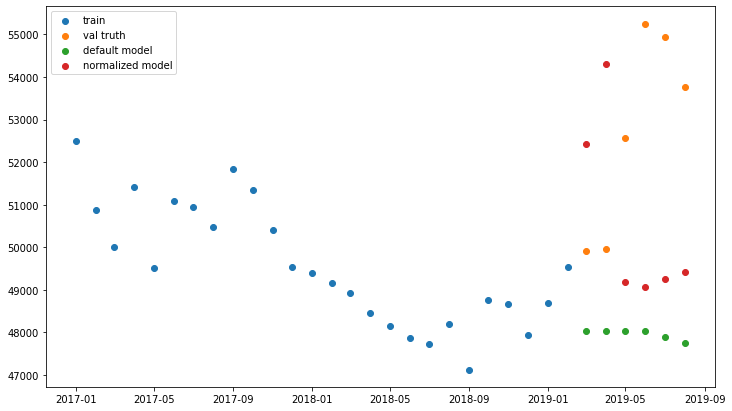

In [194]:
import random
plt.figure(figsize=(12, 7))

key = random.choice(train['city_quadkey'])
train_ind = data[0][0]['city_quadkey'] == key
val_ind = data[1][0]['city_quadkey'] == key
test_ind = data[2]['city_quadkey'] == key

plt.scatter(data[0][0][train_ind]['month'], y_train[train_ind], label='train')
plt.scatter(data[1][0][val_ind]['month'], y_val[val_ind], label='val truth')
plt.scatter(data[1][0][val_ind]['month'], model.predict(X_val[val_ind].values), label='default model')
plt.scatter(data[1][0][val_ind]['month'], 
            model_reg.predict(X_val[val_ind].values) * pred_val[val_ind], label='normalized model')
plt.legend()

## Stacking ##

In [199]:
ans1 = build_ans(data[0][0], data[0][1], 1)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp = train_x[['city_quadkey', 'month']]


In [227]:
ans2 = build_ans(data[0][0], data[0][1], 2)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

In [228]:
ans2

bias          c1        c2    pearson   spearman  \
city_quadkey                                                              
1.203101e+14   81483.276210  -53.932285  0.072426   0.043297   0.136013   
1.203101e+14   63619.677073  -20.803974  0.025753  -0.110543   0.348717   
1.203101e+14  418081.994739 -113.167221  0.173116   0.293552   0.065814   
1.203101e+14   80645.164062    0.000000  0.000000        NaN        NaN   
1.203101e+14   58512.678997 -150.825576  0.183391  -0.615567   0.665205   
...                     ...         ...       ...        ...        ...   
1.203101e+14  205882.359375    0.000000  0.000000 -42.000000 -42.000000   
1.201323e+14   54210.527344    0.000000  0.000000 -42.000000 -42.000000   
1.203101e+14  123318.390625    0.000000  0.000000 -42.000000 -42.000000   
1.203101e+14   22727.273438    0.000000  0.000000 -42.000000 -42.000000   
1.201323e+14   13458.949219    0.000000  0.000000 -42.000000 -42.000000   

              cnt_months  
city_quadkey              
1.203101e+14          26  
1.203101e+14          26  
1.203101e+14          26  
1.203101e+14          17  
1.203101e+14           8  
...                  ...  
1.203101e+14           1  
1.201323e+14           1  
1.203101e+14           1  
1.203101e+14           1  
1.201323e+14           1  

[6866 rows x 6 columns]

In [229]:
dset = data[0][0][['city_quadkey', 'month']]
dset = dset.join(ans1, on='city_quadkey')
dset = dset.join(ans2, on='city_quadkey', lsuffix='_a1', rsuffix='_a2')
dset['days'] = dset['month'].apply(month_to_days)

In [230]:
dset['pred_1'] = dset['days'] * dset['c1_a1'] + dset['bias_a1']
dset['pred_2'] = dset['days'] * dset['c1_a2'] + dset['days'] * dset['days'] * dset['c2'] + dset['bias_a2']

In [232]:
dset.drop(['city_quadkey', 'month', 'cnt_months_a1', 'days'], axis=1, inplace=True)

In [233]:
dset

bias_a1      c1_a1        bias_a2       c1_a2        c2  \
0        74808.880489   1.084897   81483.276210  -53.932285  0.072426   
1        61246.464610  -1.241534   63619.677073  -20.803974  0.025753   
2       402128.611309  18.336848  418081.994739 -113.167221  0.173116   
3        80645.164062   0.000000   80645.164062    0.000000  0.000000   
4        54075.517771 -24.772561   58512.678997 -150.825576  0.183391   
...               ...        ...            ...         ...       ...   
132816  128805.701974  15.186459  134990.452239  -35.794565  0.067113   
132817  220338.847322   6.107376  225225.419770  -34.172741  0.053026   
132818   54724.655905  -4.477570   50686.677355   28.807571 -0.043818   
132819   38522.620524  -8.250844  -57437.104890  273.792021 -0.206035   
132820   84081.632812   0.000000   84081.632812    0.000000  0.000000   

         pearson  spearman  cnt_months_a2         pred_1         pred_2  
0       0.043297  0.136013             26   74808.880489   81483.276210  
1      -0.110543  0.348717             26   61246.464610   63619.677073  
2       0.293552  0.065814             26  402128.611309  418081.994739  
3            NaN       NaN             17   80645.164062   80645.164062  
4      -0.615567  0.665205              8   54075.517771   58512.678997  
...          ...       ...            ...            ...            ...  
132816  0.716484  0.002705             26  140362.597623  146617.316203  
132817  0.271600  0.202272             26  224986.560733  229928.415160  
132818 -0.303471  0.257601             26   51317.225278   47233.564924  
132819 -0.414935  0.414430              6   32243.728470   31599.183928  
132820       NaN       NaN              3   84081.632812   84081.632812  

[132821 rows x 10 columns]

In [234]:
def proc2(dX, ans1, ans2):
    dset = dX[['city_quadkey', 'month']]
    dset = dset.join(ans1, on='city_quadkey')
    dset = dset.join(ans2, on='city_quadkey', lsuffix='_a1', rsuffix='_a2')
    dset['days'] = dset['month'].apply(month_to_days)
    dset['pred_1'] = dset['days'] * dset['c1_a1'] + dset['bias_a1']
    dset['pred_2'] = dset['days'] * dset['c1_a2'] + dset['days'] * dset['days'] * dset['c2'] + dset['bias_a2']
    dset.drop(['city_quadkey', 'month', 'cnt_months_a1', 'days'], axis=1, inplace=True)
    return dset

In [238]:
def get_all(data):
    ans1 = build_ans(data[0][0], data[0][1], 1)
    ans2 = build_ans(data[0][0], data[0][1], 2)
    X_val = proc2(data[1][0], ans1, ans2)
    X_test = proc2(data[2], ans1, ans2)
    return X_val, X_test

In [239]:
meta_val, meta_test = get_all(data)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

In [242]:
X_train, y_train = data[0][0].drop(['month', 'city_quadkey'], axis=1).values, data[0][1].values
X_val, y_val = data[1][0].drop(['month', 'city_quadkey'], axis=1).values, data[1][1].values
X_test = data[2].drop(['month', 'city_quadkey'], axis=1).values

In [243]:
model = xgboost.XGBRegressor(n_estimators=300, max_depth=7)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                                                    (X_val, y_val)], eval_metric=xgbmape)

[12:18:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136449	validation_1-rmse:140998	validation_0-mape:89.6361	validation_1-mape:90.0426
[1]	validation_0-rmse:123315	validation_1-rmse:127989	validation_0-mape:80.3108	validation_1-mape:81.0804
[2]	validation_0-rmse:111463	validation_1-rmse:116273	validation_0-mape:71.9339	validation_1-mape:73.0268
[3]	validation_0-rmse:100814	validation_1-rmse:105746	validation_0-mape:64.4142	validation_1-mape:65.8033
[4]	validation_0-rmse:91268.7	validation_1-rmse:96301.1	validation_0-mape:57.685	validation_1-mape:59.343
[5]	validation_0-rmse:82691.1	validation_1-rmse:87813.9	validation_0-mape:51.6665	validation_1-mape:53.5711
[6]	validation_0-rmse:74978	validation_1-rmse:80185.4	validation_0-mape:46.302	validation_1-mape:48.4201
[7]	validation_0-rmse:68058	validation_1-rmse:73342	validation_0-mape:41.5299	validation_1-mape:43.8536
[8]	validation_0-rmse:6186

[75]	validation_0-rmse:12915.4	validation_1-rmse:18693.9	validation_0-mape:8.8767	validation_1-mape:11.7017
[76]	validation_0-rmse:12895.7	validation_1-rmse:18697.9	validation_0-mape:8.8629	validation_1-mape:11.7022
[77]	validation_0-rmse:12870.8	validation_1-rmse:18673.4	validation_0-mape:8.83201	validation_1-mape:11.6743
[78]	validation_0-rmse:12842.3	validation_1-rmse:18659.7	validation_0-mape:8.79456	validation_1-mape:11.6434
[79]	validation_0-rmse:12824.4	validation_1-rmse:18651.6	validation_0-mape:8.7742	validation_1-mape:11.6223
[80]	validation_0-rmse:12806.1	validation_1-rmse:18640.4	validation_0-mape:8.74983	validation_1-mape:11.6082
[81]	validation_0-rmse:12796.3	validation_1-rmse:18643.8	validation_0-mape:8.74223	validation_1-mape:11.6103
[82]	validation_0-rmse:12773	validation_1-rmse:18638.3	validation_0-mape:8.72458	validation_1-mape:11.6025
[83]	validation_0-rmse:12746.6	validation_1-rmse:18621.7	validation_0-mape:8.68399	validation_1-mape:11.5734
[84]	validation_0-rmse:1

[151]	validation_0-rmse:11661.8	validation_1-rmse:18413.5	validation_0-mape:7.51511	validation_1-mape:11.0209
[152]	validation_0-rmse:11651.6	validation_1-rmse:18409.7	validation_0-mape:7.49777	validation_1-mape:11.0144
[153]	validation_0-rmse:11645.6	validation_1-rmse:18405.4	validation_0-mape:7.48878	validation_1-mape:11.0101
[154]	validation_0-rmse:11630.2	validation_1-rmse:18401.1	validation_0-mape:7.46889	validation_1-mape:11.003
[155]	validation_0-rmse:11611.4	validation_1-rmse:18433.9	validation_0-mape:7.46526	validation_1-mape:11.0079
[156]	validation_0-rmse:11603.6	validation_1-rmse:18430.2	validation_0-mape:7.44166	validation_1-mape:10.9857
[157]	validation_0-rmse:11598.5	validation_1-rmse:18429.3	validation_0-mape:7.4331	validation_1-mape:10.9839
[158]	validation_0-rmse:11591.6	validation_1-rmse:18431.8	validation_0-mape:7.42208	validation_1-mape:10.977
[159]	validation_0-rmse:11589.7	validation_1-rmse:18430.1	validation_0-mape:7.41945	validation_1-mape:10.9759
[160]	validat

[226]	validation_0-rmse:11011.7	validation_1-rmse:18366.7	validation_0-mape:6.60865	validation_1-mape:10.6083
[227]	validation_0-rmse:11007.8	validation_1-rmse:18363.9	validation_0-mape:6.60424	validation_1-mape:10.6074
[228]	validation_0-rmse:11003.1	validation_1-rmse:18360.8	validation_0-mape:6.59493	validation_1-mape:10.602
[229]	validation_0-rmse:10997.4	validation_1-rmse:18359	validation_0-mape:6.58575	validation_1-mape:10.5987
[230]	validation_0-rmse:10995.5	validation_1-rmse:18358.7	validation_0-mape:6.58217	validation_1-mape:10.5978
[231]	validation_0-rmse:10986.8	validation_1-rmse:18355.4	validation_0-mape:6.56397	validation_1-mape:10.5888
[232]	validation_0-rmse:10978.4	validation_1-rmse:18352.5	validation_0-mape:6.5578	validation_1-mape:10.5862
[233]	validation_0-rmse:10965.8	validation_1-rmse:18347.3	validation_0-mape:6.53746	validation_1-mape:10.5729
[234]	validation_0-rmse:10957.2	validation_1-rmse:18350.3	validation_0-mape:6.53335	validation_1-mape:10.5715
[235]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [297]:
meta_val['xgboost'] = model.predict(X_val)
meta_test['xgboost'] = model.predict(X_test)

from sklearn.model_selection import train_test_split
X_tune, X_ctrl, y_tune, y_ctrl = train_test_split(meta_val, y_val, test_size=0.4, shuffle=False)

In [298]:
model2 = xgboost.XGBRegressor(n_estimators=300, max_depth=5)
model2.fit(X_tune.values, y_tune, eval_set=[(X_tune.values, y_tune), 
                                                    (X_ctrl.values, y_ctrl)], eval_metric=xgbmape)

[12:46:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139048	validation_1-rmse:141925	validation_0-mape:89.8228	validation_1-mape:89.8498
[1]	validation_0-rmse:125400	validation_1-rmse:128023	validation_0-mape:80.6585	validation_1-mape:80.6888
[2]	validation_0-rmse:113112	validation_1-rmse:115525	validation_0-mape:72.4056	validation_1-mape:72.438
[3]	validation_0-rmse:102048	validation_1-rmse:104301	validation_0-mape:65.0178	validation_1-mape:65.0781
[4]	validation_0-rmse:92092.5	validation_1-rmse:94180.5	validation_0-mape:58.3938	validation_1-mape:58.4592
[5]	validation_0-rmse:83139.1	validation_1-rmse:85098.3	validation_0-mape:52.4522	validation_1-mape:52.5228
[6]	validation_0-rmse:75079.9	validation_1-rmse:76912.1	validation_0-mape:47.1272	validation_1-mape:47.1779
[7]	validation_0-rmse:67829.5	validation_1-rmse:69551.6	validation_0-mape:42.3559	validation_1-mape:42.4201
[8]	validation_0-r

[75]	validation_0-rmse:7763.39	validation_1-rmse:13171.2	validation_0-mape:5.28964	validation_1-mape:6.8198
[76]	validation_0-rmse:7754.5	validation_1-rmse:13167.7	validation_0-mape:5.28401	validation_1-mape:6.8152
[77]	validation_0-rmse:7733.68	validation_1-rmse:13163.3	validation_0-mape:5.27339	validation_1-mape:6.80874
[78]	validation_0-rmse:7713.57	validation_1-rmse:13154.5	validation_0-mape:5.26456	validation_1-mape:6.80544
[79]	validation_0-rmse:7708.37	validation_1-rmse:13154.2	validation_0-mape:5.26104	validation_1-mape:6.80252
[80]	validation_0-rmse:7691.12	validation_1-rmse:13146.8	validation_0-mape:5.25077	validation_1-mape:6.79714
[81]	validation_0-rmse:7684.4	validation_1-rmse:13144.9	validation_0-mape:5.24757	validation_1-mape:6.79525
[82]	validation_0-rmse:7673.12	validation_1-rmse:13139.5	validation_0-mape:5.24275	validation_1-mape:6.79341
[83]	validation_0-rmse:7666.37	validation_1-rmse:13134.3	validation_0-mape:5.23139	validation_1-mape:6.78407
[84]	validation_0-rmse:

[151]	validation_0-rmse:7108.72	validation_1-rmse:12883.6	validation_0-mape:4.92239	validation_1-mape:6.6005
[152]	validation_0-rmse:7093.84	validation_1-rmse:12877.5	validation_0-mape:4.91754	validation_1-mape:6.59771
[153]	validation_0-rmse:7083.14	validation_1-rmse:12873.1	validation_0-mape:4.90649	validation_1-mape:6.59531
[154]	validation_0-rmse:7071.47	validation_1-rmse:12864	validation_0-mape:4.90223	validation_1-mape:6.59189
[155]	validation_0-rmse:7066.54	validation_1-rmse:12862.4	validation_0-mape:4.89757	validation_1-mape:6.58918
[156]	validation_0-rmse:7056.89	validation_1-rmse:12854.1	validation_0-mape:4.89433	validation_1-mape:6.58559
[157]	validation_0-rmse:7048.35	validation_1-rmse:12847.2	validation_0-mape:4.88964	validation_1-mape:6.58155
[158]	validation_0-rmse:7044.96	validation_1-rmse:12847.1	validation_0-mape:4.88457	validation_1-mape:6.57772
[159]	validation_0-rmse:7042.11	validation_1-rmse:12846.4	validation_0-mape:4.88427	validation_1-mape:6.57762
[160]	validat

[226]	validation_0-rmse:6587.52	validation_1-rmse:12637.5	validation_0-mape:4.6027	validation_1-mape:6.40342
[227]	validation_0-rmse:6579.26	validation_1-rmse:12636	validation_0-mape:4.59396	validation_1-mape:6.39917
[228]	validation_0-rmse:6577.59	validation_1-rmse:12634.8	validation_0-mape:4.59176	validation_1-mape:6.398
[229]	validation_0-rmse:6572.64	validation_1-rmse:12632.5	validation_0-mape:4.58472	validation_1-mape:6.39343
[230]	validation_0-rmse:6570.29	validation_1-rmse:12631.1	validation_0-mape:4.58204	validation_1-mape:6.39244
[231]	validation_0-rmse:6562.93	validation_1-rmse:12627.8	validation_0-mape:4.57909	validation_1-mape:6.39127
[232]	validation_0-rmse:6554.34	validation_1-rmse:12625.7	validation_0-mape:4.57501	validation_1-mape:6.38886
[233]	validation_0-rmse:6549.06	validation_1-rmse:12623	validation_0-mape:4.57053	validation_1-mape:6.38606
[234]	validation_0-rmse:6539.9	validation_1-rmse:12616.3	validation_0-mape:4.56259	validation_1-mape:6.37942
[235]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [262]:
X_tune

bias_a1      c1_a1        bias_a2       c1_a2        c2  \
132821  146343.854176  16.340255  152660.521165  -38.025519  0.074586   
132822   79560.198108   7.683061   79760.550221    5.958687  0.002366   
132823   45152.602621  -7.038817   45730.143958  -12.009553  0.006819   
132824   79614.308678   9.033285   77469.257480   27.495136 -0.025328   
132825   78998.382054   0.144912   78862.519641    1.314241 -0.001604   
...               ...        ...            ...         ...       ...   
165689   61227.601858  -9.623269   63606.176386  -29.229908  0.025811   
165690  139529.583536  51.342133  152082.338665  -52.130488  0.136214   
165691  180071.725482   6.638860  165448.130819  125.076144 -0.155186   
165692   32450.970727  26.826233   45191.897383  -78.880129  0.158498   
165693   90877.409407   9.897227   89239.596428   23.993422 -0.019339   

         pearson      spearman  cnt_months_a2         pred_1         pred_2  \
132821  0.727886  3.846200e-04           25.0  158778.788544  166917.318060   
132822  0.677910  1.149110e-04           25.0   85407.007613   85665.145582   
132823 -0.861501  2.116511e-08           25.0   39796.062639   40540.179311   
132824  0.637117  1.521657e-03           25.0   86488.638350   83724.908282   
132825  0.033701  5.149309e-01           25.0   79108.659783   78933.611731   
...          ...           ...            ...            ...            ...   
165689 -0.833291  5.598066e-06           26.0   52162.482930   58975.155087   
165690  0.858448  1.467695e-11           26.0  187893.872526  223847.257352   
165691  0.082795  8.275722e-01           24.0  186325.531920  145563.795425   
165692  0.687314  3.161593e-01           10.0   57721.282382  111532.335000   
165693  0.861888  7.145882e-08           25.0  100200.597154   94680.722826   

              xgboost  
132821  152227.109375  
132822   80983.968750  
132823   44690.574219  
132824   82842.156250  
132825   75244.968750  
...               ...  
165689   54635.582031  
165690  157660.781250  
165691  186987.656250  
165692   37168.203125  
165693   92823.367188  

[32873 rows x 11 columns]

In [257]:
sample['avg_price_sqm'] = model2.predict(meta_test.values)

In [259]:
sample.to_csv('time.tsv', sep='\t', index=False)

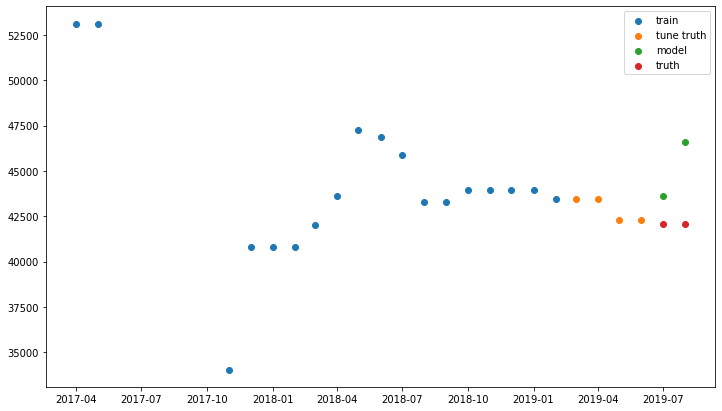

In [353]:
import random
plt.figure(figsize=(12, 7))

key = random.choice(list(data[1][0]['city_quadkey']))
train_ind = data[0][0]['city_quadkey'] == key
tune_ind = data[1][0].loc[X_tune.index]['city_quadkey'] == key
val_ind = data[1][0].loc[X_ctrl.index]['city_quadkey'] == key
test_ind = data[2]['city_quadkey'] == key

plt.scatter(data[0][0][train_ind]['month'], y_train[train_ind], label='train')
plt.scatter(data[1][0].loc[X_tune.index][tune_ind]['month'], data[1][1].loc[X_tune.index][tune_ind], label='tune truth')
plt.scatter(data[1][0].loc[X_ctrl.index][val_ind]['month'], model2.predict(X_ctrl[val_ind].values), label='model')
plt.scatter(data[1][0].loc[X_ctrl.index][val_ind]['month'], 
            data[1][1].loc[X_ctrl.index][val_ind], label='truth')
plt.legend()

In [358]:
meta_val, meta_test = get_all(data)

/home/data_sapiens/programs/challenges/hackTheRealty/utils/data.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['y'] = train_y


/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/funct

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is con

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/funct

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/data_sapiens/Anaconda/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/data_sapiens/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastruc

ValueError: too many values to unpack (expected 2)

In [364]:
def first_model_xgb(data, meta_val, meta_test, params):
    X_train, y_train = data[0][0].drop(['month', 'city_quadkey'], axis=1).values, data[0][1].values
    X_val, y_val = data[1][0].drop(['month', 'city_quadkey'], axis=1).values, data[1][1].values
    X_test = data[2].drop(['month', 'city_quadkey'], axis=1).values

    model = xgboost.XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                                                    (X_val, y_val)], eval_metric=xgbmape)
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)

    print(f'Train: {invmape(y_train, pred_train)}')
    print(f'Val: {invmape(y_val, pred_val)}')
    
    meta_val['xgboost'] = model.predict(X_val)
    meta_test['xgboost'] = model.predict(X_test)
    return model, meta_val, meta_test

In [365]:
def first_model_RF(data, meta_val, meta_test, params):
    X_train, y_train = data[0][0].drop(['month', 'city_quadkey'], axis=1).values, data[0][1].values
    X_val, y_val = data[1][0].drop(['month', 'city_quadkey'], axis=1).values, data[1][1].values
    X_test = data[2].drop(['month', 'city_quadkey'], axis=1).values

    model = xgboost.XGBRFRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                                                    (X_val, y_val)], eval_metric=xgbmape)
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)

    print(f'Train: {invmape(y_train, pred_train)}')
    print(f'Val: {invmape(y_val, pred_val)}')
    
    meta_val['forest'] = model.predict(X_val)
    meta_test['forest'] = model.predict(X_test)
    return model, meta_val, meta_test

In [362]:
from sklearn.neighbors import KNeighborsRegressor

def first_model_knn(data, meta_val, meta_test):
    X_train, y_train = data[0][0].drop(['month', 'city_quadkey'], axis=1).fillna(0).values, data[0][1].values
    X_val, y_val = data[1][0].drop(['month', 'city_quadkey'], axis=1).fillna(0).values, data[1][1].values
    X_test = data[2].drop(['month', 'city_quadkey'], axis=1).fillna(0).values

    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)

    print(f'Train: {invmape(y_train, pred_train)}')
    print(f'Val: {invmape(y_val, pred_val)}')
    
    meta_val['knn'] = model.predict(X_val)
    meta_test['knn'] = model.predict(X_test)
    return model, meta_val, meta_test

In [363]:
model, meta_val, meta_test = first_model_knn(data, meta_val, meta_test)

Train: 95.57544746176423
Val: 89.69488410162118


In [366]:
model, meta_val, meta_test = first_model_xgb(data, meta_val, meta_test, {'n_estimators': 500, 'max_depth': 7,
                                                                        'n_jobs': -1})

[13:23:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:136449	validation_1-rmse:140998	validation_0-mape:89.6361	validation_1-mape:90.0426
[1]	validation_0-rmse:123315	validation_1-rmse:127989	validation_0-mape:80.3108	validation_1-mape:81.0804
[2]	validation_0-rmse:111463	validation_1-rmse:116273	validation_0-mape:71.9339	validation_1-mape:73.0268
[3]	validation_0-rmse:100814	validation_1-rmse:105746	validation_0-mape:64.4142	validation_1-mape:65.8033
[4]	validation_0-rmse:91268.7	validation_1-rmse:96301.1	validation_0-mape:57.685	validation_1-mape:59.343
[5]	validation_0-rmse:82691.1	validation_1-rmse:87813.9	validation_0-mape:51.6665	validation_1-mape:53.5711
[6]	validation_0-rmse:74978	validation_1-rmse:80185.4	validation_0-mape:46.302	validation_1-mape:48.4201
[7]	validation_0-rmse:68058	validation_1-rmse:73342	validation_0-mape:41.5299	validation_1-mape:43.8536
[8]	validation_0-rmse:6186

[75]	validation_0-rmse:12915.4	validation_1-rmse:18693.9	validation_0-mape:8.8767	validation_1-mape:11.7017
[76]	validation_0-rmse:12895.7	validation_1-rmse:18697.9	validation_0-mape:8.8629	validation_1-mape:11.7022
[77]	validation_0-rmse:12870.8	validation_1-rmse:18673.4	validation_0-mape:8.83201	validation_1-mape:11.6743
[78]	validation_0-rmse:12842.3	validation_1-rmse:18659.7	validation_0-mape:8.79456	validation_1-mape:11.6434
[79]	validation_0-rmse:12824.4	validation_1-rmse:18651.6	validation_0-mape:8.7742	validation_1-mape:11.6223
[80]	validation_0-rmse:12806.1	validation_1-rmse:18640.4	validation_0-mape:8.74983	validation_1-mape:11.6082
[81]	validation_0-rmse:12796.3	validation_1-rmse:18643.8	validation_0-mape:8.74223	validation_1-mape:11.6103
[82]	validation_0-rmse:12773	validation_1-rmse:18638.3	validation_0-mape:8.72458	validation_1-mape:11.6025
[83]	validation_0-rmse:12746.6	validation_1-rmse:18621.7	validation_0-mape:8.68399	validation_1-mape:11.5734
[84]	validation_0-rmse:1

[151]	validation_0-rmse:11661.8	validation_1-rmse:18413.5	validation_0-mape:7.51511	validation_1-mape:11.0209
[152]	validation_0-rmse:11651.6	validation_1-rmse:18409.7	validation_0-mape:7.49777	validation_1-mape:11.0144
[153]	validation_0-rmse:11645.6	validation_1-rmse:18405.4	validation_0-mape:7.48878	validation_1-mape:11.0101
[154]	validation_0-rmse:11630.2	validation_1-rmse:18401.1	validation_0-mape:7.46889	validation_1-mape:11.003
[155]	validation_0-rmse:11611.4	validation_1-rmse:18433.9	validation_0-mape:7.46526	validation_1-mape:11.0079
[156]	validation_0-rmse:11603.6	validation_1-rmse:18430.2	validation_0-mape:7.44166	validation_1-mape:10.9857
[157]	validation_0-rmse:11598.5	validation_1-rmse:18429.3	validation_0-mape:7.4331	validation_1-mape:10.9839
[158]	validation_0-rmse:11591.6	validation_1-rmse:18431.8	validation_0-mape:7.42208	validation_1-mape:10.977
[159]	validation_0-rmse:11589.7	validation_1-rmse:18430.1	validation_0-mape:7.41945	validation_1-mape:10.9759
[160]	validat

[226]	validation_0-rmse:11011.7	validation_1-rmse:18366.7	validation_0-mape:6.60865	validation_1-mape:10.6083
[227]	validation_0-rmse:11007.8	validation_1-rmse:18363.9	validation_0-mape:6.60424	validation_1-mape:10.6074
[228]	validation_0-rmse:11003.1	validation_1-rmse:18360.8	validation_0-mape:6.59493	validation_1-mape:10.602
[229]	validation_0-rmse:10997.4	validation_1-rmse:18359	validation_0-mape:6.58575	validation_1-mape:10.5987
[230]	validation_0-rmse:10995.5	validation_1-rmse:18358.7	validation_0-mape:6.58217	validation_1-mape:10.5978
[231]	validation_0-rmse:10986.8	validation_1-rmse:18355.4	validation_0-mape:6.56397	validation_1-mape:10.5888
[232]	validation_0-rmse:10978.4	validation_1-rmse:18352.5	validation_0-mape:6.5578	validation_1-mape:10.5862
[233]	validation_0-rmse:10965.8	validation_1-rmse:18347.3	validation_0-mape:6.53746	validation_1-mape:10.5729
[234]	validation_0-rmse:10957.2	validation_1-rmse:18350.3	validation_0-mape:6.53335	validation_1-mape:10.5715
[235]	validati

[301]	validation_0-rmse:10613.8	validation_1-rmse:18346.1	validation_0-mape:6.0071	validation_1-mape:10.3639
[302]	validation_0-rmse:10596.2	validation_1-rmse:18372.5	validation_0-mape:6.00518	validation_1-mape:10.3651
[303]	validation_0-rmse:10591	validation_1-rmse:18372.3	validation_0-mape:5.99496	validation_1-mape:10.3605
[304]	validation_0-rmse:10588.9	validation_1-rmse:18371.7	validation_0-mape:5.98998	validation_1-mape:10.3576
[305]	validation_0-rmse:10583.4	validation_1-rmse:18381.8	validation_0-mape:5.98761	validation_1-mape:10.3576
[306]	validation_0-rmse:10583	validation_1-rmse:18381.6	validation_0-mape:5.98427	validation_1-mape:10.3536
[307]	validation_0-rmse:10580.7	validation_1-rmse:18383.4	validation_0-mape:5.98093	validation_1-mape:10.3528
[308]	validation_0-rmse:10578.1	validation_1-rmse:18382.3	validation_0-mape:5.97325	validation_1-mape:10.3482
[309]	validation_0-rmse:10572.5	validation_1-rmse:18379.8	validation_0-mape:5.96562	validation_1-mape:10.3511
[310]	validatio

[376]	validation_0-rmse:10336.9	validation_1-rmse:18471.9	validation_0-mape:5.59471	validation_1-mape:10.2092
[377]	validation_0-rmse:10335.3	validation_1-rmse:18474.2	validation_0-mape:5.59276	validation_1-mape:10.2081
[378]	validation_0-rmse:10332.5	validation_1-rmse:18474.3	validation_0-mape:5.58813	validation_1-mape:10.2082
[379]	validation_0-rmse:10331.5	validation_1-rmse:18474	validation_0-mape:5.58717	validation_1-mape:10.2079
[380]	validation_0-rmse:10329.8	validation_1-rmse:18472.9	validation_0-mape:5.57948	validation_1-mape:10.2
[381]	validation_0-rmse:10328.7	validation_1-rmse:18473.6	validation_0-mape:5.57883	validation_1-mape:10.1999
[382]	validation_0-rmse:10326.7	validation_1-rmse:18473.4	validation_0-mape:5.57381	validation_1-mape:10.1961
[383]	validation_0-rmse:10323.2	validation_1-rmse:18471.8	validation_0-mape:5.56526	validation_1-mape:10.1931
[384]	validation_0-rmse:10319.4	validation_1-rmse:18473.2	validation_0-mape:5.55918	validation_1-mape:10.1893
[385]	validatio

[451]	validation_0-rmse:10147.8	validation_1-rmse:18596.4	validation_0-mape:5.31577	validation_1-mape:10.0904
[452]	validation_0-rmse:10146.3	validation_1-rmse:18597.1	validation_0-mape:5.314	validation_1-mape:10.0908
[453]	validation_0-rmse:10141.8	validation_1-rmse:18607.9	validation_0-mape:5.31028	validation_1-mape:10.091
[454]	validation_0-rmse:10139.3	validation_1-rmse:18608.8	validation_0-mape:5.30512	validation_1-mape:10.0899
[455]	validation_0-rmse:10137.2	validation_1-rmse:18607.7	validation_0-mape:5.30064	validation_1-mape:10.0896
[456]	validation_0-rmse:10135.8	validation_1-rmse:18609.6	validation_0-mape:5.29775	validation_1-mape:10.0899
[457]	validation_0-rmse:10133.3	validation_1-rmse:18611.4	validation_0-mape:5.29599	validation_1-mape:10.0894
[458]	validation_0-rmse:10132	validation_1-rmse:18611.3	validation_0-mape:5.29355	validation_1-mape:10.0888
[459]	validation_0-rmse:10130.7	validation_1-rmse:18612.2	validation_0-mape:5.29306	validation_1-mape:10.0887
[460]	validatio

In [370]:
model, meta_val, meta_test = first_model_RF(data, meta_val, meta_test, {'n_estimators': 10, 'max_depth': 7,
                                                                        'n_jobs': -1})

[13:31:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:21966.9	validation_1-rmse:24287.5	validation_0-mape:13.2232	validation_1-mape:14.3539
Train: 86.77680988659063
Val: 85.64607565384783


In [373]:
from sklearn.model_selection import train_test_split
X_tune, X_ctrl, y_tune, y_ctrl = train_test_split(meta_val, y_val, test_size=0.4, shuffle=False)

model2 = xgboost.XGBRegressor(n_estimators=10000, max_depth=5, n_jobs=-1)
model2.fit(X_tune.values, y_tune, eval_set=[(X_tune.values, y_tune), 
                                                    (X_ctrl.values, y_ctrl)], eval_metric=xgbmape,
          early_stopping_rounds=200)

sample['avg_price_sqm'] = model2.predict(meta_test.values)

[13:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:139047	validation_1-rmse:141927	validation_0-mape:89.831	validation_1-mape:89.8716
Multiple eval metrics have been passed: 'validation_1-mape' will be used for early stopping.

Will train until validation_1-mape hasn't improved in 200 rounds.
[1]	validation_0-rmse:125399	validation_1-rmse:128022	validation_0-mape:80.6717	validation_1-mape:80.6954
[2]	validation_0-rmse:113106	validation_1-rmse:115512	validation_0-mape:72.4273	validation_1-mape:72.4453
[3]	validation_0-rmse:102050	validation_1-rmse:104229	validation_0-mape:65.0278	validation_1-mape:65.0565
[4]	validation_0-rmse:92095.5	validation_1-rmse:94097.7	validation_0-mape:58.3887	validation_1-mape:58.4257
[5]	validation_0-rmse:83143.1	validation_1-rmse:84986.4	validation_0-mape:52.447	validation_1-mape:52.4831
[6]	validation_0-rmse:75074.5	validation_1-rmse:76841.1	validation_0-mape:4

[74]	validation_0-rmse:7519.73	validation_1-rmse:12585	validation_0-mape:5.18142	validation_1-mape:6.69477
[75]	validation_0-rmse:7504.41	validation_1-rmse:12578	validation_0-mape:5.17591	validation_1-mape:6.69206
[76]	validation_0-rmse:7490.04	validation_1-rmse:12571.6	validation_0-mape:5.16544	validation_1-mape:6.68435
[77]	validation_0-rmse:7484.3	validation_1-rmse:12568.5	validation_0-mape:5.15609	validation_1-mape:6.6768
[78]	validation_0-rmse:7471.83	validation_1-rmse:12561.6	validation_0-mape:5.14339	validation_1-mape:6.66695
[79]	validation_0-rmse:7455.41	validation_1-rmse:12550.9	validation_0-mape:5.13491	validation_1-mape:6.66407
[80]	validation_0-rmse:7444.37	validation_1-rmse:12547.4	validation_0-mape:5.132	validation_1-mape:6.66342
[81]	validation_0-rmse:7438.31	validation_1-rmse:12543.5	validation_0-mape:5.12843	validation_1-mape:6.66074
[82]	validation_0-rmse:7423.74	validation_1-rmse:12535.6	validation_0-mape:5.12198	validation_1-mape:6.65712
[83]	validation_0-rmse:7376

[150]	validation_0-rmse:6588.85	validation_1-rmse:12183.8	validation_0-mape:4.70064	validation_1-mape:6.40296
[151]	validation_0-rmse:6587.82	validation_1-rmse:12183.6	validation_0-mape:4.69964	validation_1-mape:6.40322
[152]	validation_0-rmse:6575.64	validation_1-rmse:12182.2	validation_0-mape:4.69257	validation_1-mape:6.40038
[153]	validation_0-rmse:6556.49	validation_1-rmse:12174.6	validation_0-mape:4.68757	validation_1-mape:6.39718
[154]	validation_0-rmse:6552.18	validation_1-rmse:12170.3	validation_0-mape:4.67909	validation_1-mape:6.39218
[155]	validation_0-rmse:6531.43	validation_1-rmse:12164.1	validation_0-mape:4.67134	validation_1-mape:6.38781
[156]	validation_0-rmse:6530.16	validation_1-rmse:12162.4	validation_0-mape:4.67135	validation_1-mape:6.38783
[157]	validation_0-rmse:6526.54	validation_1-rmse:12157.2	validation_0-mape:4.67107	validation_1-mape:6.38751
[158]	validation_0-rmse:6505.43	validation_1-rmse:12152.5	validation_0-mape:4.66441	validation_1-mape:6.38351
[159]	vali

[225]	validation_0-rmse:5946.24	validation_1-rmse:11900	validation_0-mape:4.36129	validation_1-mape:6.20317
[226]	validation_0-rmse:5945.47	validation_1-rmse:11899.8	validation_0-mape:4.36124	validation_1-mape:6.20314
[227]	validation_0-rmse:5934.7	validation_1-rmse:11895.3	validation_0-mape:4.35672	validation_1-mape:6.19962
[228]	validation_0-rmse:5923.71	validation_1-rmse:11889.8	validation_0-mape:4.35003	validation_1-mape:6.19533
[229]	validation_0-rmse:5922.66	validation_1-rmse:11889.1	validation_0-mape:4.34621	validation_1-mape:6.19301
[230]	validation_0-rmse:5915.65	validation_1-rmse:11887.9	validation_0-mape:4.34083	validation_1-mape:6.19011
[231]	validation_0-rmse:5908.22	validation_1-rmse:11884.8	validation_0-mape:4.33688	validation_1-mape:6.18692
[232]	validation_0-rmse:5901.77	validation_1-rmse:11882.9	validation_0-mape:4.33172	validation_1-mape:6.18369
[233]	validation_0-rmse:5888.63	validation_1-rmse:11881.7	validation_0-mape:4.32424	validation_1-mape:6.17954
[234]	validat

[300]	validation_0-rmse:5385.14	validation_1-rmse:11658.7	validation_0-mape:4.03814	validation_1-mape:6.00314
[301]	validation_0-rmse:5380.31	validation_1-rmse:11657.3	validation_0-mape:4.03687	validation_1-mape:6.00275
[302]	validation_0-rmse:5379.84	validation_1-rmse:11655.6	validation_0-mape:4.03684	validation_1-mape:6.00273
[303]	validation_0-rmse:5378.46	validation_1-rmse:11654.5	validation_0-mape:4.0356	validation_1-mape:6.00119
[304]	validation_0-rmse:5377.03	validation_1-rmse:11653.9	validation_0-mape:4.02738	validation_1-mape:5.99641
[305]	validation_0-rmse:5368.06	validation_1-rmse:11650.1	validation_0-mape:4.01501	validation_1-mape:5.98739
[306]	validation_0-rmse:5364.14	validation_1-rmse:11648.7	validation_0-mape:4.01259	validation_1-mape:5.98586
[307]	validation_0-rmse:5359.27	validation_1-rmse:11646.2	validation_0-mape:4.00746	validation_1-mape:5.98157
[308]	validation_0-rmse:5353.6	validation_1-rmse:11644.4	validation_0-mape:4.00167	validation_1-mape:5.97852
[309]	valida

[375]	validation_0-rmse:5024.09	validation_1-rmse:11515.4	validation_0-mape:3.80565	validation_1-mape:5.85721
[376]	validation_0-rmse:5022	validation_1-rmse:11514.3	validation_0-mape:3.80543	validation_1-mape:5.8572
[377]	validation_0-rmse:5015.84	validation_1-rmse:11510.8	validation_0-mape:3.80145	validation_1-mape:5.85372
[378]	validation_0-rmse:5010.22	validation_1-rmse:11509	validation_0-mape:3.79472	validation_1-mape:5.84824
[379]	validation_0-rmse:5006.76	validation_1-rmse:11506.9	validation_0-mape:3.79225	validation_1-mape:5.84748
[380]	validation_0-rmse:5002.85	validation_1-rmse:11501	validation_0-mape:3.79051	validation_1-mape:5.84643
[381]	validation_0-rmse:5001.9	validation_1-rmse:11500.7	validation_0-mape:3.78504	validation_1-mape:5.84368
[382]	validation_0-rmse:4989.67	validation_1-rmse:11499.4	validation_0-mape:3.77419	validation_1-mape:5.83865
[383]	validation_0-rmse:4984.36	validation_1-rmse:11497.2	validation_0-mape:3.77048	validation_1-mape:5.83526
[384]	validation_0-

[450]	validation_0-rmse:4648.88	validation_1-rmse:11374.1	validation_0-mape:3.56668	validation_1-mape:5.70614
[451]	validation_0-rmse:4647.67	validation_1-rmse:11374.6	validation_0-mape:3.56656	validation_1-mape:5.70633
[452]	validation_0-rmse:4637.89	validation_1-rmse:11370.1	validation_0-mape:3.55678	validation_1-mape:5.69953
[453]	validation_0-rmse:4632.36	validation_1-rmse:11367.2	validation_0-mape:3.55524	validation_1-mape:5.69827
[454]	validation_0-rmse:4628.16	validation_1-rmse:11363.8	validation_0-mape:3.55471	validation_1-mape:5.69825
[455]	validation_0-rmse:4622.1	validation_1-rmse:11362	validation_0-mape:3.54955	validation_1-mape:5.694
[456]	validation_0-rmse:4618.71	validation_1-rmse:11360.3	validation_0-mape:3.54604	validation_1-mape:5.69173
[457]	validation_0-rmse:4616.04	validation_1-rmse:11359.3	validation_0-mape:3.54268	validation_1-mape:5.68871
[458]	validation_0-rmse:4611.25	validation_1-rmse:11356.5	validation_0-mape:3.53951	validation_1-mape:5.68657
[459]	validatio

[525]	validation_0-rmse:4354.45	validation_1-rmse:11262.7	validation_0-mape:3.37493	validation_1-mape:5.59024
[526]	validation_0-rmse:4352.06	validation_1-rmse:11261.1	validation_0-mape:3.37288	validation_1-mape:5.58939
[527]	validation_0-rmse:4351.1	validation_1-rmse:11261.3	validation_0-mape:3.37251	validation_1-mape:5.5893
[528]	validation_0-rmse:4347.71	validation_1-rmse:11259.4	validation_0-mape:3.37032	validation_1-mape:5.58755
[529]	validation_0-rmse:4344.45	validation_1-rmse:11257.4	validation_0-mape:3.36745	validation_1-mape:5.58505
[530]	validation_0-rmse:4339.64	validation_1-rmse:11255.8	validation_0-mape:3.3622	validation_1-mape:5.58148
[531]	validation_0-rmse:4339.11	validation_1-rmse:11255	validation_0-mape:3.36217	validation_1-mape:5.58146
[532]	validation_0-rmse:4336.75	validation_1-rmse:11254.1	validation_0-mape:3.35635	validation_1-mape:5.57714
[533]	validation_0-rmse:4328.76	validation_1-rmse:11254.1	validation_0-mape:3.35273	validation_1-mape:5.57593
[534]	validatio

[600]	validation_0-rmse:4107.87	validation_1-rmse:11172.2	validation_0-mape:3.19138	validation_1-mape:5.47811
[601]	validation_0-rmse:4104.66	validation_1-rmse:11171.3	validation_0-mape:3.18745	validation_1-mape:5.47385
[602]	validation_0-rmse:4101.81	validation_1-rmse:11170	validation_0-mape:3.18616	validation_1-mape:5.47326
[603]	validation_0-rmse:4098.94	validation_1-rmse:11167.8	validation_0-mape:3.18313	validation_1-mape:5.47029
[604]	validation_0-rmse:4096.21	validation_1-rmse:11167.1	validation_0-mape:3.1801	validation_1-mape:5.46854
[605]	validation_0-rmse:4093.88	validation_1-rmse:11165.5	validation_0-mape:3.17949	validation_1-mape:5.4681
[606]	validation_0-rmse:4092.99	validation_1-rmse:11166.3	validation_0-mape:3.17936	validation_1-mape:5.46813
[607]	validation_0-rmse:4089.2	validation_1-rmse:11164.5	validation_0-mape:3.17761	validation_1-mape:5.46666
[608]	validation_0-rmse:4085.34	validation_1-rmse:11163.2	validation_0-mape:3.17606	validation_1-mape:5.46611
[609]	validatio

[675]	validation_0-rmse:3887.34	validation_1-rmse:11098.7	validation_0-mape:3.04273	validation_1-mape:5.38432
[676]	validation_0-rmse:3882.84	validation_1-rmse:11097.6	validation_0-mape:3.039	validation_1-mape:5.38187
[677]	validation_0-rmse:3878.42	validation_1-rmse:11096.1	validation_0-mape:3.03589	validation_1-mape:5.37926
[678]	validation_0-rmse:3876	validation_1-rmse:11095.7	validation_0-mape:3.03459	validation_1-mape:5.37861
[679]	validation_0-rmse:3874.13	validation_1-rmse:11094.6	validation_0-mape:3.03313	validation_1-mape:5.37741
[680]	validation_0-rmse:3871.96	validation_1-rmse:11094.1	validation_0-mape:3.03235	validation_1-mape:5.37701
[681]	validation_0-rmse:3869.49	validation_1-rmse:11093.7	validation_0-mape:3.03158	validation_1-mape:5.3764
[682]	validation_0-rmse:3867.22	validation_1-rmse:11093.4	validation_0-mape:3.03133	validation_1-mape:5.37638
[683]	validation_0-rmse:3865.73	validation_1-rmse:11093.4	validation_0-mape:3.0292	validation_1-mape:5.37535
[684]	validation_

[750]	validation_0-rmse:3688.83	validation_1-rmse:11027.5	validation_0-mape:2.91405	validation_1-mape:5.30396
[751]	validation_0-rmse:3686.86	validation_1-rmse:11026	validation_0-mape:2.9133	validation_1-mape:5.30325
[752]	validation_0-rmse:3686.45	validation_1-rmse:11025.9	validation_0-mape:2.91294	validation_1-mape:5.30328
[753]	validation_0-rmse:3681.95	validation_1-rmse:11024.1	validation_0-mape:2.91127	validation_1-mape:5.30218
[754]	validation_0-rmse:3678.16	validation_1-rmse:11022.7	validation_0-mape:2.90842	validation_1-mape:5.30009
[755]	validation_0-rmse:3674.43	validation_1-rmse:11022	validation_0-mape:2.90449	validation_1-mape:5.29793
[756]	validation_0-rmse:3669.79	validation_1-rmse:11021.5	validation_0-mape:2.9028	validation_1-mape:5.29761
[757]	validation_0-rmse:3668.55	validation_1-rmse:11021.1	validation_0-mape:2.90141	validation_1-mape:5.29682
[758]	validation_0-rmse:3665.51	validation_1-rmse:11020.2	validation_0-mape:2.89995	validation_1-mape:5.29596
[759]	validation

[825]	validation_0-rmse:3508.61	validation_1-rmse:10968.5	validation_0-mape:2.80049	validation_1-mape:5.23408
[826]	validation_0-rmse:3506.48	validation_1-rmse:10967.5	validation_0-mape:2.79947	validation_1-mape:5.23301
[827]	validation_0-rmse:3503.35	validation_1-rmse:10967.3	validation_0-mape:2.79723	validation_1-mape:5.23189
[828]	validation_0-rmse:3502.5	validation_1-rmse:10967.1	validation_0-mape:2.79436	validation_1-mape:5.23011
[829]	validation_0-rmse:3498	validation_1-rmse:10967	validation_0-mape:2.79254	validation_1-mape:5.22996
[830]	validation_0-rmse:3496.02	validation_1-rmse:10966.7	validation_0-mape:2.79049	validation_1-mape:5.22891
[831]	validation_0-rmse:3493.12	validation_1-rmse:10965.9	validation_0-mape:2.78899	validation_1-mape:5.22795
[832]	validation_0-rmse:3490.02	validation_1-rmse:10964.4	validation_0-mape:2.78651	validation_1-mape:5.22612
[833]	validation_0-rmse:3488.05	validation_1-rmse:10964.1	validation_0-mape:2.78471	validation_1-mape:5.22551
[834]	validation

[900]	validation_0-rmse:3330.47	validation_1-rmse:10919.4	validation_0-mape:2.66584	validation_1-mape:5.15474
[901]	validation_0-rmse:3329.22	validation_1-rmse:10918.6	validation_0-mape:2.66552	validation_1-mape:5.15448
[902]	validation_0-rmse:3328.67	validation_1-rmse:10918.6	validation_0-mape:2.66489	validation_1-mape:5.15432
[903]	validation_0-rmse:3326.44	validation_1-rmse:10918.7	validation_0-mape:2.66419	validation_1-mape:5.15397
[904]	validation_0-rmse:3324.66	validation_1-rmse:10917.3	validation_0-mape:2.66344	validation_1-mape:5.153
[905]	validation_0-rmse:3323.4	validation_1-rmse:10917	validation_0-mape:2.66249	validation_1-mape:5.15336
[906]	validation_0-rmse:3321.54	validation_1-rmse:10915.4	validation_0-mape:2.66152	validation_1-mape:5.15172
[907]	validation_0-rmse:3319.93	validation_1-rmse:10915.1	validation_0-mape:2.65979	validation_1-mape:5.15089
[908]	validation_0-rmse:3318.61	validation_1-rmse:10914.2	validation_0-mape:2.65905	validation_1-mape:5.14996
[909]	validatio

[975]	validation_0-rmse:3188.92	validation_1-rmse:10879.1	validation_0-mape:2.56571	validation_1-mape:5.09808
[976]	validation_0-rmse:3187.52	validation_1-rmse:10878.7	validation_0-mape:2.56473	validation_1-mape:5.09704
[977]	validation_0-rmse:3185.28	validation_1-rmse:10877.8	validation_0-mape:2.56381	validation_1-mape:5.0964
[978]	validation_0-rmse:3183.28	validation_1-rmse:10877.8	validation_0-mape:2.56135	validation_1-mape:5.09602
[979]	validation_0-rmse:3180.53	validation_1-rmse:10877	validation_0-mape:2.55942	validation_1-mape:5.09514
[980]	validation_0-rmse:3178.8	validation_1-rmse:10876.1	validation_0-mape:2.55881	validation_1-mape:5.09447
[981]	validation_0-rmse:3177.08	validation_1-rmse:10876.1	validation_0-mape:2.55737	validation_1-mape:5.09427
[982]	validation_0-rmse:3174.1	validation_1-rmse:10874.7	validation_0-mape:2.55543	validation_1-mape:5.0926
[983]	validation_0-rmse:3171.76	validation_1-rmse:10873.6	validation_0-mape:2.55173	validation_1-mape:5.09008
[984]	validation

[1050]	validation_0-rmse:3057.49	validation_1-rmse:10849.3	validation_0-mape:2.45525	validation_1-mape:5.04215
[1051]	validation_0-rmse:3055.07	validation_1-rmse:10848.2	validation_0-mape:2.45301	validation_1-mape:5.04012
[1052]	validation_0-rmse:3054.95	validation_1-rmse:10847.6	validation_0-mape:2.453	validation_1-mape:5.04011
[1053]	validation_0-rmse:3052.84	validation_1-rmse:10847.6	validation_0-mape:2.45268	validation_1-mape:5.03998
[1054]	validation_0-rmse:3051.07	validation_1-rmse:10846.4	validation_0-mape:2.45204	validation_1-mape:5.03944
[1055]	validation_0-rmse:3050.5	validation_1-rmse:10846.2	validation_0-mape:2.4514	validation_1-mape:5.03921
[1056]	validation_0-rmse:3048.64	validation_1-rmse:10845.8	validation_0-mape:2.45089	validation_1-mape:5.03893
[1057]	validation_0-rmse:3046.25	validation_1-rmse:10844.6	validation_0-mape:2.45009	validation_1-mape:5.03854
[1058]	validation_0-rmse:3044.88	validation_1-rmse:10844.7	validation_0-mape:2.44951	validation_1-mape:5.0384
[1059]

[1125]	validation_0-rmse:2929.45	validation_1-rmse:10816.5	validation_0-mape:2.36239	validation_1-mape:4.98892
[1126]	validation_0-rmse:2928.86	validation_1-rmse:10816	validation_0-mape:2.36231	validation_1-mape:4.98891
[1127]	validation_0-rmse:2928.53	validation_1-rmse:10816.1	validation_0-mape:2.36225	validation_1-mape:4.98886
[1128]	validation_0-rmse:2927.56	validation_1-rmse:10816.3	validation_0-mape:2.36215	validation_1-mape:4.98882
[1129]	validation_0-rmse:2927.08	validation_1-rmse:10815.7	validation_0-mape:2.36176	validation_1-mape:4.98857
[1130]	validation_0-rmse:2923.04	validation_1-rmse:10815.3	validation_0-mape:2.36026	validation_1-mape:4.98804
[1131]	validation_0-rmse:2921.59	validation_1-rmse:10814.7	validation_0-mape:2.35844	validation_1-mape:4.9873
[1132]	validation_0-rmse:2919.67	validation_1-rmse:10814.6	validation_0-mape:2.35699	validation_1-mape:4.98616
[1133]	validation_0-rmse:2918.19	validation_1-rmse:10814.9	validation_0-mape:2.35575	validation_1-mape:4.98581
[113

[1200]	validation_0-rmse:2820.65	validation_1-rmse:10788.1	validation_0-mape:2.28346	validation_1-mape:4.94496
[1201]	validation_0-rmse:2819.63	validation_1-rmse:10787.6	validation_0-mape:2.2826	validation_1-mape:4.94423
[1202]	validation_0-rmse:2818.15	validation_1-rmse:10787.6	validation_0-mape:2.28187	validation_1-mape:4.94468
[1203]	validation_0-rmse:2817.68	validation_1-rmse:10787.2	validation_0-mape:2.28034	validation_1-mape:4.94345
[1204]	validation_0-rmse:2817.21	validation_1-rmse:10787	validation_0-mape:2.28029	validation_1-mape:4.94343
[1205]	validation_0-rmse:2815.93	validation_1-rmse:10786.8	validation_0-mape:2.27866	validation_1-mape:4.94268
[1206]	validation_0-rmse:2814.88	validation_1-rmse:10786.4	validation_0-mape:2.27701	validation_1-mape:4.94115
[1207]	validation_0-rmse:2813.83	validation_1-rmse:10785.7	validation_0-mape:2.27562	validation_1-mape:4.94052
[1208]	validation_0-rmse:2813.59	validation_1-rmse:10785.6	validation_0-mape:2.27521	validation_1-mape:4.94037
[120

[1275]	validation_0-rmse:2735.04	validation_1-rmse:10767.5	validation_0-mape:2.20242	validation_1-mape:4.89816
[1276]	validation_0-rmse:2733.55	validation_1-rmse:10767	validation_0-mape:2.2019	validation_1-mape:4.8978
[1277]	validation_0-rmse:2732.07	validation_1-rmse:10766.8	validation_0-mape:2.20057	validation_1-mape:4.89724
[1278]	validation_0-rmse:2729.55	validation_1-rmse:10766.5	validation_0-mape:2.19882	validation_1-mape:4.89636
[1279]	validation_0-rmse:2727.77	validation_1-rmse:10766.2	validation_0-mape:2.19739	validation_1-mape:4.89543
[1280]	validation_0-rmse:2726.41	validation_1-rmse:10766.1	validation_0-mape:2.19585	validation_1-mape:4.89415
[1281]	validation_0-rmse:2724.45	validation_1-rmse:10765.7	validation_0-mape:2.1943	validation_1-mape:4.89305
[1282]	validation_0-rmse:2723.33	validation_1-rmse:10764.8	validation_0-mape:2.19401	validation_1-mape:4.89296
[1283]	validation_0-rmse:2721.85	validation_1-rmse:10764.4	validation_0-mape:2.1923	validation_1-mape:4.89236
[1284]	

[1350]	validation_0-rmse:2636.41	validation_1-rmse:10748	validation_0-mape:2.1195	validation_1-mape:4.85565
[1351]	validation_0-rmse:2635.36	validation_1-rmse:10747.7	validation_0-mape:2.11795	validation_1-mape:4.85462
[1352]	validation_0-rmse:2633.73	validation_1-rmse:10747.2	validation_0-mape:2.11633	validation_1-mape:4.85413
[1353]	validation_0-rmse:2633.36	validation_1-rmse:10747.3	validation_0-mape:2.11593	validation_1-mape:4.85411
[1354]	validation_0-rmse:2632.92	validation_1-rmse:10747	validation_0-mape:2.11541	validation_1-mape:4.8539
[1355]	validation_0-rmse:2631.28	validation_1-rmse:10746.2	validation_0-mape:2.11454	validation_1-mape:4.85313
[1356]	validation_0-rmse:2630.9	validation_1-rmse:10746	validation_0-mape:2.11407	validation_1-mape:4.85289
[1357]	validation_0-rmse:2630.34	validation_1-rmse:10746	validation_0-mape:2.11401	validation_1-mape:4.85289
[1358]	validation_0-rmse:2628.5	validation_1-rmse:10745.8	validation_0-mape:2.11316	validation_1-mape:4.85245
[1359]	valida

[1425]	validation_0-rmse:2547.47	validation_1-rmse:10730.7	validation_0-mape:2.0506	validation_1-mape:4.82323
[1426]	validation_0-rmse:2547.43	validation_1-rmse:10730.8	validation_0-mape:2.05059	validation_1-mape:4.82324
[1427]	validation_0-rmse:2545.23	validation_1-rmse:10731.2	validation_0-mape:2.04912	validation_1-mape:4.8232
[1428]	validation_0-rmse:2544.75	validation_1-rmse:10731.1	validation_0-mape:2.04878	validation_1-mape:4.82306
[1429]	validation_0-rmse:2543.59	validation_1-rmse:10730.8	validation_0-mape:2.04762	validation_1-mape:4.8222
[1430]	validation_0-rmse:2542.43	validation_1-rmse:10730.4	validation_0-mape:2.04618	validation_1-mape:4.8212
[1431]	validation_0-rmse:2541.26	validation_1-rmse:10730.1	validation_0-mape:2.04458	validation_1-mape:4.82024
[1432]	validation_0-rmse:2540.44	validation_1-rmse:10730.2	validation_0-mape:2.04402	validation_1-mape:4.81999
[1433]	validation_0-rmse:2539.23	validation_1-rmse:10730	validation_0-mape:2.04319	validation_1-mape:4.81952
[1434]	

[1500]	validation_0-rmse:2475.29	validation_1-rmse:10717.8	validation_0-mape:1.99385	validation_1-mape:4.79718
[1501]	validation_0-rmse:2474.41	validation_1-rmse:10717.9	validation_0-mape:1.99249	validation_1-mape:4.79647
[1502]	validation_0-rmse:2473.49	validation_1-rmse:10718.1	validation_0-mape:1.99216	validation_1-mape:4.79635
[1503]	validation_0-rmse:2471.66	validation_1-rmse:10717.5	validation_0-mape:1.99153	validation_1-mape:4.79582
[1504]	validation_0-rmse:2470.95	validation_1-rmse:10717.3	validation_0-mape:1.9909	validation_1-mape:4.79544
[1505]	validation_0-rmse:2468.53	validation_1-rmse:10715.9	validation_0-mape:1.98993	validation_1-mape:4.79487
[1506]	validation_0-rmse:2466.19	validation_1-rmse:10715.6	validation_0-mape:1.98812	validation_1-mape:4.79403
[1507]	validation_0-rmse:2465	validation_1-rmse:10715.3	validation_0-mape:1.98672	validation_1-mape:4.79338
[1508]	validation_0-rmse:2462.83	validation_1-rmse:10714.4	validation_0-mape:1.98392	validation_1-mape:4.79148
[1509

[1575]	validation_0-rmse:2390.49	validation_1-rmse:10701.5	validation_0-mape:1.92389	validation_1-mape:4.76258
[1576]	validation_0-rmse:2388.89	validation_1-rmse:10701.3	validation_0-mape:1.92263	validation_1-mape:4.76184
[1577]	validation_0-rmse:2387.38	validation_1-rmse:10701.1	validation_0-mape:1.92177	validation_1-mape:4.76162
[1578]	validation_0-rmse:2386.25	validation_1-rmse:10701	validation_0-mape:1.91923	validation_1-mape:4.7606
[1579]	validation_0-rmse:2386.05	validation_1-rmse:10700.6	validation_0-mape:1.91922	validation_1-mape:4.7606
[1580]	validation_0-rmse:2385.44	validation_1-rmse:10700.5	validation_0-mape:1.91911	validation_1-mape:4.76065
[1581]	validation_0-rmse:2384.85	validation_1-rmse:10700.7	validation_0-mape:1.91877	validation_1-mape:4.76063
[1582]	validation_0-rmse:2383.76	validation_1-rmse:10700.3	validation_0-mape:1.91785	validation_1-mape:4.75967
[1583]	validation_0-rmse:2383.14	validation_1-rmse:10700.2	validation_0-mape:1.91755	validation_1-mape:4.75955
[1584

[1650]	validation_0-rmse:2318.14	validation_1-rmse:10687	validation_0-mape:1.86224	validation_1-mape:4.73679
[1651]	validation_0-rmse:2317.64	validation_1-rmse:10686.5	validation_0-mape:1.86208	validation_1-mape:4.73667
[1652]	validation_0-rmse:2316.74	validation_1-rmse:10686.4	validation_0-mape:1.8613	validation_1-mape:4.73628
[1653]	validation_0-rmse:2315.9	validation_1-rmse:10686.2	validation_0-mape:1.86032	validation_1-mape:4.73587
[1654]	validation_0-rmse:2315.75	validation_1-rmse:10686.2	validation_0-mape:1.85895	validation_1-mape:4.73498
[1655]	validation_0-rmse:2314.97	validation_1-rmse:10686	validation_0-mape:1.85802	validation_1-mape:4.73432
[1656]	validation_0-rmse:2313.98	validation_1-rmse:10685.6	validation_0-mape:1.85633	validation_1-mape:4.73351
[1657]	validation_0-rmse:2313.38	validation_1-rmse:10685.7	validation_0-mape:1.85616	validation_1-mape:4.73354
[1658]	validation_0-rmse:2312.95	validation_1-rmse:10685.6	validation_0-mape:1.8552	validation_1-mape:4.73328
[1659]	v

[1725]	validation_0-rmse:2247.59	validation_1-rmse:10672.5	validation_0-mape:1.81078	validation_1-mape:4.71246
[1726]	validation_0-rmse:2246.54	validation_1-rmse:10672.3	validation_0-mape:1.81007	validation_1-mape:4.71172
[1727]	validation_0-rmse:2244.74	validation_1-rmse:10672.6	validation_0-mape:1.80926	validation_1-mape:4.71139
[1728]	validation_0-rmse:2244.17	validation_1-rmse:10672.5	validation_0-mape:1.80899	validation_1-mape:4.71138
[1729]	validation_0-rmse:2243.31	validation_1-rmse:10672.2	validation_0-mape:1.80873	validation_1-mape:4.71127
[1730]	validation_0-rmse:2242.34	validation_1-rmse:10672.1	validation_0-mape:1.80845	validation_1-mape:4.7111
[1731]	validation_0-rmse:2241.93	validation_1-rmse:10671.2	validation_0-mape:1.8084	validation_1-mape:4.71104
[1732]	validation_0-rmse:2241.07	validation_1-rmse:10671	validation_0-mape:1.8082	validation_1-mape:4.71098
[1733]	validation_0-rmse:2240.94	validation_1-rmse:10671	validation_0-mape:1.80713	validation_1-mape:4.7105
[1734]	va

[1800]	validation_0-rmse:2181	validation_1-rmse:10658	validation_0-mape:1.75882	validation_1-mape:4.69019
[1801]	validation_0-rmse:2180.09	validation_1-rmse:10657.8	validation_0-mape:1.75818	validation_1-mape:4.68984
[1802]	validation_0-rmse:2179.37	validation_1-rmse:10657.7	validation_0-mape:1.75624	validation_1-mape:4.6893
[1803]	validation_0-rmse:2177.98	validation_1-rmse:10657.1	validation_0-mape:1.75536	validation_1-mape:4.68838
[1804]	validation_0-rmse:2176.78	validation_1-rmse:10656.4	validation_0-mape:1.75464	validation_1-mape:4.68771
[1805]	validation_0-rmse:2176.63	validation_1-rmse:10656.5	validation_0-mape:1.75418	validation_1-mape:4.68777
[1806]	validation_0-rmse:2175.78	validation_1-rmse:10656.1	validation_0-mape:1.75313	validation_1-mape:4.68713
[1807]	validation_0-rmse:2175.75	validation_1-rmse:10655.9	validation_0-mape:1.75312	validation_1-mape:4.68712
[1808]	validation_0-rmse:2175.28	validation_1-rmse:10655.9	validation_0-mape:1.75239	validation_1-mape:4.68675
[1809]	

[1875]	validation_0-rmse:2124.11	validation_1-rmse:10645.4	validation_0-mape:1.70879	validation_1-mape:4.66535
[1876]	validation_0-rmse:2123.52	validation_1-rmse:10645.2	validation_0-mape:1.70831	validation_1-mape:4.66524
[1877]	validation_0-rmse:2122.96	validation_1-rmse:10645	validation_0-mape:1.70774	validation_1-mape:4.66492
[1878]	validation_0-rmse:2122.27	validation_1-rmse:10644.8	validation_0-mape:1.70756	validation_1-mape:4.66484
[1879]	validation_0-rmse:2121.72	validation_1-rmse:10644.6	validation_0-mape:1.70715	validation_1-mape:4.66447
[1880]	validation_0-rmse:2120.97	validation_1-rmse:10644.5	validation_0-mape:1.70662	validation_1-mape:4.66417
[1881]	validation_0-rmse:2120.27	validation_1-rmse:10644	validation_0-mape:1.70646	validation_1-mape:4.66413
[1882]	validation_0-rmse:2119.98	validation_1-rmse:10643.9	validation_0-mape:1.70593	validation_1-mape:4.66369
[1883]	validation_0-rmse:2119.39	validation_1-rmse:10643.6	validation_0-mape:1.70564	validation_1-mape:4.66355
[1884

[1950]	validation_0-rmse:2072.52	validation_1-rmse:10632.8	validation_0-mape:1.67	validation_1-mape:4.6474
[1951]	validation_0-rmse:2072.35	validation_1-rmse:10633.1	validation_0-mape:1.66996	validation_1-mape:4.64744
[1952]	validation_0-rmse:2071.65	validation_1-rmse:10633	validation_0-mape:1.66948	validation_1-mape:4.6472
[1953]	validation_0-rmse:2070.89	validation_1-rmse:10632.9	validation_0-mape:1.66801	validation_1-mape:4.64708
[1954]	validation_0-rmse:2070.06	validation_1-rmse:10632.9	validation_0-mape:1.66757	validation_1-mape:4.64692
[1955]	validation_0-rmse:2069.46	validation_1-rmse:10632.9	validation_0-mape:1.66721	validation_1-mape:4.64691
[1956]	validation_0-rmse:2069.22	validation_1-rmse:10633.1	validation_0-mape:1.66698	validation_1-mape:4.64684
[1957]	validation_0-rmse:2067.78	validation_1-rmse:10633.1	validation_0-mape:1.66628	validation_1-mape:4.64659
[1958]	validation_0-rmse:2066.9	validation_1-rmse:10632.8	validation_0-mape:1.66604	validation_1-mape:4.64648
[1959]	va

[2025]	validation_0-rmse:2014.67	validation_1-rmse:10624.9	validation_0-mape:1.63129	validation_1-mape:4.63019
[2026]	validation_0-rmse:2014.04	validation_1-rmse:10624.6	validation_0-mape:1.63076	validation_1-mape:4.62982
[2027]	validation_0-rmse:2013.28	validation_1-rmse:10624.6	validation_0-mape:1.63007	validation_1-mape:4.62986
[2028]	validation_0-rmse:2011.87	validation_1-rmse:10624.5	validation_0-mape:1.62869	validation_1-mape:4.62953
[2029]	validation_0-rmse:2011.47	validation_1-rmse:10624.3	validation_0-mape:1.62804	validation_1-mape:4.62931
[2030]	validation_0-rmse:2010.59	validation_1-rmse:10623.9	validation_0-mape:1.62733	validation_1-mape:4.62854
[2031]	validation_0-rmse:2010.14	validation_1-rmse:10623.9	validation_0-mape:1.6267	validation_1-mape:4.6285
[2032]	validation_0-rmse:2009.76	validation_1-rmse:10624	validation_0-mape:1.62618	validation_1-mape:4.62846
[2033]	validation_0-rmse:2009.32	validation_1-rmse:10624.5	validation_0-mape:1.6261	validation_1-mape:4.62851
[2034]

[2100]	validation_0-rmse:1966.9	validation_1-rmse:10615.3	validation_0-mape:1.59264	validation_1-mape:4.6117
[2101]	validation_0-rmse:1966.02	validation_1-rmse:10615.4	validation_0-mape:1.59224	validation_1-mape:4.61154
[2102]	validation_0-rmse:1965.42	validation_1-rmse:10615.2	validation_0-mape:1.59175	validation_1-mape:4.61109
[2103]	validation_0-rmse:1965.09	validation_1-rmse:10615.1	validation_0-mape:1.59116	validation_1-mape:4.61083
[2104]	validation_0-rmse:1964.33	validation_1-rmse:10615.2	validation_0-mape:1.5906	validation_1-mape:4.61051
[2105]	validation_0-rmse:1962.96	validation_1-rmse:10615.3	validation_0-mape:1.58986	validation_1-mape:4.61016
[2106]	validation_0-rmse:1961.97	validation_1-rmse:10615	validation_0-mape:1.58921	validation_1-mape:4.60987
[2107]	validation_0-rmse:1961.09	validation_1-rmse:10614.9	validation_0-mape:1.5889	validation_1-mape:4.60947
[2108]	validation_0-rmse:1959.92	validation_1-rmse:10614.5	validation_0-mape:1.58842	validation_1-mape:4.60908
[2109]	

[2175]	validation_0-rmse:1914.02	validation_1-rmse:10606	validation_0-mape:1.5535	validation_1-mape:4.595
[2176]	validation_0-rmse:1913.34	validation_1-rmse:10605.5	validation_0-mape:1.55299	validation_1-mape:4.59448
[2177]	validation_0-rmse:1912.23	validation_1-rmse:10605.7	validation_0-mape:1.55241	validation_1-mape:4.59448
[2178]	validation_0-rmse:1911.17	validation_1-rmse:10605.4	validation_0-mape:1.55203	validation_1-mape:4.59434
[2179]	validation_0-rmse:1910.68	validation_1-rmse:10605.4	validation_0-mape:1.55152	validation_1-mape:4.59445
[2180]	validation_0-rmse:1909.34	validation_1-rmse:10605.1	validation_0-mape:1.55113	validation_1-mape:4.59436
[2181]	validation_0-rmse:1908.7	validation_1-rmse:10604.8	validation_0-mape:1.55092	validation_1-mape:4.59416
[2182]	validation_0-rmse:1907.46	validation_1-rmse:10604.5	validation_0-mape:1.55021	validation_1-mape:4.59401
[2183]	validation_0-rmse:1906.85	validation_1-rmse:10604.6	validation_0-mape:1.54975	validation_1-mape:4.59364
[2184]	

[2250]	validation_0-rmse:1864.06	validation_1-rmse:10600.8	validation_0-mape:1.50903	validation_1-mape:4.57847
[2251]	validation_0-rmse:1863.33	validation_1-rmse:10600.5	validation_0-mape:1.50873	validation_1-mape:4.57829
[2252]	validation_0-rmse:1862.69	validation_1-rmse:10599.9	validation_0-mape:1.50854	validation_1-mape:4.5782
[2253]	validation_0-rmse:1861.85	validation_1-rmse:10599.9	validation_0-mape:1.50828	validation_1-mape:4.57814
[2254]	validation_0-rmse:1861.37	validation_1-rmse:10599.9	validation_0-mape:1.50733	validation_1-mape:4.57816
[2255]	validation_0-rmse:1860.88	validation_1-rmse:10599.8	validation_0-mape:1.5069	validation_1-mape:4.57765
[2256]	validation_0-rmse:1860.7	validation_1-rmse:10599.7	validation_0-mape:1.5058	validation_1-mape:4.57753
[2257]	validation_0-rmse:1859.87	validation_1-rmse:10599.4	validation_0-mape:1.50539	validation_1-mape:4.57713
[2258]	validation_0-rmse:1859.8	validation_1-rmse:10599.2	validation_0-mape:1.50538	validation_1-mape:4.57713
[2259]

[2325]	validation_0-rmse:1818.06	validation_1-rmse:10595.9	validation_0-mape:1.47211	validation_1-mape:4.56443
[2326]	validation_0-rmse:1816.99	validation_1-rmse:10595.5	validation_0-mape:1.47101	validation_1-mape:4.56367
[2327]	validation_0-rmse:1816.66	validation_1-rmse:10595.4	validation_0-mape:1.47088	validation_1-mape:4.56367
[2328]	validation_0-rmse:1815.94	validation_1-rmse:10595.4	validation_0-mape:1.47008	validation_1-mape:4.5633
[2329]	validation_0-rmse:1815.45	validation_1-rmse:10595.2	validation_0-mape:1.46987	validation_1-mape:4.56328
[2330]	validation_0-rmse:1814.92	validation_1-rmse:10595.4	validation_0-mape:1.46978	validation_1-mape:4.56332
[2331]	validation_0-rmse:1814.32	validation_1-rmse:10595.5	validation_0-mape:1.46962	validation_1-mape:4.56323
[2332]	validation_0-rmse:1814.06	validation_1-rmse:10595.7	validation_0-mape:1.46955	validation_1-mape:4.56331
[2333]	validation_0-rmse:1812.81	validation_1-rmse:10594.6	validation_0-mape:1.469	validation_1-mape:4.56285
[233

[2400]	validation_0-rmse:1768.79	validation_1-rmse:10590.3	validation_0-mape:1.44023	validation_1-mape:4.55337
[2401]	validation_0-rmse:1768.47	validation_1-rmse:10590.4	validation_0-mape:1.44014	validation_1-mape:4.55339
[2402]	validation_0-rmse:1768.1	validation_1-rmse:10590.4	validation_0-mape:1.43928	validation_1-mape:4.55323
[2403]	validation_0-rmse:1767.53	validation_1-rmse:10590.2	validation_0-mape:1.43835	validation_1-mape:4.55272
[2404]	validation_0-rmse:1767.28	validation_1-rmse:10590	validation_0-mape:1.43825	validation_1-mape:4.55265
[2405]	validation_0-rmse:1766.91	validation_1-rmse:10589.8	validation_0-mape:1.43813	validation_1-mape:4.55253
[2406]	validation_0-rmse:1765.56	validation_1-rmse:10589.7	validation_0-mape:1.43757	validation_1-mape:4.55253
[2407]	validation_0-rmse:1765.15	validation_1-rmse:10589.8	validation_0-mape:1.43745	validation_1-mape:4.55259
[2408]	validation_0-rmse:1764.56	validation_1-rmse:10589.7	validation_0-mape:1.43637	validation_1-mape:4.55222
[240

[2475]	validation_0-rmse:1725.51	validation_1-rmse:10585.2	validation_0-mape:1.4023	validation_1-mape:4.53851
[2476]	validation_0-rmse:1725.07	validation_1-rmse:10585.1	validation_0-mape:1.40195	validation_1-mape:4.53831
[2477]	validation_0-rmse:1724.52	validation_1-rmse:10585	validation_0-mape:1.40142	validation_1-mape:4.53833
[2478]	validation_0-rmse:1723.61	validation_1-rmse:10584.5	validation_0-mape:1.4008	validation_1-mape:4.53744
[2479]	validation_0-rmse:1722.63	validation_1-rmse:10584.2	validation_0-mape:1.4001	validation_1-mape:4.53732
[2480]	validation_0-rmse:1721.82	validation_1-rmse:10584.2	validation_0-mape:1.39961	validation_1-mape:4.53726
[2481]	validation_0-rmse:1721.63	validation_1-rmse:10584.3	validation_0-mape:1.39949	validation_1-mape:4.53725
[2482]	validation_0-rmse:1721.48	validation_1-rmse:10584.4	validation_0-mape:1.3994	validation_1-mape:4.53725
[2483]	validation_0-rmse:1720.86	validation_1-rmse:10584.5	validation_0-mape:1.39916	validation_1-mape:4.53732
[2484]	

[2550]	validation_0-rmse:1684.07	validation_1-rmse:10580.7	validation_0-mape:1.37106	validation_1-mape:4.52901
[2551]	validation_0-rmse:1683.21	validation_1-rmse:10580.4	validation_0-mape:1.37058	validation_1-mape:4.52884
[2552]	validation_0-rmse:1682.51	validation_1-rmse:10580.6	validation_0-mape:1.36989	validation_1-mape:4.52907
[2553]	validation_0-rmse:1681.56	validation_1-rmse:10580.1	validation_0-mape:1.36934	validation_1-mape:4.52812
[2554]	validation_0-rmse:1680.7	validation_1-rmse:10580.1	validation_0-mape:1.36905	validation_1-mape:4.52818
[2555]	validation_0-rmse:1680.32	validation_1-rmse:10580	validation_0-mape:1.36873	validation_1-mape:4.52819
[2556]	validation_0-rmse:1679.67	validation_1-rmse:10580.1	validation_0-mape:1.36815	validation_1-mape:4.52821
[2557]	validation_0-rmse:1679.03	validation_1-rmse:10580	validation_0-mape:1.36774	validation_1-mape:4.52813
[2558]	validation_0-rmse:1678.98	validation_1-rmse:10580.1	validation_0-mape:1.36733	validation_1-mape:4.5281
[2559]	

[2625]	validation_0-rmse:1642.27	validation_1-rmse:10576.3	validation_0-mape:1.34354	validation_1-mape:4.52021
[2626]	validation_0-rmse:1641.56	validation_1-rmse:10576.1	validation_0-mape:1.34298	validation_1-mape:4.51986
[2627]	validation_0-rmse:1641.31	validation_1-rmse:10576.1	validation_0-mape:1.34244	validation_1-mape:4.51983
[2628]	validation_0-rmse:1641.1	validation_1-rmse:10576.1	validation_0-mape:1.34185	validation_1-mape:4.51968
[2629]	validation_0-rmse:1640.93	validation_1-rmse:10576.1	validation_0-mape:1.3409	validation_1-mape:4.51933
[2630]	validation_0-rmse:1640.88	validation_1-rmse:10576	validation_0-mape:1.34081	validation_1-mape:4.5193
[2631]	validation_0-rmse:1640.19	validation_1-rmse:10575.9	validation_0-mape:1.34026	validation_1-mape:4.51906
[2632]	validation_0-rmse:1639.92	validation_1-rmse:10575.9	validation_0-mape:1.33981	validation_1-mape:4.51916
[2633]	validation_0-rmse:1639.57	validation_1-rmse:10575.9	validation_0-mape:1.33949	validation_1-mape:4.51913
[2634]

[2700]	validation_0-rmse:1608.31	validation_1-rmse:10572.6	validation_0-mape:1.31153	validation_1-mape:4.51127
[2701]	validation_0-rmse:1607.87	validation_1-rmse:10572.5	validation_0-mape:1.31099	validation_1-mape:4.51105
[2702]	validation_0-rmse:1607.57	validation_1-rmse:10572.4	validation_0-mape:1.31086	validation_1-mape:4.51092
[2703]	validation_0-rmse:1607.49	validation_1-rmse:10572.1	validation_0-mape:1.31077	validation_1-mape:4.51093
[2704]	validation_0-rmse:1607.15	validation_1-rmse:10572.2	validation_0-mape:1.31064	validation_1-mape:4.51096
[2705]	validation_0-rmse:1606.75	validation_1-rmse:10572.1	validation_0-mape:1.31047	validation_1-mape:4.51083
[2706]	validation_0-rmse:1606.53	validation_1-rmse:10571.9	validation_0-mape:1.31042	validation_1-mape:4.51082
[2707]	validation_0-rmse:1606.48	validation_1-rmse:10572	validation_0-mape:1.31027	validation_1-mape:4.51082
[2708]	validation_0-rmse:1606.2	validation_1-rmse:10572.1	validation_0-mape:1.31021	validation_1-mape:4.5108
[2709

[2775]	validation_0-rmse:1577.7	validation_1-rmse:10568.9	validation_0-mape:1.28463	validation_1-mape:4.50245
[2776]	validation_0-rmse:1577.5	validation_1-rmse:10569	validation_0-mape:1.28452	validation_1-mape:4.50236
[2777]	validation_0-rmse:1577.03	validation_1-rmse:10568.9	validation_0-mape:1.28345	validation_1-mape:4.50222
[2778]	validation_0-rmse:1576.72	validation_1-rmse:10568.9	validation_0-mape:1.28273	validation_1-mape:4.50201
[2779]	validation_0-rmse:1576.47	validation_1-rmse:10568.8	validation_0-mape:1.28246	validation_1-mape:4.50193
[2780]	validation_0-rmse:1575.9	validation_1-rmse:10568.8	validation_0-mape:1.28158	validation_1-mape:4.50159
[2781]	validation_0-rmse:1574.83	validation_1-rmse:10568.8	validation_0-mape:1.28129	validation_1-mape:4.50147
[2782]	validation_0-rmse:1574	validation_1-rmse:10568.6	validation_0-mape:1.28105	validation_1-mape:4.50142
[2783]	validation_0-rmse:1573.02	validation_1-rmse:10568.2	validation_0-mape:1.2808	validation_1-mape:4.50146
[2784]	val

[2850]	validation_0-rmse:1542.19	validation_1-rmse:10562.9	validation_0-mape:1.25528	validation_1-mape:4.48932
[2851]	validation_0-rmse:1541.6	validation_1-rmse:10562.7	validation_0-mape:1.25463	validation_1-mape:4.48918
[2852]	validation_0-rmse:1541.19	validation_1-rmse:10562.6	validation_0-mape:1.25439	validation_1-mape:4.48905
[2853]	validation_0-rmse:1540.8	validation_1-rmse:10562.4	validation_0-mape:1.25404	validation_1-mape:4.48896
[2854]	validation_0-rmse:1540.03	validation_1-rmse:10562.5	validation_0-mape:1.25381	validation_1-mape:4.489
[2855]	validation_0-rmse:1539.7	validation_1-rmse:10562.4	validation_0-mape:1.25371	validation_1-mape:4.489
[2856]	validation_0-rmse:1539.49	validation_1-rmse:10562.3	validation_0-mape:1.25358	validation_1-mape:4.48902
[2857]	validation_0-rmse:1539.02	validation_1-rmse:10562.1	validation_0-mape:1.25342	validation_1-mape:4.48887
[2858]	validation_0-rmse:1538.7	validation_1-rmse:10561.9	validation_0-mape:1.25322	validation_1-mape:4.48862
[2859]	va

[2925]	validation_0-rmse:1508.85	validation_1-rmse:10557.4	validation_0-mape:1.23304	validation_1-mape:4.48098
[2926]	validation_0-rmse:1508.67	validation_1-rmse:10557.3	validation_0-mape:1.23295	validation_1-mape:4.48097
[2927]	validation_0-rmse:1508.12	validation_1-rmse:10557.4	validation_0-mape:1.23256	validation_1-mape:4.48104
[2928]	validation_0-rmse:1506.82	validation_1-rmse:10557.3	validation_0-mape:1.23196	validation_1-mape:4.48072
[2929]	validation_0-rmse:1505.99	validation_1-rmse:10557.1	validation_0-mape:1.23111	validation_1-mape:4.47988
[2930]	validation_0-rmse:1505.75	validation_1-rmse:10557.1	validation_0-mape:1.2309	validation_1-mape:4.47979
[2931]	validation_0-rmse:1505.22	validation_1-rmse:10557.1	validation_0-mape:1.23068	validation_1-mape:4.47989
[2932]	validation_0-rmse:1504.09	validation_1-rmse:10556.6	validation_0-mape:1.23025	validation_1-mape:4.47957
[2933]	validation_0-rmse:1502.58	validation_1-rmse:10556.3	validation_0-mape:1.22924	validation_1-mape:4.47865
[2

[3000]	validation_0-rmse:1473.45	validation_1-rmse:10553.4	validation_0-mape:1.20706	validation_1-mape:4.47125
[3001]	validation_0-rmse:1473.02	validation_1-rmse:10553.3	validation_0-mape:1.20677	validation_1-mape:4.47119
[3002]	validation_0-rmse:1472.25	validation_1-rmse:10553.3	validation_0-mape:1.20626	validation_1-mape:4.47108
[3003]	validation_0-rmse:1471.46	validation_1-rmse:10553.1	validation_0-mape:1.20574	validation_1-mape:4.4708
[3004]	validation_0-rmse:1471.08	validation_1-rmse:10553.1	validation_0-mape:1.20548	validation_1-mape:4.4706
[3005]	validation_0-rmse:1471	validation_1-rmse:10553.1	validation_0-mape:1.20513	validation_1-mape:4.4707
[3006]	validation_0-rmse:1470.6	validation_1-rmse:10553	validation_0-mape:1.20474	validation_1-mape:4.4706
[3007]	validation_0-rmse:1469.8	validation_1-rmse:10553	validation_0-mape:1.20437	validation_1-mape:4.47046
[3008]	validation_0-rmse:1469.58	validation_1-rmse:10552.8	validation_0-mape:1.20431	validation_1-mape:4.47045
[3009]	validat

[3075]	validation_0-rmse:1440.15	validation_1-rmse:10548.3	validation_0-mape:1.1832	validation_1-mape:4.46185
[3076]	validation_0-rmse:1439.74	validation_1-rmse:10548.4	validation_0-mape:1.18304	validation_1-mape:4.46185
[3077]	validation_0-rmse:1439.11	validation_1-rmse:10548.3	validation_0-mape:1.18233	validation_1-mape:4.46153
[3078]	validation_0-rmse:1438.56	validation_1-rmse:10548.2	validation_0-mape:1.18161	validation_1-mape:4.46136
[3079]	validation_0-rmse:1438.14	validation_1-rmse:10548.3	validation_0-mape:1.18136	validation_1-mape:4.46121
[3080]	validation_0-rmse:1437.82	validation_1-rmse:10548.2	validation_0-mape:1.18119	validation_1-mape:4.4612
[3081]	validation_0-rmse:1437.24	validation_1-rmse:10548.2	validation_0-mape:1.18047	validation_1-mape:4.46087
[3082]	validation_0-rmse:1436.6	validation_1-rmse:10548	validation_0-mape:1.18	validation_1-mape:4.46072
[3083]	validation_0-rmse:1435.79	validation_1-rmse:10548.3	validation_0-mape:1.17942	validation_1-mape:4.46085
[3084]	va

[3150]	validation_0-rmse:1409.17	validation_1-rmse:10545.4	validation_0-mape:1.15587	validation_1-mape:4.45205
[3151]	validation_0-rmse:1408.86	validation_1-rmse:10545.4	validation_0-mape:1.15577	validation_1-mape:4.45203
[3152]	validation_0-rmse:1408.78	validation_1-rmse:10545.3	validation_0-mape:1.15573	validation_1-mape:4.45203
[3153]	validation_0-rmse:1408.4	validation_1-rmse:10544.8	validation_0-mape:1.15564	validation_1-mape:4.45205
[3154]	validation_0-rmse:1408.02	validation_1-rmse:10544.6	validation_0-mape:1.15553	validation_1-mape:4.45201
[3155]	validation_0-rmse:1407.4	validation_1-rmse:10544.8	validation_0-mape:1.15507	validation_1-mape:4.45185
[3156]	validation_0-rmse:1406.8	validation_1-rmse:10544.7	validation_0-mape:1.15486	validation_1-mape:4.45183
[3157]	validation_0-rmse:1406.5	validation_1-rmse:10544.7	validation_0-mape:1.15464	validation_1-mape:4.45174
[3158]	validation_0-rmse:1406.35	validation_1-rmse:10544.6	validation_0-mape:1.15458	validation_1-mape:4.45175
[3159

[3225]	validation_0-rmse:1379.48	validation_1-rmse:10542.3	validation_0-mape:1.13518	validation_1-mape:4.44571
[3226]	validation_0-rmse:1378.94	validation_1-rmse:10542.2	validation_0-mape:1.13487	validation_1-mape:4.44564
[3227]	validation_0-rmse:1378.79	validation_1-rmse:10542.2	validation_0-mape:1.13462	validation_1-mape:4.44541
[3228]	validation_0-rmse:1378.73	validation_1-rmse:10542.1	validation_0-mape:1.13417	validation_1-mape:4.44535
[3229]	validation_0-rmse:1378.01	validation_1-rmse:10542.3	validation_0-mape:1.1338	validation_1-mape:4.44546
[3230]	validation_0-rmse:1377.72	validation_1-rmse:10542.4	validation_0-mape:1.13359	validation_1-mape:4.44523
[3231]	validation_0-rmse:1377.14	validation_1-rmse:10542.3	validation_0-mape:1.13335	validation_1-mape:4.44515
[3232]	validation_0-rmse:1377.04	validation_1-rmse:10542.4	validation_0-mape:1.13323	validation_1-mape:4.44514
[3233]	validation_0-rmse:1376.81	validation_1-rmse:10542.5	validation_0-mape:1.13278	validation_1-mape:4.44516
[3

[3300]	validation_0-rmse:1354.82	validation_1-rmse:10540	validation_0-mape:1.11305	validation_1-mape:4.43819
[3301]	validation_0-rmse:1354.58	validation_1-rmse:10539.8	validation_0-mape:1.11278	validation_1-mape:4.43796
[3302]	validation_0-rmse:1354.24	validation_1-rmse:10539.7	validation_0-mape:1.11244	validation_1-mape:4.43786
[3303]	validation_0-rmse:1353.98	validation_1-rmse:10539.7	validation_0-mape:1.11196	validation_1-mape:4.43771
[3304]	validation_0-rmse:1353.77	validation_1-rmse:10539.6	validation_0-mape:1.11146	validation_1-mape:4.43755
[3305]	validation_0-rmse:1353.4	validation_1-rmse:10539.7	validation_0-mape:1.1112	validation_1-mape:4.4375
[3306]	validation_0-rmse:1353.03	validation_1-rmse:10539.6	validation_0-mape:1.11095	validation_1-mape:4.43738
[3307]	validation_0-rmse:1352.53	validation_1-rmse:10539.5	validation_0-mape:1.1106	validation_1-mape:4.43727
[3308]	validation_0-rmse:1351.98	validation_1-rmse:10539.4	validation_0-mape:1.11019	validation_1-mape:4.43688
[3309]	

[3375]	validation_0-rmse:1326.9	validation_1-rmse:10536.1	validation_0-mape:1.08941	validation_1-mape:4.43141
[3376]	validation_0-rmse:1326.46	validation_1-rmse:10536	validation_0-mape:1.08923	validation_1-mape:4.43127
[3377]	validation_0-rmse:1325.96	validation_1-rmse:10536	validation_0-mape:1.08887	validation_1-mape:4.43122
[3378]	validation_0-rmse:1325.79	validation_1-rmse:10536	validation_0-mape:1.08875	validation_1-mape:4.43125
[3379]	validation_0-rmse:1325.54	validation_1-rmse:10536.1	validation_0-mape:1.08852	validation_1-mape:4.43125
[3380]	validation_0-rmse:1325.19	validation_1-rmse:10536	validation_0-mape:1.08825	validation_1-mape:4.43107
[3381]	validation_0-rmse:1324.94	validation_1-rmse:10536	validation_0-mape:1.08798	validation_1-mape:4.43086
[3382]	validation_0-rmse:1324.89	validation_1-rmse:10536	validation_0-mape:1.08789	validation_1-mape:4.43086
[3383]	validation_0-rmse:1324.7	validation_1-rmse:10536	validation_0-mape:1.08749	validation_1-mape:4.43063
[3384]	validation

[3450]	validation_0-rmse:1303.36	validation_1-rmse:10533.8	validation_0-mape:1.06935	validation_1-mape:4.42572
[3451]	validation_0-rmse:1303.14	validation_1-rmse:10533.8	validation_0-mape:1.06926	validation_1-mape:4.42567
[3452]	validation_0-rmse:1303.01	validation_1-rmse:10533.7	validation_0-mape:1.06923	validation_1-mape:4.42567
[3453]	validation_0-rmse:1302.62	validation_1-rmse:10533.6	validation_0-mape:1.06908	validation_1-mape:4.42565
[3454]	validation_0-rmse:1302.54	validation_1-rmse:10533.6	validation_0-mape:1.06866	validation_1-mape:4.42551
[3455]	validation_0-rmse:1302.35	validation_1-rmse:10533.5	validation_0-mape:1.06849	validation_1-mape:4.42547
[3456]	validation_0-rmse:1302.2	validation_1-rmse:10533.5	validation_0-mape:1.06796	validation_1-mape:4.42551
[3457]	validation_0-rmse:1301.99	validation_1-rmse:10533.6	validation_0-mape:1.06758	validation_1-mape:4.42544
[3458]	validation_0-rmse:1301.95	validation_1-rmse:10533.5	validation_0-mape:1.06757	validation_1-mape:4.42543
[3

[3525]	validation_0-rmse:1281.06	validation_1-rmse:10531.1	validation_0-mape:1.0496	validation_1-mape:4.41994
[3526]	validation_0-rmse:1280.34	validation_1-rmse:10531	validation_0-mape:1.04936	validation_1-mape:4.4199
[3527]	validation_0-rmse:1279.65	validation_1-rmse:10531	validation_0-mape:1.04913	validation_1-mape:4.41983
[3528]	validation_0-rmse:1279.04	validation_1-rmse:10531	validation_0-mape:1.04894	validation_1-mape:4.41989
[3529]	validation_0-rmse:1278.89	validation_1-rmse:10531	validation_0-mape:1.04875	validation_1-mape:4.41985
[3530]	validation_0-rmse:1278.72	validation_1-rmse:10530.9	validation_0-mape:1.04865	validation_1-mape:4.41981
[3531]	validation_0-rmse:1278.57	validation_1-rmse:10530.9	validation_0-mape:1.04826	validation_1-mape:4.41983
[3532]	validation_0-rmse:1278.28	validation_1-rmse:10530.9	validation_0-mape:1.04813	validation_1-mape:4.41977
[3533]	validation_0-rmse:1277.8	validation_1-rmse:10530.9	validation_0-mape:1.04798	validation_1-mape:4.41969
[3534]	valid

[3600]	validation_0-rmse:1259.36	validation_1-rmse:10530.2	validation_0-mape:1.03242	validation_1-mape:4.41628
[3601]	validation_0-rmse:1259.11	validation_1-rmse:10530.2	validation_0-mape:1.03216	validation_1-mape:4.41617
[3602]	validation_0-rmse:1258.78	validation_1-rmse:10530.2	validation_0-mape:1.03178	validation_1-mape:4.41611
[3603]	validation_0-rmse:1258.36	validation_1-rmse:10530.5	validation_0-mape:1.03138	validation_1-mape:4.41621
[3604]	validation_0-rmse:1258.29	validation_1-rmse:10530.5	validation_0-mape:1.03137	validation_1-mape:4.41621
[3605]	validation_0-rmse:1258.24	validation_1-rmse:10530.4	validation_0-mape:1.03136	validation_1-mape:4.41621
[3606]	validation_0-rmse:1257.94	validation_1-rmse:10530.4	validation_0-mape:1.03104	validation_1-mape:4.41628
[3607]	validation_0-rmse:1257.49	validation_1-rmse:10530.3	validation_0-mape:1.03074	validation_1-mape:4.41622
[3608]	validation_0-rmse:1257.34	validation_1-rmse:10530.3	validation_0-mape:1.03052	validation_1-mape:4.41617
[

[3675]	validation_0-rmse:1239.39	validation_1-rmse:10528.4	validation_0-mape:1.01338	validation_1-mape:4.41066
[3676]	validation_0-rmse:1239.12	validation_1-rmse:10528.4	validation_0-mape:1.01326	validation_1-mape:4.41061
[3677]	validation_0-rmse:1238.89	validation_1-rmse:10528.4	validation_0-mape:1.01308	validation_1-mape:4.41047
[3678]	validation_0-rmse:1238.63	validation_1-rmse:10528.4	validation_0-mape:1.01295	validation_1-mape:4.41054
[3679]	validation_0-rmse:1238.23	validation_1-rmse:10528.3	validation_0-mape:1.01266	validation_1-mape:4.41041
[3680]	validation_0-rmse:1237.8	validation_1-rmse:10528.2	validation_0-mape:1.01246	validation_1-mape:4.41035
[3681]	validation_0-rmse:1236.96	validation_1-rmse:10528.1	validation_0-mape:1.01219	validation_1-mape:4.41027
[3682]	validation_0-rmse:1236.59	validation_1-rmse:10528.1	validation_0-mape:1.01198	validation_1-mape:4.41023
[3683]	validation_0-rmse:1236.39	validation_1-rmse:10528	validation_0-mape:1.01183	validation_1-mape:4.41014
[368

[3749]	validation_0-rmse:1218.29	validation_1-rmse:10526.1	validation_0-mape:0.994877	validation_1-mape:4.40414
[3750]	validation_0-rmse:1217.93	validation_1-rmse:10526.1	validation_0-mape:0.994692	validation_1-mape:4.4041
[3751]	validation_0-rmse:1217.63	validation_1-rmse:10526.3	validation_0-mape:0.994447	validation_1-mape:4.40416
[3752]	validation_0-rmse:1217.45	validation_1-rmse:10526.2	validation_0-mape:0.994343	validation_1-mape:4.40411
[3753]	validation_0-rmse:1217.16	validation_1-rmse:10526.3	validation_0-mape:0.994191	validation_1-mape:4.40407
[3754]	validation_0-rmse:1216.89	validation_1-rmse:10526.2	validation_0-mape:0.994044	validation_1-mape:4.40405
[3755]	validation_0-rmse:1216.45	validation_1-rmse:10526.3	validation_0-mape:0.993768	validation_1-mape:4.40411
[3756]	validation_0-rmse:1215.98	validation_1-rmse:10526.3	validation_0-mape:0.993336	validation_1-mape:4.40415
[3757]	validation_0-rmse:1215.25	validation_1-rmse:10526.3	validation_0-mape:0.993088	validation_1-mape:4

[3823]	validation_0-rmse:1197.89	validation_1-rmse:10525.7	validation_0-mape:0.976494	validation_1-mape:4.39943
[3824]	validation_0-rmse:1197.66	validation_1-rmse:10525.8	validation_0-mape:0.976056	validation_1-mape:4.39935
[3825]	validation_0-rmse:1197.42	validation_1-rmse:10525.8	validation_0-mape:0.975789	validation_1-mape:4.39941
[3826]	validation_0-rmse:1197.3	validation_1-rmse:10525.7	validation_0-mape:0.97535	validation_1-mape:4.3994
[3827]	validation_0-rmse:1197.1	validation_1-rmse:10525.7	validation_0-mape:0.974833	validation_1-mape:4.39899
[3828]	validation_0-rmse:1196.92	validation_1-rmse:10525.7	validation_0-mape:0.974452	validation_1-mape:4.39902
[3829]	validation_0-rmse:1196.7	validation_1-rmse:10525.7	validation_0-mape:0.974054	validation_1-mape:4.39892
[3830]	validation_0-rmse:1196.36	validation_1-rmse:10525.6	validation_0-mape:0.973682	validation_1-mape:4.39885
[3831]	validation_0-rmse:1196.15	validation_1-rmse:10525.6	validation_0-mape:0.973522	validation_1-mape:4.398

[3897]	validation_0-rmse:1177.85	validation_1-rmse:10523.6	validation_0-mape:0.953306	validation_1-mape:4.39384
[3898]	validation_0-rmse:1177.64	validation_1-rmse:10523.5	validation_0-mape:0.953138	validation_1-mape:4.39386
[3899]	validation_0-rmse:1177.41	validation_1-rmse:10523.5	validation_0-mape:0.952556	validation_1-mape:4.39376
[3900]	validation_0-rmse:1177.03	validation_1-rmse:10523.2	validation_0-mape:0.952411	validation_1-mape:4.39371
[3901]	validation_0-rmse:1176.74	validation_1-rmse:10523.1	validation_0-mape:0.95232	validation_1-mape:4.39368
[3902]	validation_0-rmse:1176.47	validation_1-rmse:10523.2	validation_0-mape:0.952053	validation_1-mape:4.39377
[3903]	validation_0-rmse:1176.27	validation_1-rmse:10523.1	validation_0-mape:0.951816	validation_1-mape:4.39359
[3904]	validation_0-rmse:1176.05	validation_1-rmse:10523.1	validation_0-mape:0.951295	validation_1-mape:4.39353
[3905]	validation_0-rmse:1175.88	validation_1-rmse:10523	validation_0-mape:0.951106	validation_1-mape:4.3

[3971]	validation_0-rmse:1159.26	validation_1-rmse:10522.4	validation_0-mape:0.935879	validation_1-mape:4.39016
[3972]	validation_0-rmse:1159	validation_1-rmse:10522.4	validation_0-mape:0.935628	validation_1-mape:4.39001
[3973]	validation_0-rmse:1158.8	validation_1-rmse:10522.3	validation_0-mape:0.93544	validation_1-mape:4.38999
[3974]	validation_0-rmse:1158.56	validation_1-rmse:10522.3	validation_0-mape:0.934917	validation_1-mape:4.38997
[3975]	validation_0-rmse:1158.28	validation_1-rmse:10522.4	validation_0-mape:0.934782	validation_1-mape:4.38995
[3976]	validation_0-rmse:1157.85	validation_1-rmse:10522.4	validation_0-mape:0.934403	validation_1-mape:4.3899
[3977]	validation_0-rmse:1157.67	validation_1-rmse:10522.3	validation_0-mape:0.934254	validation_1-mape:4.38972
[3978]	validation_0-rmse:1157.49	validation_1-rmse:10522.2	validation_0-mape:0.934055	validation_1-mape:4.38971
[3979]	validation_0-rmse:1157.12	validation_1-rmse:10522	validation_0-mape:0.933897	validation_1-mape:4.3897
[

[4045]	validation_0-rmse:1139.72	validation_1-rmse:10519.6	validation_0-mape:0.920134	validation_1-mape:4.38558
[4046]	validation_0-rmse:1139.46	validation_1-rmse:10519.6	validation_0-mape:0.920007	validation_1-mape:4.38555
[4047]	validation_0-rmse:1139.1	validation_1-rmse:10519.6	validation_0-mape:0.919811	validation_1-mape:4.38555
[4048]	validation_0-rmse:1138.86	validation_1-rmse:10519.6	validation_0-mape:0.919549	validation_1-mape:4.38536
[4049]	validation_0-rmse:1138.56	validation_1-rmse:10519.6	validation_0-mape:0.919174	validation_1-mape:4.38545
[4050]	validation_0-rmse:1138.12	validation_1-rmse:10519.4	validation_0-mape:0.919007	validation_1-mape:4.38534
[4051]	validation_0-rmse:1137.76	validation_1-rmse:10519.4	validation_0-mape:0.918685	validation_1-mape:4.38516
[4052]	validation_0-rmse:1137.38	validation_1-rmse:10519.3	validation_0-mape:0.918467	validation_1-mape:4.38516
[4053]	validation_0-rmse:1137.17	validation_1-rmse:10519.3	validation_0-mape:0.918041	validation_1-mape:4

[4119]	validation_0-rmse:1119.95	validation_1-rmse:10517	validation_0-mape:0.907806	validation_1-mape:4.3825
[4120]	validation_0-rmse:1119.59	validation_1-rmse:10517	validation_0-mape:0.907501	validation_1-mape:4.3824
[4121]	validation_0-rmse:1119.17	validation_1-rmse:10516.8	validation_0-mape:0.907348	validation_1-mape:4.38234
[4122]	validation_0-rmse:1119.11	validation_1-rmse:10516.7	validation_0-mape:0.907337	validation_1-mape:4.38234
[4123]	validation_0-rmse:1118.68	validation_1-rmse:10516.8	validation_0-mape:0.90716	validation_1-mape:4.38231
[4124]	validation_0-rmse:1118.42	validation_1-rmse:10516.7	validation_0-mape:0.906913	validation_1-mape:4.38208
[4125]	validation_0-rmse:1118.18	validation_1-rmse:10516.8	validation_0-mape:0.906705	validation_1-mape:4.38206
[4126]	validation_0-rmse:1117.77	validation_1-rmse:10516.7	validation_0-mape:0.906549	validation_1-mape:4.38201
[4127]	validation_0-rmse:1117.73	validation_1-rmse:10516.7	validation_0-mape:0.906527	validation_1-mape:4.38201

[4193]	validation_0-rmse:1100.23	validation_1-rmse:10515.2	validation_0-mape:0.891536	validation_1-mape:4.37815
[4194]	validation_0-rmse:1099.9	validation_1-rmse:10515.1	validation_0-mape:0.891305	validation_1-mape:4.37801
[4195]	validation_0-rmse:1099.71	validation_1-rmse:10515.1	validation_0-mape:0.891119	validation_1-mape:4.37795
[4196]	validation_0-rmse:1099.52	validation_1-rmse:10515	validation_0-mape:0.890905	validation_1-mape:4.37793
[4197]	validation_0-rmse:1099.22	validation_1-rmse:10514.9	validation_0-mape:0.890775	validation_1-mape:4.37787
[4198]	validation_0-rmse:1098.91	validation_1-rmse:10514.8	validation_0-mape:0.890641	validation_1-mape:4.37776
[4199]	validation_0-rmse:1098.75	validation_1-rmse:10514.7	validation_0-mape:0.890518	validation_1-mape:4.37759
[4200]	validation_0-rmse:1098.47	validation_1-rmse:10514.6	validation_0-mape:0.890313	validation_1-mape:4.37755
[4201]	validation_0-rmse:1097.99	validation_1-rmse:10514.6	validation_0-mape:0.890162	validation_1-mape:4.3

[4267]	validation_0-rmse:1079.69	validation_1-rmse:10513.4	validation_0-mape:0.876836	validation_1-mape:4.37476
[4268]	validation_0-rmse:1079.66	validation_1-rmse:10513.5	validation_0-mape:0.876831	validation_1-mape:4.37476
[4269]	validation_0-rmse:1079.52	validation_1-rmse:10513.6	validation_0-mape:0.876726	validation_1-mape:4.37472
[4270]	validation_0-rmse:1079.46	validation_1-rmse:10513.5	validation_0-mape:0.876613	validation_1-mape:4.37469
[4271]	validation_0-rmse:1079.12	validation_1-rmse:10513.5	validation_0-mape:0.876472	validation_1-mape:4.37466
[4272]	validation_0-rmse:1078.98	validation_1-rmse:10513.5	validation_0-mape:0.876226	validation_1-mape:4.37473
[4273]	validation_0-rmse:1078.77	validation_1-rmse:10513.5	validation_0-mape:0.876135	validation_1-mape:4.37473
[4274]	validation_0-rmse:1078.67	validation_1-rmse:10513.4	validation_0-mape:0.87608	validation_1-mape:4.37471
[4275]	validation_0-rmse:1078.62	validation_1-rmse:10513.5	validation_0-mape:0.876067	validation_1-mape:4

[4341]	validation_0-rmse:1063.9	validation_1-rmse:10512.7	validation_0-mape:0.862246	validation_1-mape:4.37102
[4342]	validation_0-rmse:1063.7	validation_1-rmse:10512.7	validation_0-mape:0.862029	validation_1-mape:4.37087
[4343]	validation_0-rmse:1063.68	validation_1-rmse:10512.7	validation_0-mape:0.861889	validation_1-mape:4.37101
[4344]	validation_0-rmse:1063.66	validation_1-rmse:10512.7	validation_0-mape:0.861656	validation_1-mape:4.37097
[4345]	validation_0-rmse:1063.56	validation_1-rmse:10512.6	validation_0-mape:0.8616	validation_1-mape:4.37096
[4346]	validation_0-rmse:1063.27	validation_1-rmse:10512.6	validation_0-mape:0.861472	validation_1-mape:4.37091
[4347]	validation_0-rmse:1062.93	validation_1-rmse:10512.4	validation_0-mape:0.861325	validation_1-mape:4.37084
[4348]	validation_0-rmse:1062.75	validation_1-rmse:10512.4	validation_0-mape:0.861163	validation_1-mape:4.37087
[4349]	validation_0-rmse:1062.1	validation_1-rmse:10512.4	validation_0-mape:0.86094	validation_1-mape:4.3708

[4415]	validation_0-rmse:1048.96	validation_1-rmse:10510.9	validation_0-mape:0.848538	validation_1-mape:4.36796
[4416]	validation_0-rmse:1048.72	validation_1-rmse:10510.9	validation_0-mape:0.84846	validation_1-mape:4.36796
[4417]	validation_0-rmse:1048.65	validation_1-rmse:10510.9	validation_0-mape:0.848394	validation_1-mape:4.36796
[4418]	validation_0-rmse:1048.43	validation_1-rmse:10510.9	validation_0-mape:0.848027	validation_1-mape:4.36782
[4419]	validation_0-rmse:1048.27	validation_1-rmse:10510.9	validation_0-mape:0.847842	validation_1-mape:4.36771
[4420]	validation_0-rmse:1048.05	validation_1-rmse:10510.8	validation_0-mape:0.847559	validation_1-mape:4.3674
[4421]	validation_0-rmse:1047.97	validation_1-rmse:10510.8	validation_0-mape:0.847242	validation_1-mape:4.36719
[4422]	validation_0-rmse:1047.49	validation_1-rmse:10510.8	validation_0-mape:0.846753	validation_1-mape:4.36717
[4423]	validation_0-rmse:1047.38	validation_1-rmse:10510.8	validation_0-mape:0.846638	validation_1-mape:4.

[4489]	validation_0-rmse:1034.55	validation_1-rmse:10509.4	validation_0-mape:0.835469	validation_1-mape:4.36403
[4490]	validation_0-rmse:1034.45	validation_1-rmse:10509.3	validation_0-mape:0.835405	validation_1-mape:4.36402
[4491]	validation_0-rmse:1034.27	validation_1-rmse:10509.2	validation_0-mape:0.83533	validation_1-mape:4.36404
[4492]	validation_0-rmse:1034.1	validation_1-rmse:10509.2	validation_0-mape:0.835116	validation_1-mape:4.36387
[4493]	validation_0-rmse:1033.89	validation_1-rmse:10509.2	validation_0-mape:0.834879	validation_1-mape:4.3639
[4494]	validation_0-rmse:1033.64	validation_1-rmse:10509.3	validation_0-mape:0.834791	validation_1-mape:4.36389
[4495]	validation_0-rmse:1033.52	validation_1-rmse:10509.3	validation_0-mape:0.834768	validation_1-mape:4.36389
[4496]	validation_0-rmse:1033.16	validation_1-rmse:10509.3	validation_0-mape:0.834625	validation_1-mape:4.36383
[4497]	validation_0-rmse:1033.13	validation_1-rmse:10509.3	validation_0-mape:0.83461	validation_1-mape:4.36

[4563]	validation_0-rmse:1018.03	validation_1-rmse:10508.7	validation_0-mape:0.820547	validation_1-mape:4.36134
[4564]	validation_0-rmse:1017.87	validation_1-rmse:10508.7	validation_0-mape:0.820364	validation_1-mape:4.36141
[4565]	validation_0-rmse:1017.66	validation_1-rmse:10508.7	validation_0-mape:0.820234	validation_1-mape:4.36139
[4566]	validation_0-rmse:1017.2	validation_1-rmse:10508.5	validation_0-mape:0.819992	validation_1-mape:4.3612
[4567]	validation_0-rmse:1017.18	validation_1-rmse:10508.4	validation_0-mape:0.819984	validation_1-mape:4.3612
[4568]	validation_0-rmse:1016.95	validation_1-rmse:10508.3	validation_0-mape:0.819693	validation_1-mape:4.36098
[4569]	validation_0-rmse:1016.83	validation_1-rmse:10508.3	validation_0-mape:0.819467	validation_1-mape:4.36087
[4570]	validation_0-rmse:1016.58	validation_1-rmse:10508.2	validation_0-mape:0.819377	validation_1-mape:4.36078
[4571]	validation_0-rmse:1016.46	validation_1-rmse:10508.2	validation_0-mape:0.819275	validation_1-mape:4.3

[4637]	validation_0-rmse:1003.11	validation_1-rmse:10506.9	validation_0-mape:0.808836	validation_1-mape:4.35797
[4638]	validation_0-rmse:1003	validation_1-rmse:10506.9	validation_0-mape:0.808763	validation_1-mape:4.35793
[4639]	validation_0-rmse:1002.81	validation_1-rmse:10506.8	validation_0-mape:0.808686	validation_1-mape:4.35786
[4640]	validation_0-rmse:1002.5	validation_1-rmse:10506.7	validation_0-mape:0.808503	validation_1-mape:4.35782
[4641]	validation_0-rmse:1002.27	validation_1-rmse:10506.7	validation_0-mape:0.808249	validation_1-mape:4.35779
[4642]	validation_0-rmse:1002.22	validation_1-rmse:10506.7	validation_0-mape:0.808209	validation_1-mape:4.35778
[4643]	validation_0-rmse:1002	validation_1-rmse:10506.7	validation_0-mape:0.807723	validation_1-mape:4.35777
[4644]	validation_0-rmse:1001.59	validation_1-rmse:10506.6	validation_0-mape:0.807343	validation_1-mape:4.35761
[4645]	validation_0-rmse:1001.32	validation_1-rmse:10506.4	validation_0-mape:0.807174	validation_1-mape:4.35752

[4711]	validation_0-rmse:987.761	validation_1-rmse:10505.4	validation_0-mape:0.792624	validation_1-mape:4.35439
[4712]	validation_0-rmse:987.515	validation_1-rmse:10505.4	validation_0-mape:0.792513	validation_1-mape:4.3544
[4713]	validation_0-rmse:987.273	validation_1-rmse:10505.4	validation_0-mape:0.792355	validation_1-mape:4.35423
[4714]	validation_0-rmse:987.179	validation_1-rmse:10505.4	validation_0-mape:0.79234	validation_1-mape:4.35423
[4715]	validation_0-rmse:987.103	validation_1-rmse:10505.3	validation_0-mape:0.79232	validation_1-mape:4.35421
[4716]	validation_0-rmse:987.02	validation_1-rmse:10505.3	validation_0-mape:0.792034	validation_1-mape:4.35409
[4717]	validation_0-rmse:986.809	validation_1-rmse:10505.3	validation_0-mape:0.791812	validation_1-mape:4.35393
[4718]	validation_0-rmse:986.624	validation_1-rmse:10505.2	validation_0-mape:0.791674	validation_1-mape:4.35382
[4719]	validation_0-rmse:986.452	validation_1-rmse:10505.2	validation_0-mape:0.791577	validation_1-mape:4.35

[4785]	validation_0-rmse:973.073	validation_1-rmse:10504.2	validation_0-mape:0.780888	validation_1-mape:4.35073
[4786]	validation_0-rmse:973.039	validation_1-rmse:10504.2	validation_0-mape:0.78086	validation_1-mape:4.35073
[4787]	validation_0-rmse:972.824	validation_1-rmse:10504.2	validation_0-mape:0.780417	validation_1-mape:4.35051
[4788]	validation_0-rmse:972.67	validation_1-rmse:10504	validation_0-mape:0.780232	validation_1-mape:4.35027
[4789]	validation_0-rmse:972.313	validation_1-rmse:10503.9	validation_0-mape:0.780039	validation_1-mape:4.35004
[4790]	validation_0-rmse:972.072	validation_1-rmse:10503.9	validation_0-mape:0.779937	validation_1-mape:4.35006
[4791]	validation_0-rmse:971.74	validation_1-rmse:10503.9	validation_0-mape:0.779804	validation_1-mape:4.35007
[4792]	validation_0-rmse:971.374	validation_1-rmse:10503.8	validation_0-mape:0.779618	validation_1-mape:4.34998
[4793]	validation_0-rmse:971.123	validation_1-rmse:10503.8	validation_0-mape:0.779461	validation_1-mape:4.349

[4859]	validation_0-rmse:959.58	validation_1-rmse:10502.7	validation_0-mape:0.770076	validation_1-mape:4.34753
[4860]	validation_0-rmse:959.405	validation_1-rmse:10502.6	validation_0-mape:0.770006	validation_1-mape:4.34752
[4861]	validation_0-rmse:959.307	validation_1-rmse:10502.4	validation_0-mape:0.769965	validation_1-mape:4.34751
[4862]	validation_0-rmse:959.057	validation_1-rmse:10502.5	validation_0-mape:0.769774	validation_1-mape:4.34755
[4863]	validation_0-rmse:958.727	validation_1-rmse:10502.5	validation_0-mape:0.769377	validation_1-mape:4.34752
[4864]	validation_0-rmse:958.634	validation_1-rmse:10502.5	validation_0-mape:0.769286	validation_1-mape:4.34754
[4865]	validation_0-rmse:958.15	validation_1-rmse:10502.5	validation_0-mape:0.76902	validation_1-mape:4.34748
[4866]	validation_0-rmse:958.041	validation_1-rmse:10502.5	validation_0-mape:0.768934	validation_1-mape:4.34746
[4867]	validation_0-rmse:957.677	validation_1-rmse:10502.5	validation_0-mape:0.768763	validation_1-mape:4.3

[4933]	validation_0-rmse:944.054	validation_1-rmse:10500.8	validation_0-mape:0.75702	validation_1-mape:4.34442
[4934]	validation_0-rmse:943.995	validation_1-rmse:10500.8	validation_0-mape:0.756961	validation_1-mape:4.34438
[4935]	validation_0-rmse:943.992	validation_1-rmse:10500.8	validation_0-mape:0.756959	validation_1-mape:4.34437
[4936]	validation_0-rmse:943.824	validation_1-rmse:10500.9	validation_0-mape:0.756796	validation_1-mape:4.34443
[4937]	validation_0-rmse:943.703	validation_1-rmse:10500.8	validation_0-mape:0.756701	validation_1-mape:4.34441
[4938]	validation_0-rmse:943.494	validation_1-rmse:10500.8	validation_0-mape:0.756359	validation_1-mape:4.34443
[4939]	validation_0-rmse:943.323	validation_1-rmse:10500.8	validation_0-mape:0.756056	validation_1-mape:4.34451
[4940]	validation_0-rmse:943.143	validation_1-rmse:10500.8	validation_0-mape:0.755941	validation_1-mape:4.34444
[4941]	validation_0-rmse:943.098	validation_1-rmse:10500.8	validation_0-mape:0.75574	validation_1-mape:4.

[5007]	validation_0-rmse:931.017	validation_1-rmse:10500.8	validation_0-mape:0.746011	validation_1-mape:4.34325
[5008]	validation_0-rmse:930.964	validation_1-rmse:10500.8	validation_0-mape:0.745794	validation_1-mape:4.34323
[5009]	validation_0-rmse:930.768	validation_1-rmse:10500.8	validation_0-mape:0.745716	validation_1-mape:4.34322
[5010]	validation_0-rmse:930.577	validation_1-rmse:10500.8	validation_0-mape:0.745612	validation_1-mape:4.34319
[5011]	validation_0-rmse:930.463	validation_1-rmse:10500.8	validation_0-mape:0.745472	validation_1-mape:4.34326
[5012]	validation_0-rmse:930.265	validation_1-rmse:10500.8	validation_0-mape:0.745205	validation_1-mape:4.34317
[5013]	validation_0-rmse:930.245	validation_1-rmse:10500.8	validation_0-mape:0.745054	validation_1-mape:4.34311
[5014]	validation_0-rmse:930.077	validation_1-rmse:10500.8	validation_0-mape:0.744964	validation_1-mape:4.34314
[5015]	validation_0-rmse:929.885	validation_1-rmse:10500.7	validation_0-mape:0.744806	validation_1-mape:

[5081]	validation_0-rmse:916.837	validation_1-rmse:10499.7	validation_0-mape:0.731779	validation_1-mape:4.33971
[5082]	validation_0-rmse:916.694	validation_1-rmse:10499.7	validation_0-mape:0.731719	validation_1-mape:4.33974
[5083]	validation_0-rmse:916.599	validation_1-rmse:10499.7	validation_0-mape:0.731534	validation_1-mape:4.33976
[5084]	validation_0-rmse:916.424	validation_1-rmse:10499.7	validation_0-mape:0.731397	validation_1-mape:4.33971
[5085]	validation_0-rmse:916.239	validation_1-rmse:10499.7	validation_0-mape:0.73122	validation_1-mape:4.33968
[5086]	validation_0-rmse:915.93	validation_1-rmse:10499.6	validation_0-mape:0.730999	validation_1-mape:4.33962
[5087]	validation_0-rmse:915.694	validation_1-rmse:10499.6	validation_0-mape:0.730768	validation_1-mape:4.33974
[5088]	validation_0-rmse:915.49	validation_1-rmse:10499.7	validation_0-mape:0.73068	validation_1-mape:4.33977
[5089]	validation_0-rmse:915.276	validation_1-rmse:10499.6	validation_0-mape:0.730459	validation_1-mape:4.33

[5155]	validation_0-rmse:901.564	validation_1-rmse:10498.9	validation_0-mape:0.718572	validation_1-mape:4.3373
[5156]	validation_0-rmse:901.444	validation_1-rmse:10498.9	validation_0-mape:0.718478	validation_1-mape:4.33727
[5157]	validation_0-rmse:901.386	validation_1-rmse:10498.9	validation_0-mape:0.718381	validation_1-mape:4.33718
[5158]	validation_0-rmse:901.304	validation_1-rmse:10498.7	validation_0-mape:0.718306	validation_1-mape:4.33713
[5159]	validation_0-rmse:901.202	validation_1-rmse:10498.8	validation_0-mape:0.718275	validation_1-mape:4.33713
[5160]	validation_0-rmse:901.027	validation_1-rmse:10498.8	validation_0-mape:0.717962	validation_1-mape:4.33694
[5161]	validation_0-rmse:900.911	validation_1-rmse:10498.7	validation_0-mape:0.717845	validation_1-mape:4.33686
[5162]	validation_0-rmse:900.712	validation_1-rmse:10498.7	validation_0-mape:0.717464	validation_1-mape:4.3368
[5163]	validation_0-rmse:900.552	validation_1-rmse:10498.7	validation_0-mape:0.717244	validation_1-mape:4.

[5229]	validation_0-rmse:889.571	validation_1-rmse:10498.2	validation_0-mape:0.707378	validation_1-mape:4.33452
[5230]	validation_0-rmse:889.509	validation_1-rmse:10498.3	validation_0-mape:0.707365	validation_1-mape:4.33453
[5231]	validation_0-rmse:889.486	validation_1-rmse:10498.4	validation_0-mape:0.707361	validation_1-mape:4.33453
[5232]	validation_0-rmse:889.428	validation_1-rmse:10498.3	validation_0-mape:0.707349	validation_1-mape:4.33453
[5233]	validation_0-rmse:889.307	validation_1-rmse:10498.3	validation_0-mape:0.707231	validation_1-mape:4.3345
[5234]	validation_0-rmse:889.096	validation_1-rmse:10498.3	validation_0-mape:0.707052	validation_1-mape:4.33444
[5235]	validation_0-rmse:888.942	validation_1-rmse:10498.2	validation_0-mape:0.706776	validation_1-mape:4.33435
[5236]	validation_0-rmse:888.78	validation_1-rmse:10498.2	validation_0-mape:0.706665	validation_1-mape:4.3343
[5237]	validation_0-rmse:888.637	validation_1-rmse:10498.2	validation_0-mape:0.706598	validation_1-mape:4.3

[5303]	validation_0-rmse:879.656	validation_1-rmse:10498.1	validation_0-mape:0.698078	validation_1-mape:4.33278
[5304]	validation_0-rmse:879.531	validation_1-rmse:10498.1	validation_0-mape:0.697863	validation_1-mape:4.3327
[5305]	validation_0-rmse:879.428	validation_1-rmse:10498.1	validation_0-mape:0.697652	validation_1-mape:4.33273
[5306]	validation_0-rmse:879.16	validation_1-rmse:10498.2	validation_0-mape:0.697285	validation_1-mape:4.33278
[5307]	validation_0-rmse:878.93	validation_1-rmse:10498.2	validation_0-mape:0.696869	validation_1-mape:4.33264
[5308]	validation_0-rmse:878.824	validation_1-rmse:10498.2	validation_0-mape:0.696749	validation_1-mape:4.33261
[5309]	validation_0-rmse:878.598	validation_1-rmse:10498.1	validation_0-mape:0.696623	validation_1-mape:4.33256
[5310]	validation_0-rmse:878.44	validation_1-rmse:10498	validation_0-mape:0.696551	validation_1-mape:4.33257
[5311]	validation_0-rmse:878.328	validation_1-rmse:10498	validation_0-mape:0.696216	validation_1-mape:4.33247


[5377]	validation_0-rmse:868.029	validation_1-rmse:10497.3	validation_0-mape:0.68689	validation_1-mape:4.33048
[5378]	validation_0-rmse:867.899	validation_1-rmse:10497.3	validation_0-mape:0.686832	validation_1-mape:4.33046
[5379]	validation_0-rmse:867.622	validation_1-rmse:10497.3	validation_0-mape:0.686627	validation_1-mape:4.33044
[5380]	validation_0-rmse:867.297	validation_1-rmse:10497.3	validation_0-mape:0.686436	validation_1-mape:4.3304
[5381]	validation_0-rmse:867.064	validation_1-rmse:10497.4	validation_0-mape:0.686344	validation_1-mape:4.33041
[5382]	validation_0-rmse:866.864	validation_1-rmse:10497.3	validation_0-mape:0.686231	validation_1-mape:4.3304
[5383]	validation_0-rmse:866.672	validation_1-rmse:10497.2	validation_0-mape:0.686065	validation_1-mape:4.33032
[5384]	validation_0-rmse:866.633	validation_1-rmse:10497.3	validation_0-mape:0.686036	validation_1-mape:4.33031
[5385]	validation_0-rmse:866.552	validation_1-rmse:10497.2	validation_0-mape:0.685639	validation_1-mape:4.3

[5451]	validation_0-rmse:855.957	validation_1-rmse:10496.7	validation_0-mape:0.675508	validation_1-mape:4.3277
[5452]	validation_0-rmse:855.828	validation_1-rmse:10496.7	validation_0-mape:0.675275	validation_1-mape:4.32763
[5453]	validation_0-rmse:855.771	validation_1-rmse:10496.8	validation_0-mape:0.67526	validation_1-mape:4.32763
[5454]	validation_0-rmse:855.653	validation_1-rmse:10496.8	validation_0-mape:0.675217	validation_1-mape:4.32763
[5455]	validation_0-rmse:855.551	validation_1-rmse:10496.8	validation_0-mape:0.675101	validation_1-mape:4.32761
[5456]	validation_0-rmse:855.355	validation_1-rmse:10496.7	validation_0-mape:0.675005	validation_1-mape:4.3275
[5457]	validation_0-rmse:855.126	validation_1-rmse:10496.7	validation_0-mape:0.674783	validation_1-mape:4.32739
[5458]	validation_0-rmse:855.048	validation_1-rmse:10496.6	validation_0-mape:0.674746	validation_1-mape:4.32737
[5459]	validation_0-rmse:854.852	validation_1-rmse:10496.5	validation_0-mape:0.67467	validation_1-mape:4.32

[5525]	validation_0-rmse:845.802	validation_1-rmse:10496.1	validation_0-mape:0.664776	validation_1-mape:4.32442
[5526]	validation_0-rmse:845.709	validation_1-rmse:10496.1	validation_0-mape:0.664532	validation_1-mape:4.32442
[5527]	validation_0-rmse:845.706	validation_1-rmse:10496.1	validation_0-mape:0.664531	validation_1-mape:4.32442
[5528]	validation_0-rmse:845.698	validation_1-rmse:10496.1	validation_0-mape:0.664428	validation_1-mape:4.32443
[5529]	validation_0-rmse:845.606	validation_1-rmse:10496.1	validation_0-mape:0.664315	validation_1-mape:4.32432
[5530]	validation_0-rmse:845.375	validation_1-rmse:10496.1	validation_0-mape:0.664135	validation_1-mape:4.32434
[5531]	validation_0-rmse:845.323	validation_1-rmse:10496.1	validation_0-mape:0.664087	validation_1-mape:4.32429
[5532]	validation_0-rmse:845.011	validation_1-rmse:10496.1	validation_0-mape:0.663909	validation_1-mape:4.32428
[5533]	validation_0-rmse:844.835	validation_1-rmse:10496.1	validation_0-mape:0.663714	validation_1-mape:

[5599]	validation_0-rmse:836.603	validation_1-rmse:10495	validation_0-mape:0.655229	validation_1-mape:4.32224
[5600]	validation_0-rmse:836.401	validation_1-rmse:10494.9	validation_0-mape:0.65516	validation_1-mape:4.32225
[5601]	validation_0-rmse:836.157	validation_1-rmse:10494.9	validation_0-mape:0.654973	validation_1-mape:4.32223
[5602]	validation_0-rmse:835.995	validation_1-rmse:10494.9	validation_0-mape:0.654898	validation_1-mape:4.3222
[5603]	validation_0-rmse:835.943	validation_1-rmse:10495	validation_0-mape:0.654874	validation_1-mape:4.32222
[5604]	validation_0-rmse:835.759	validation_1-rmse:10495	validation_0-mape:0.654778	validation_1-mape:4.32218
[5605]	validation_0-rmse:835.726	validation_1-rmse:10495	validation_0-mape:0.654768	validation_1-mape:4.32218
[5606]	validation_0-rmse:835.677	validation_1-rmse:10494.9	validation_0-mape:0.654746	validation_1-mape:4.32217
[5607]	validation_0-rmse:835.386	validation_1-rmse:10495	validation_0-mape:0.654592	validation_1-mape:4.32217
[560

[5673]	validation_0-rmse:825.374	validation_1-rmse:10493.2	validation_0-mape:0.64644	validation_1-mape:4.32029
[5674]	validation_0-rmse:825.269	validation_1-rmse:10493.2	validation_0-mape:0.646378	validation_1-mape:4.32027
[5675]	validation_0-rmse:825.011	validation_1-rmse:10493.2	validation_0-mape:0.646196	validation_1-mape:4.32036
[5676]	validation_0-rmse:824.744	validation_1-rmse:10493.3	validation_0-mape:0.646062	validation_1-mape:4.32041
[5677]	validation_0-rmse:824.39	validation_1-rmse:10493.3	validation_0-mape:0.645924	validation_1-mape:4.32041
[5678]	validation_0-rmse:824.144	validation_1-rmse:10493.2	validation_0-mape:0.645829	validation_1-mape:4.32038
[5679]	validation_0-rmse:823.939	validation_1-rmse:10493.2	validation_0-mape:0.645727	validation_1-mape:4.32039
[5680]	validation_0-rmse:823.774	validation_1-rmse:10493.1	validation_0-mape:0.645664	validation_1-mape:4.32041
[5681]	validation_0-rmse:823.661	validation_1-rmse:10493.1	validation_0-mape:0.645477	validation_1-mape:4.

[5747]	validation_0-rmse:815.345	validation_1-rmse:10492.7	validation_0-mape:0.636148	validation_1-mape:4.3188
[5748]	validation_0-rmse:815.275	validation_1-rmse:10492.7	validation_0-mape:0.635922	validation_1-mape:4.31884
[5749]	validation_0-rmse:815.122	validation_1-rmse:10492.7	validation_0-mape:0.635742	validation_1-mape:4.31879
[5750]	validation_0-rmse:815.033	validation_1-rmse:10492.7	validation_0-mape:0.635545	validation_1-mape:4.3187
[5751]	validation_0-rmse:814.87	validation_1-rmse:10492.6	validation_0-mape:0.635394	validation_1-mape:4.31852
[5752]	validation_0-rmse:814.517	validation_1-rmse:10492.6	validation_0-mape:0.63506	validation_1-mape:4.31842
[5753]	validation_0-rmse:814.475	validation_1-rmse:10492.6	validation_0-mape:0.634992	validation_1-mape:4.3184
[5754]	validation_0-rmse:814.394	validation_1-rmse:10492.6	validation_0-mape:0.63492	validation_1-mape:4.31837
[5755]	validation_0-rmse:814.319	validation_1-rmse:10492.6	validation_0-mape:0.63478	validation_1-mape:4.31831

[5821]	validation_0-rmse:806.183	validation_1-rmse:10492.5	validation_0-mape:0.626306	validation_1-mape:4.31665
[5822]	validation_0-rmse:806.088	validation_1-rmse:10492.5	validation_0-mape:0.626168	validation_1-mape:4.31657
[5823]	validation_0-rmse:805.902	validation_1-rmse:10492.4	validation_0-mape:0.626069	validation_1-mape:4.31655
[5824]	validation_0-rmse:805.778	validation_1-rmse:10492.4	validation_0-mape:0.625919	validation_1-mape:4.3164
[5825]	validation_0-rmse:805.586	validation_1-rmse:10492.3	validation_0-mape:0.625759	validation_1-mape:4.31621
[5826]	validation_0-rmse:805.484	validation_1-rmse:10492.3	validation_0-mape:0.625624	validation_1-mape:4.3162
[5827]	validation_0-rmse:805.323	validation_1-rmse:10492.3	validation_0-mape:0.625477	validation_1-mape:4.31601
[5828]	validation_0-rmse:804.979	validation_1-rmse:10492.3	validation_0-mape:0.625215	validation_1-mape:4.31604
[5829]	validation_0-rmse:804.896	validation_1-rmse:10492.2	validation_0-mape:0.625082	validation_1-mape:4.

[5895]	validation_0-rmse:796.098	validation_1-rmse:10491	validation_0-mape:0.615054	validation_1-mape:4.31351
[5896]	validation_0-rmse:795.668	validation_1-rmse:10491	validation_0-mape:0.61479	validation_1-mape:4.31369
[5897]	validation_0-rmse:795.558	validation_1-rmse:10491	validation_0-mape:0.61466	validation_1-mape:4.31368
[5898]	validation_0-rmse:795.39	validation_1-rmse:10491	validation_0-mape:0.614423	validation_1-mape:4.31368
[5899]	validation_0-rmse:795.233	validation_1-rmse:10491.1	validation_0-mape:0.614256	validation_1-mape:4.31368
[5900]	validation_0-rmse:795.153	validation_1-rmse:10491.1	validation_0-mape:0.614161	validation_1-mape:4.31365
[5901]	validation_0-rmse:795.146	validation_1-rmse:10491	validation_0-mape:0.614059	validation_1-mape:4.31361
[5902]	validation_0-rmse:795.12	validation_1-rmse:10491.1	validation_0-mape:0.614041	validation_1-mape:4.3136
[5903]	validation_0-rmse:794.959	validation_1-rmse:10491	validation_0-mape:0.613809	validation_1-mape:4.31358
[5904]	va

[5969]	validation_0-rmse:786.484	validation_1-rmse:10490.7	validation_0-mape:0.606606	validation_1-mape:4.31227
[5970]	validation_0-rmse:786.383	validation_1-rmse:10490.7	validation_0-mape:0.606428	validation_1-mape:4.31224
[5971]	validation_0-rmse:786.277	validation_1-rmse:10490.7	validation_0-mape:0.60629	validation_1-mape:4.31213
[5972]	validation_0-rmse:786.218	validation_1-rmse:10490.8	validation_0-mape:0.606206	validation_1-mape:4.3121
[5973]	validation_0-rmse:786.087	validation_1-rmse:10490.8	validation_0-mape:0.606006	validation_1-mape:4.312
[5974]	validation_0-rmse:786.019	validation_1-rmse:10490.7	validation_0-mape:0.605852	validation_1-mape:4.31191
[5975]	validation_0-rmse:785.901	validation_1-rmse:10490.8	validation_0-mape:0.605589	validation_1-mape:4.31195
[5976]	validation_0-rmse:785.789	validation_1-rmse:10490.8	validation_0-mape:0.605367	validation_1-mape:4.31184
[5977]	validation_0-rmse:785.532	validation_1-rmse:10490.7	validation_0-mape:0.605052	validation_1-mape:4.31

[6043]	validation_0-rmse:776.461	validation_1-rmse:10490.4	validation_0-mape:0.597322	validation_1-mape:4.30996
[6044]	validation_0-rmse:776.428	validation_1-rmse:10490.3	validation_0-mape:0.597295	validation_1-mape:4.30995
[6045]	validation_0-rmse:776.393	validation_1-rmse:10490.3	validation_0-mape:0.597112	validation_1-mape:4.30977
[6046]	validation_0-rmse:776.328	validation_1-rmse:10490.3	validation_0-mape:0.596928	validation_1-mape:4.30978
[6047]	validation_0-rmse:776.277	validation_1-rmse:10490.3	validation_0-mape:0.596771	validation_1-mape:4.30976
[6048]	validation_0-rmse:776.113	validation_1-rmse:10490.2	validation_0-mape:0.59647	validation_1-mape:4.30957
[6049]	validation_0-rmse:776.034	validation_1-rmse:10490.2	validation_0-mape:0.596251	validation_1-mape:4.30941
[6050]	validation_0-rmse:775.886	validation_1-rmse:10490.2	validation_0-mape:0.596147	validation_1-mape:4.30931
[6051]	validation_0-rmse:775.769	validation_1-rmse:10490.2	validation_0-mape:0.596073	validation_1-mape:4

[6117]	validation_0-rmse:767.782	validation_1-rmse:10489.8	validation_0-mape:0.588322	validation_1-mape:4.3071
[6118]	validation_0-rmse:767.7	validation_1-rmse:10489.8	validation_0-mape:0.58813	validation_1-mape:4.30711
[6119]	validation_0-rmse:767.637	validation_1-rmse:10489.8	validation_0-mape:0.587932	validation_1-mape:4.30713
[6120]	validation_0-rmse:767.529	validation_1-rmse:10489.8	validation_0-mape:0.587806	validation_1-mape:4.30704
[6121]	validation_0-rmse:767.46	validation_1-rmse:10489.8	validation_0-mape:0.587712	validation_1-mape:4.30703
[6122]	validation_0-rmse:767.356	validation_1-rmse:10489.9	validation_0-mape:0.587538	validation_1-mape:4.30703
[6123]	validation_0-rmse:767.189	validation_1-rmse:10489.9	validation_0-mape:0.58733	validation_1-mape:4.30699
[6124]	validation_0-rmse:767.05	validation_1-rmse:10489.9	validation_0-mape:0.58726	validation_1-mape:4.30699
[6125]	validation_0-rmse:766.908	validation_1-rmse:10489.9	validation_0-mape:0.58714	validation_1-mape:4.30692
[

[6191]	validation_0-rmse:759.317	validation_1-rmse:10488.9	validation_0-mape:0.579931	validation_1-mape:4.30584
[6192]	validation_0-rmse:759.153	validation_1-rmse:10488.8	validation_0-mape:0.579848	validation_1-mape:4.3058
[6193]	validation_0-rmse:758.764	validation_1-rmse:10488.7	validation_0-mape:0.579697	validation_1-mape:4.30576
[6194]	validation_0-rmse:758.692	validation_1-rmse:10488.7	validation_0-mape:0.579661	validation_1-mape:4.30577
[6195]	validation_0-rmse:758.611	validation_1-rmse:10488.8	validation_0-mape:0.579625	validation_1-mape:4.30578
[6196]	validation_0-rmse:758.573	validation_1-rmse:10488.7	validation_0-mape:0.579474	validation_1-mape:4.30569
[6197]	validation_0-rmse:758.485	validation_1-rmse:10488.7	validation_0-mape:0.579232	validation_1-mape:4.30563
[6198]	validation_0-rmse:758.338	validation_1-rmse:10488.7	validation_0-mape:0.579019	validation_1-mape:4.30554
[6199]	validation_0-rmse:758.27	validation_1-rmse:10488.7	validation_0-mape:0.578985	validation_1-mape:4.

[6265]	validation_0-rmse:749.814	validation_1-rmse:10488.3	validation_0-mape:0.570158	validation_1-mape:4.3036
[6266]	validation_0-rmse:749.668	validation_1-rmse:10488.3	validation_0-mape:0.57	validation_1-mape:4.30357
[6267]	validation_0-rmse:749.598	validation_1-rmse:10488.3	validation_0-mape:0.569717	validation_1-mape:4.30336
[6268]	validation_0-rmse:749.499	validation_1-rmse:10488.3	validation_0-mape:0.569641	validation_1-mape:4.3033
[6269]	validation_0-rmse:749.272	validation_1-rmse:10488.3	validation_0-mape:0.569467	validation_1-mape:4.30333
[6270]	validation_0-rmse:749.105	validation_1-rmse:10488.4	validation_0-mape:0.569342	validation_1-mape:4.3033
[6271]	validation_0-rmse:748.936	validation_1-rmse:10488.2	validation_0-mape:0.5692	validation_1-mape:4.30327
[6272]	validation_0-rmse:748.79	validation_1-rmse:10488.2	validation_0-mape:0.56904	validation_1-mape:4.30328
[6273]	validation_0-rmse:748.651	validation_1-rmse:10488.1	validation_0-mape:0.568847	validation_1-mape:4.30326
[62

[6339]	validation_0-rmse:740.88	validation_1-rmse:10487.6	validation_0-mape:0.560991	validation_1-mape:4.3013
[6340]	validation_0-rmse:740.807	validation_1-rmse:10487.6	validation_0-mape:0.560911	validation_1-mape:4.30128
[6341]	validation_0-rmse:740.649	validation_1-rmse:10487.6	validation_0-mape:0.560787	validation_1-mape:4.30117
[6342]	validation_0-rmse:740.526	validation_1-rmse:10487.6	validation_0-mape:0.560718	validation_1-mape:4.30116
[6343]	validation_0-rmse:740.4	validation_1-rmse:10487.5	validation_0-mape:0.56064	validation_1-mape:4.30118
[6344]	validation_0-rmse:740.188	validation_1-rmse:10487.5	validation_0-mape:0.560491	validation_1-mape:4.30107
[6345]	validation_0-rmse:740.075	validation_1-rmse:10487.5	validation_0-mape:0.56041	validation_1-mape:4.30103
[6346]	validation_0-rmse:739.984	validation_1-rmse:10487.5	validation_0-mape:0.56035	validation_1-mape:4.30099
[6347]	validation_0-rmse:739.875	validation_1-rmse:10487.5	validation_0-mape:0.560205	validation_1-mape:4.30096

[6413]	validation_0-rmse:733.036	validation_1-rmse:10487	validation_0-mape:0.553143	validation_1-mape:4.29999
[6414]	validation_0-rmse:732.924	validation_1-rmse:10487	validation_0-mape:0.552958	validation_1-mape:4.30009
[6415]	validation_0-rmse:732.878	validation_1-rmse:10487	validation_0-mape:0.55291	validation_1-mape:4.30007
[6416]	validation_0-rmse:732.808	validation_1-rmse:10487	validation_0-mape:0.552836	validation_1-mape:4.29997
[6417]	validation_0-rmse:732.736	validation_1-rmse:10486.9	validation_0-mape:0.552779	validation_1-mape:4.29998
[6418]	validation_0-rmse:732.652	validation_1-rmse:10487	validation_0-mape:0.552641	validation_1-mape:4.30003
[6419]	validation_0-rmse:732.458	validation_1-rmse:10487	validation_0-mape:0.552475	validation_1-mape:4.30001
[6420]	validation_0-rmse:732.326	validation_1-rmse:10487	validation_0-mape:0.552355	validation_1-mape:4.29994
[6421]	validation_0-rmse:732.19	validation_1-rmse:10486.9	validation_0-mape:0.552301	validation_1-mape:4.29993
[6422]	v

[6487]	validation_0-rmse:725.738	validation_1-rmse:10486.3	validation_0-mape:0.545589	validation_1-mape:4.29875
[6488]	validation_0-rmse:725.621	validation_1-rmse:10486.3	validation_0-mape:0.54547	validation_1-mape:4.29873
[6489]	validation_0-rmse:725.529	validation_1-rmse:10486.4	validation_0-mape:0.545403	validation_1-mape:4.29872
[6490]	validation_0-rmse:725.384	validation_1-rmse:10486.3	validation_0-mape:0.54525	validation_1-mape:4.29871
[6491]	validation_0-rmse:725.138	validation_1-rmse:10486.3	validation_0-mape:0.545119	validation_1-mape:4.29863
[6492]	validation_0-rmse:725.079	validation_1-rmse:10486.3	validation_0-mape:0.54502	validation_1-mape:4.29853
[6493]	validation_0-rmse:724.849	validation_1-rmse:10486.3	validation_0-mape:0.544865	validation_1-mape:4.29846
[6494]	validation_0-rmse:724.508	validation_1-rmse:10486.3	validation_0-mape:0.544736	validation_1-mape:4.29847
[6495]	validation_0-rmse:724.404	validation_1-rmse:10486.2	validation_0-mape:0.544695	validation_1-mape:4.2

[6561]	validation_0-rmse:715.946	validation_1-rmse:10485.3	validation_0-mape:0.537454	validation_1-mape:4.29771
[6562]	validation_0-rmse:715.772	validation_1-rmse:10485.3	validation_0-mape:0.537348	validation_1-mape:4.29769
[6563]	validation_0-rmse:715.606	validation_1-rmse:10485.3	validation_0-mape:0.537209	validation_1-mape:4.2977
[6564]	validation_0-rmse:715.477	validation_1-rmse:10485.3	validation_0-mape:0.536988	validation_1-mape:4.29774
[6565]	validation_0-rmse:715.329	validation_1-rmse:10485.3	validation_0-mape:0.536897	validation_1-mape:4.29774
[6566]	validation_0-rmse:715.279	validation_1-rmse:10485.3	validation_0-mape:0.536775	validation_1-mape:4.2977
[6567]	validation_0-rmse:715.186	validation_1-rmse:10485.3	validation_0-mape:0.536558	validation_1-mape:4.29776
[6568]	validation_0-rmse:715.104	validation_1-rmse:10485.2	validation_0-mape:0.536479	validation_1-mape:4.29772
[6569]	validation_0-rmse:715.025	validation_1-rmse:10485.2	validation_0-mape:0.536253	validation_1-mape:4.

[6635]	validation_0-rmse:707.773	validation_1-rmse:10484.5	validation_0-mape:0.528596	validation_1-mape:4.29665
[6636]	validation_0-rmse:707.693	validation_1-rmse:10484.5	validation_0-mape:0.528562	validation_1-mape:4.29665
[6637]	validation_0-rmse:707.684	validation_1-rmse:10484.5	validation_0-mape:0.528518	validation_1-mape:4.29665
[6638]	validation_0-rmse:707.559	validation_1-rmse:10484.6	validation_0-mape:0.528428	validation_1-mape:4.29666
[6639]	validation_0-rmse:707.541	validation_1-rmse:10484.5	validation_0-mape:0.528272	validation_1-mape:4.2966
[6640]	validation_0-rmse:707.442	validation_1-rmse:10484.5	validation_0-mape:0.52806	validation_1-mape:4.29651
[6641]	validation_0-rmse:707.297	validation_1-rmse:10484.5	validation_0-mape:0.527853	validation_1-mape:4.29642
[6642]	validation_0-rmse:707.215	validation_1-rmse:10484.5	validation_0-mape:0.527668	validation_1-mape:4.29653
[6643]	validation_0-rmse:707.109	validation_1-rmse:10484.5	validation_0-mape:0.527613	validation_1-mape:4.

[6709]	validation_0-rmse:699.501	validation_1-rmse:10483.9	validation_0-mape:0.52035	validation_1-mape:4.29514
[6710]	validation_0-rmse:699.451	validation_1-rmse:10483.9	validation_0-mape:0.520337	validation_1-mape:4.29513
[6711]	validation_0-rmse:699.317	validation_1-rmse:10483.9	validation_0-mape:0.520213	validation_1-mape:4.2951
[6712]	validation_0-rmse:699.169	validation_1-rmse:10483.8	validation_0-mape:0.520094	validation_1-mape:4.29506
[6713]	validation_0-rmse:698.995	validation_1-rmse:10483.8	validation_0-mape:0.52	validation_1-mape:4.29505
[6714]	validation_0-rmse:698.939	validation_1-rmse:10483.8	validation_0-mape:0.519906	validation_1-mape:4.29502
[6715]	validation_0-rmse:698.721	validation_1-rmse:10483.7	validation_0-mape:0.519786	validation_1-mape:4.29496
[6716]	validation_0-rmse:698.597	validation_1-rmse:10483.7	validation_0-mape:0.519572	validation_1-mape:4.29495
[6717]	validation_0-rmse:698.507	validation_1-rmse:10483.7	validation_0-mape:0.519462	validation_1-mape:4.2949

[6783]	validation_0-rmse:691.206	validation_1-rmse:10483.4	validation_0-mape:0.512977	validation_1-mape:4.29388
[6784]	validation_0-rmse:691.129	validation_1-rmse:10483.5	validation_0-mape:0.512942	validation_1-mape:4.29388
[6785]	validation_0-rmse:691.081	validation_1-rmse:10483.5	validation_0-mape:0.51292	validation_1-mape:4.29388
[6786]	validation_0-rmse:691.034	validation_1-rmse:10483.5	validation_0-mape:0.512826	validation_1-mape:4.2939
[6787]	validation_0-rmse:690.945	validation_1-rmse:10483.4	validation_0-mape:0.512789	validation_1-mape:4.29387
[6788]	validation_0-rmse:690.822	validation_1-rmse:10483.4	validation_0-mape:0.512692	validation_1-mape:4.29381
[6789]	validation_0-rmse:690.67	validation_1-rmse:10483.5	validation_0-mape:0.512591	validation_1-mape:4.29384
[6790]	validation_0-rmse:690.575	validation_1-rmse:10483.5	validation_0-mape:0.512539	validation_1-mape:4.29387
[6791]	validation_0-rmse:690.455	validation_1-rmse:10483.5	validation_0-mape:0.512467	validation_1-mape:4.2

[6857]	validation_0-rmse:683.261	validation_1-rmse:10482.9	validation_0-mape:0.506915	validation_1-mape:4.29291
[6858]	validation_0-rmse:683.192	validation_1-rmse:10482.8	validation_0-mape:0.506854	validation_1-mape:4.29288
[6859]	validation_0-rmse:683.029	validation_1-rmse:10482.9	validation_0-mape:0.506709	validation_1-mape:4.29291
[6860]	validation_0-rmse:682.931	validation_1-rmse:10482.8	validation_0-mape:0.506622	validation_1-mape:4.29288
[6861]	validation_0-rmse:682.877	validation_1-rmse:10482.8	validation_0-mape:0.506529	validation_1-mape:4.29292
[6862]	validation_0-rmse:682.823	validation_1-rmse:10482.9	validation_0-mape:0.506506	validation_1-mape:4.29291
[6863]	validation_0-rmse:682.687	validation_1-rmse:10482.8	validation_0-mape:0.506447	validation_1-mape:4.29293
[6864]	validation_0-rmse:682.489	validation_1-rmse:10482.9	validation_0-mape:0.506368	validation_1-mape:4.29292
[6865]	validation_0-rmse:682.302	validation_1-rmse:10482.8	validation_0-mape:0.506256	validation_1-mape:

[6931]	validation_0-rmse:676.041	validation_1-rmse:10482.4	validation_0-mape:0.499748	validation_1-mape:4.29172
[6932]	validation_0-rmse:675.967	validation_1-rmse:10482.4	validation_0-mape:0.499715	validation_1-mape:4.29173
[6933]	validation_0-rmse:675.927	validation_1-rmse:10482.4	validation_0-mape:0.499669	validation_1-mape:4.2917
[6934]	validation_0-rmse:675.853	validation_1-rmse:10482.3	validation_0-mape:0.499637	validation_1-mape:4.29169
[6935]	validation_0-rmse:675.729	validation_1-rmse:10482.3	validation_0-mape:0.499564	validation_1-mape:4.2917
[6936]	validation_0-rmse:675.664	validation_1-rmse:10482.3	validation_0-mape:0.499508	validation_1-mape:4.29167
[6937]	validation_0-rmse:675.524	validation_1-rmse:10482.4	validation_0-mape:0.499351	validation_1-mape:4.2917
[6938]	validation_0-rmse:675.362	validation_1-rmse:10482.4	validation_0-mape:0.499254	validation_1-mape:4.29169
[6939]	validation_0-rmse:675.272	validation_1-rmse:10482.4	validation_0-mape:0.499212	validation_1-mape:4.2

[7005]	validation_0-rmse:668.702	validation_1-rmse:10482	validation_0-mape:0.493353	validation_1-mape:4.29038
[7006]	validation_0-rmse:668.589	validation_1-rmse:10482	validation_0-mape:0.493278	validation_1-mape:4.2904
[7007]	validation_0-rmse:668.477	validation_1-rmse:10482	validation_0-mape:0.493235	validation_1-mape:4.2904
[7008]	validation_0-rmse:668.354	validation_1-rmse:10482	validation_0-mape:0.493168	validation_1-mape:4.29039
[7009]	validation_0-rmse:668.235	validation_1-rmse:10481.9	validation_0-mape:0.493055	validation_1-mape:4.29031
[7010]	validation_0-rmse:668.157	validation_1-rmse:10481.9	validation_0-mape:0.493018	validation_1-mape:4.29029
[7011]	validation_0-rmse:667.971	validation_1-rmse:10481.9	validation_0-mape:0.492876	validation_1-mape:4.29024
[7012]	validation_0-rmse:667.821	validation_1-rmse:10481.9	validation_0-mape:0.492794	validation_1-mape:4.29022
[7013]	validation_0-rmse:667.657	validation_1-rmse:10481.9	validation_0-mape:0.492674	validation_1-mape:4.29021
[7

[7079]	validation_0-rmse:662.423	validation_1-rmse:10481	validation_0-mape:0.487706	validation_1-mape:4.28896
[7080]	validation_0-rmse:662.293	validation_1-rmse:10481.1	validation_0-mape:0.487505	validation_1-mape:4.28894
[7081]	validation_0-rmse:662.24	validation_1-rmse:10481.1	validation_0-mape:0.487408	validation_1-mape:4.28889
[7082]	validation_0-rmse:662.167	validation_1-rmse:10481.1	validation_0-mape:0.487365	validation_1-mape:4.28889
[7083]	validation_0-rmse:662.077	validation_1-rmse:10481.1	validation_0-mape:0.487311	validation_1-mape:4.2889
[7084]	validation_0-rmse:662.019	validation_1-rmse:10481.1	validation_0-mape:0.487182	validation_1-mape:4.28885
[7085]	validation_0-rmse:661.962	validation_1-rmse:10481.1	validation_0-mape:0.487151	validation_1-mape:4.28884
[7086]	validation_0-rmse:661.913	validation_1-rmse:10481.1	validation_0-mape:0.486955	validation_1-mape:4.2886
[7087]	validation_0-rmse:661.816	validation_1-rmse:10481.1	validation_0-mape:0.48684	validation_1-mape:4.2884

[7153]	validation_0-rmse:654.213	validation_1-rmse:10480.4	validation_0-mape:0.480818	validation_1-mape:4.28739
[7154]	validation_0-rmse:654.184	validation_1-rmse:10480.4	validation_0-mape:0.480744	validation_1-mape:4.28736
[7155]	validation_0-rmse:654.086	validation_1-rmse:10480.4	validation_0-mape:0.480692	validation_1-mape:4.28733
[7156]	validation_0-rmse:654.071	validation_1-rmse:10480.4	validation_0-mape:0.480683	validation_1-mape:4.28733
[7157]	validation_0-rmse:653.995	validation_1-rmse:10480.4	validation_0-mape:0.48064	validation_1-mape:4.28734
[7158]	validation_0-rmse:653.921	validation_1-rmse:10480.4	validation_0-mape:0.480566	validation_1-mape:4.28735
[7159]	validation_0-rmse:653.756	validation_1-rmse:10480.4	validation_0-mape:0.48045	validation_1-mape:4.28738
[7160]	validation_0-rmse:653.681	validation_1-rmse:10480.4	validation_0-mape:0.480275	validation_1-mape:4.28736
[7161]	validation_0-rmse:653.556	validation_1-rmse:10480.4	validation_0-mape:0.480041	validation_1-mape:4.

[7227]	validation_0-rmse:648.591	validation_1-rmse:10480.4	validation_0-mape:0.475264	validation_1-mape:4.28617
[7228]	validation_0-rmse:648.502	validation_1-rmse:10480.4	validation_0-mape:0.475142	validation_1-mape:4.28619
[7229]	validation_0-rmse:648.44	validation_1-rmse:10480.4	validation_0-mape:0.475014	validation_1-mape:4.2861
[7230]	validation_0-rmse:648.416	validation_1-rmse:10480.4	validation_0-mape:0.474938	validation_1-mape:4.28607
[7231]	validation_0-rmse:648.347	validation_1-rmse:10480.4	validation_0-mape:0.474846	validation_1-mape:4.28609
[7232]	validation_0-rmse:648.276	validation_1-rmse:10480.4	validation_0-mape:0.474756	validation_1-mape:4.28608
[7233]	validation_0-rmse:648.134	validation_1-rmse:10480.4	validation_0-mape:0.474642	validation_1-mape:4.28603
[7234]	validation_0-rmse:648.116	validation_1-rmse:10480.4	validation_0-mape:0.474542	validation_1-mape:4.28604
[7235]	validation_0-rmse:648.058	validation_1-rmse:10480.4	validation_0-mape:0.474476	validation_1-mape:4.

[7301]	validation_0-rmse:642.955	validation_1-rmse:10480.3	validation_0-mape:0.469372	validation_1-mape:4.28536
[7302]	validation_0-rmse:642.857	validation_1-rmse:10480.4	validation_0-mape:0.469318	validation_1-mape:4.28538
[7303]	validation_0-rmse:642.825	validation_1-rmse:10480.4	validation_0-mape:0.469301	validation_1-mape:4.28538
[7304]	validation_0-rmse:642.777	validation_1-rmse:10480.4	validation_0-mape:0.469241	validation_1-mape:4.28539
[7305]	validation_0-rmse:642.702	validation_1-rmse:10480.4	validation_0-mape:0.469176	validation_1-mape:4.28536
[7306]	validation_0-rmse:642.63	validation_1-rmse:10480.4	validation_0-mape:0.469098	validation_1-mape:4.28532
[7307]	validation_0-rmse:642.604	validation_1-rmse:10480.4	validation_0-mape:0.469084	validation_1-mape:4.28532
[7308]	validation_0-rmse:642.585	validation_1-rmse:10480.3	validation_0-mape:0.469078	validation_1-mape:4.28531
[7309]	validation_0-rmse:642.509	validation_1-rmse:10480.3	validation_0-mape:0.469022	validation_1-mape:4

[7375]	validation_0-rmse:636.576	validation_1-rmse:10479.9	validation_0-mape:0.463126	validation_1-mape:4.28418
[7376]	validation_0-rmse:636.514	validation_1-rmse:10479.8	validation_0-mape:0.46309	validation_1-mape:4.28418
[7377]	validation_0-rmse:636.493	validation_1-rmse:10479.8	validation_0-mape:0.463083	validation_1-mape:4.28418
[7378]	validation_0-rmse:636.447	validation_1-rmse:10479.8	validation_0-mape:0.463059	validation_1-mape:4.28418
[7379]	validation_0-rmse:636.343	validation_1-rmse:10479.8	validation_0-mape:0.462992	validation_1-mape:4.28414
[7380]	validation_0-rmse:636.188	validation_1-rmse:10479.8	validation_0-mape:0.462861	validation_1-mape:4.28414
[7381]	validation_0-rmse:636.06	validation_1-rmse:10479.9	validation_0-mape:0.462753	validation_1-mape:4.28415
[7382]	validation_0-rmse:635.909	validation_1-rmse:10479.9	validation_0-mape:0.462653	validation_1-mape:4.28416
[7383]	validation_0-rmse:635.804	validation_1-rmse:10479.8	validation_0-mape:0.462563	validation_1-mape:4.

[7449]	validation_0-rmse:630.408	validation_1-rmse:10479.4	validation_0-mape:0.456655	validation_1-mape:4.28331
[7450]	validation_0-rmse:630.342	validation_1-rmse:10479.4	validation_0-mape:0.456546	validation_1-mape:4.28326
[7451]	validation_0-rmse:630.268	validation_1-rmse:10479.4	validation_0-mape:0.456454	validation_1-mape:4.2833
[7452]	validation_0-rmse:630.179	validation_1-rmse:10479.4	validation_0-mape:0.456261	validation_1-mape:4.28327
[7453]	validation_0-rmse:629.953	validation_1-rmse:10479.3	validation_0-mape:0.456098	validation_1-mape:4.28328
[7454]	validation_0-rmse:629.918	validation_1-rmse:10479.3	validation_0-mape:0.455959	validation_1-mape:4.28324
[7455]	validation_0-rmse:629.831	validation_1-rmse:10479.4	validation_0-mape:0.455866	validation_1-mape:4.28327
[7456]	validation_0-rmse:629.759	validation_1-rmse:10479.4	validation_0-mape:0.45571	validation_1-mape:4.28316
[7457]	validation_0-rmse:629.688	validation_1-rmse:10479.3	validation_0-mape:0.455559	validation_1-mape:4.

[7523]	validation_0-rmse:623.906	validation_1-rmse:10479.2	validation_0-mape:0.449734	validation_1-mape:4.28269
[7524]	validation_0-rmse:623.798	validation_1-rmse:10479.2	validation_0-mape:0.44966	validation_1-mape:4.28268
[7525]	validation_0-rmse:623.75	validation_1-rmse:10479.2	validation_0-mape:0.449603	validation_1-mape:4.28265
[7526]	validation_0-rmse:623.695	validation_1-rmse:10479.2	validation_0-mape:0.449484	validation_1-mape:4.28263
[7527]	validation_0-rmse:623.584	validation_1-rmse:10479.2	validation_0-mape:0.449363	validation_1-mape:4.28258
[7528]	validation_0-rmse:623.508	validation_1-rmse:10479.2	validation_0-mape:0.449302	validation_1-mape:4.28259
[7529]	validation_0-rmse:623.39	validation_1-rmse:10479.2	validation_0-mape:0.449199	validation_1-mape:4.28254
[7530]	validation_0-rmse:623.298	validation_1-rmse:10479.2	validation_0-mape:0.449074	validation_1-mape:4.28255
[7531]	validation_0-rmse:623.123	validation_1-rmse:10479.2	validation_0-mape:0.448917	validation_1-mape:4.2

[7597]	validation_0-rmse:617.981	validation_1-rmse:10478.8	validation_0-mape:0.442634	validation_1-mape:4.28113
[7598]	validation_0-rmse:617.956	validation_1-rmse:10478.8	validation_0-mape:0.44258	validation_1-mape:4.28114
[7599]	validation_0-rmse:617.879	validation_1-rmse:10478.8	validation_0-mape:0.442466	validation_1-mape:4.28107
[7600]	validation_0-rmse:617.851	validation_1-rmse:10478.8	validation_0-mape:0.442426	validation_1-mape:4.28105
[7601]	validation_0-rmse:617.781	validation_1-rmse:10478.8	validation_0-mape:0.442359	validation_1-mape:4.28103
[7602]	validation_0-rmse:617.703	validation_1-rmse:10478.7	validation_0-mape:0.442249	validation_1-mape:4.281
[7603]	validation_0-rmse:617.659	validation_1-rmse:10478.7	validation_0-mape:0.442161	validation_1-mape:4.281
[7604]	validation_0-rmse:617.621	validation_1-rmse:10478.7	validation_0-mape:0.441977	validation_1-mape:4.28102
[7605]	validation_0-rmse:617.604	validation_1-rmse:10478.7	validation_0-mape:0.441966	validation_1-mape:4.281

[7671]	validation_0-rmse:613.627	validation_1-rmse:10478.4	validation_0-mape:0.437698	validation_1-mape:4.28012
[7672]	validation_0-rmse:613.542	validation_1-rmse:10478.4	validation_0-mape:0.437615	validation_1-mape:4.28012
[7673]	validation_0-rmse:613.486	validation_1-rmse:10478.4	validation_0-mape:0.43756	validation_1-mape:4.28012
[7674]	validation_0-rmse:613.432	validation_1-rmse:10478.4	validation_0-mape:0.437536	validation_1-mape:4.2801
[7675]	validation_0-rmse:613.359	validation_1-rmse:10478.4	validation_0-mape:0.43747	validation_1-mape:4.28013
[7676]	validation_0-rmse:613.336	validation_1-rmse:10478.4	validation_0-mape:0.437371	validation_1-mape:4.28012
[7677]	validation_0-rmse:613.331	validation_1-rmse:10478.4	validation_0-mape:0.437302	validation_1-mape:4.28012
[7678]	validation_0-rmse:613.315	validation_1-rmse:10478.4	validation_0-mape:0.437296	validation_1-mape:4.28012
[7679]	validation_0-rmse:613.298	validation_1-rmse:10478.4	validation_0-mape:0.437286	validation_1-mape:4.2

[7745]	validation_0-rmse:608.469	validation_1-rmse:10478.2	validation_0-mape:0.431649	validation_1-mape:4.27944
[7746]	validation_0-rmse:608.362	validation_1-rmse:10478.2	validation_0-mape:0.43154	validation_1-mape:4.27945
[7747]	validation_0-rmse:608.298	validation_1-rmse:10478.2	validation_0-mape:0.4315	validation_1-mape:4.27941
[7748]	validation_0-rmse:608.2	validation_1-rmse:10478.2	validation_0-mape:0.431365	validation_1-mape:4.27944
[7749]	validation_0-rmse:608.095	validation_1-rmse:10478.2	validation_0-mape:0.431191	validation_1-mape:4.27943
[7750]	validation_0-rmse:608.084	validation_1-rmse:10478.2	validation_0-mape:0.43113	validation_1-mape:4.27938
[7751]	validation_0-rmse:608.012	validation_1-rmse:10478.2	validation_0-mape:0.431052	validation_1-mape:4.2794
[7752]	validation_0-rmse:607.887	validation_1-rmse:10478.2	validation_0-mape:0.43096	validation_1-mape:4.27941
[7753]	validation_0-rmse:607.748	validation_1-rmse:10478.2	validation_0-mape:0.430802	validation_1-mape:4.27941


[7819]	validation_0-rmse:603.424	validation_1-rmse:10477.7	validation_0-mape:0.426258	validation_1-mape:4.27821
[7820]	validation_0-rmse:603.252	validation_1-rmse:10477.7	validation_0-mape:0.426173	validation_1-mape:4.27824
[7821]	validation_0-rmse:603.206	validation_1-rmse:10477.7	validation_0-mape:0.426142	validation_1-mape:4.27825
[7822]	validation_0-rmse:603.179	validation_1-rmse:10477.7	validation_0-mape:0.426082	validation_1-mape:4.27824
[7823]	validation_0-rmse:603.096	validation_1-rmse:10477.7	validation_0-mape:0.426027	validation_1-mape:4.27824
[7824]	validation_0-rmse:603.021	validation_1-rmse:10477.7	validation_0-mape:0.425973	validation_1-mape:4.27826
[7825]	validation_0-rmse:602.91	validation_1-rmse:10477.7	validation_0-mape:0.425852	validation_1-mape:4.27818
[7826]	validation_0-rmse:602.883	validation_1-rmse:10477.7	validation_0-mape:0.425836	validation_1-mape:4.27818
[7827]	validation_0-rmse:602.799	validation_1-rmse:10477.7	validation_0-mape:0.425784	validation_1-mape:4

[7893]	validation_0-rmse:598.267	validation_1-rmse:10477.5	validation_0-mape:0.421073	validation_1-mape:4.27734
[7894]	validation_0-rmse:598.206	validation_1-rmse:10477.5	validation_0-mape:0.421012	validation_1-mape:4.27733
[7895]	validation_0-rmse:598.116	validation_1-rmse:10477.5	validation_0-mape:0.420957	validation_1-mape:4.27734
[7896]	validation_0-rmse:597.857	validation_1-rmse:10477.5	validation_0-mape:0.42081	validation_1-mape:4.27728
[7897]	validation_0-rmse:597.781	validation_1-rmse:10477.5	validation_0-mape:0.420762	validation_1-mape:4.27729
[7898]	validation_0-rmse:597.742	validation_1-rmse:10477.5	validation_0-mape:0.420741	validation_1-mape:4.2773
[7899]	validation_0-rmse:597.71	validation_1-rmse:10477.5	validation_0-mape:0.420723	validation_1-mape:4.27729
[7900]	validation_0-rmse:597.605	validation_1-rmse:10477.5	validation_0-mape:0.420648	validation_1-mape:4.27729
[7901]	validation_0-rmse:597.525	validation_1-rmse:10477.5	validation_0-mape:0.420524	validation_1-mape:4.2

[7967]	validation_0-rmse:593.229	validation_1-rmse:10476.9	validation_0-mape:0.416262	validation_1-mape:4.2763
[7968]	validation_0-rmse:593.092	validation_1-rmse:10476.9	validation_0-mape:0.416187	validation_1-mape:4.2763
[7969]	validation_0-rmse:593.04	validation_1-rmse:10476.9	validation_0-mape:0.416146	validation_1-mape:4.27628
[7970]	validation_0-rmse:592.971	validation_1-rmse:10476.8	validation_0-mape:0.416113	validation_1-mape:4.27629
[7971]	validation_0-rmse:592.886	validation_1-rmse:10476.8	validation_0-mape:0.415994	validation_1-mape:4.27629
[7972]	validation_0-rmse:592.792	validation_1-rmse:10476.8	validation_0-mape:0.415814	validation_1-mape:4.27628
[7973]	validation_0-rmse:592.757	validation_1-rmse:10476.8	validation_0-mape:0.415744	validation_1-mape:4.27628
[7974]	validation_0-rmse:592.742	validation_1-rmse:10476.8	validation_0-mape:0.415739	validation_1-mape:4.27628
[7975]	validation_0-rmse:592.653	validation_1-rmse:10476.8	validation_0-mape:0.415572	validation_1-mape:4.2

[8041]	validation_0-rmse:588.377	validation_1-rmse:10476.3	validation_0-mape:0.410706	validation_1-mape:4.2751
[8042]	validation_0-rmse:588.316	validation_1-rmse:10476.3	validation_0-mape:0.410637	validation_1-mape:4.2751
[8043]	validation_0-rmse:588.219	validation_1-rmse:10476.3	validation_0-mape:0.410518	validation_1-mape:4.27511
[8044]	validation_0-rmse:588.125	validation_1-rmse:10476.3	validation_0-mape:0.410426	validation_1-mape:4.27515
[8045]	validation_0-rmse:588.027	validation_1-rmse:10476.3	validation_0-mape:0.410371	validation_1-mape:4.27517
[8046]	validation_0-rmse:588.012	validation_1-rmse:10476.3	validation_0-mape:0.410355	validation_1-mape:4.27517
[8047]	validation_0-rmse:587.937	validation_1-rmse:10476.4	validation_0-mape:0.410215	validation_1-mape:4.27513
[8048]	validation_0-rmse:587.87	validation_1-rmse:10476.4	validation_0-mape:0.410117	validation_1-mape:4.27513
[8049]	validation_0-rmse:587.792	validation_1-rmse:10476.4	validation_0-mape:0.410053	validation_1-mape:4.2

[8115]	validation_0-rmse:583.209	validation_1-rmse:10476	validation_0-mape:0.40442	validation_1-mape:4.27422
[8116]	validation_0-rmse:583.069	validation_1-rmse:10476	validation_0-mape:0.404305	validation_1-mape:4.27423
[8117]	validation_0-rmse:583.02	validation_1-rmse:10476	validation_0-mape:0.404224	validation_1-mape:4.27423
[8118]	validation_0-rmse:582.976	validation_1-rmse:10476	validation_0-mape:0.404144	validation_1-mape:4.27422
[8119]	validation_0-rmse:582.909	validation_1-rmse:10475.9	validation_0-mape:0.404072	validation_1-mape:4.27418
[8120]	validation_0-rmse:582.863	validation_1-rmse:10475.9	validation_0-mape:0.404047	validation_1-mape:4.27417
[8121]	validation_0-rmse:582.79	validation_1-rmse:10476	validation_0-mape:0.403957	validation_1-mape:4.27419
[8122]	validation_0-rmse:582.765	validation_1-rmse:10476	validation_0-mape:0.403948	validation_1-mape:4.27419
[8123]	validation_0-rmse:582.745	validation_1-rmse:10475.9	validation_0-mape:0.403938	validation_1-mape:4.27419
[8124]	

[8189]	validation_0-rmse:578.704	validation_1-rmse:10475.6	validation_0-mape:0.398783	validation_1-mape:4.27308
[8190]	validation_0-rmse:578.673	validation_1-rmse:10475.5	validation_0-mape:0.398748	validation_1-mape:4.27305
[8191]	validation_0-rmse:578.615	validation_1-rmse:10475.5	validation_0-mape:0.398653	validation_1-mape:4.27307
[8192]	validation_0-rmse:578.577	validation_1-rmse:10475.5	validation_0-mape:0.398552	validation_1-mape:4.27305
[8193]	validation_0-rmse:578.501	validation_1-rmse:10475.5	validation_0-mape:0.398478	validation_1-mape:4.27303
[8194]	validation_0-rmse:578.474	validation_1-rmse:10475.5	validation_0-mape:0.398396	validation_1-mape:4.27299
[8195]	validation_0-rmse:578.422	validation_1-rmse:10475.5	validation_0-mape:0.398331	validation_1-mape:4.27291
[8196]	validation_0-rmse:578.364	validation_1-rmse:10475.4	validation_0-mape:0.398261	validation_1-mape:4.27287
[8197]	validation_0-rmse:578.333	validation_1-rmse:10475.4	validation_0-mape:0.39814	validation_1-mape:4

[8263]	validation_0-rmse:573.976	validation_1-rmse:10475.1	validation_0-mape:0.393039	validation_1-mape:4.27154
[8264]	validation_0-rmse:573.957	validation_1-rmse:10475.1	validation_0-mape:0.393022	validation_1-mape:4.27155
[8265]	validation_0-rmse:573.905	validation_1-rmse:10475.1	validation_0-mape:0.392965	validation_1-mape:4.27148
[8266]	validation_0-rmse:573.866	validation_1-rmse:10475.1	validation_0-mape:0.392942	validation_1-mape:4.27147
[8267]	validation_0-rmse:573.857	validation_1-rmse:10475.1	validation_0-mape:0.392939	validation_1-mape:4.27147
[8268]	validation_0-rmse:573.815	validation_1-rmse:10475.1	validation_0-mape:0.39288	validation_1-mape:4.27146
[8269]	validation_0-rmse:573.628	validation_1-rmse:10475.1	validation_0-mape:0.392743	validation_1-mape:4.27148
[8270]	validation_0-rmse:573.564	validation_1-rmse:10475	validation_0-mape:0.392705	validation_1-mape:4.27144
[8271]	validation_0-rmse:573.563	validation_1-rmse:10475.1	validation_0-mape:0.392702	validation_1-mape:4.2

[8338]	validation_0-rmse:569.433	validation_1-rmse:10474.9	validation_0-mape:0.38832	validation_1-mape:4.27071
[8339]	validation_0-rmse:569.326	validation_1-rmse:10474.9	validation_0-mape:0.388229	validation_1-mape:4.2707
[8340]	validation_0-rmse:569.262	validation_1-rmse:10474.9	validation_0-mape:0.388181	validation_1-mape:4.27068
[8341]	validation_0-rmse:569.207	validation_1-rmse:10474.9	validation_0-mape:0.388066	validation_1-mape:4.27066
[8342]	validation_0-rmse:569.128	validation_1-rmse:10474.9	validation_0-mape:0.388019	validation_1-mape:4.27063
[8343]	validation_0-rmse:569.075	validation_1-rmse:10474.9	validation_0-mape:0.38798	validation_1-mape:4.2706
[8344]	validation_0-rmse:569.03	validation_1-rmse:10474.9	validation_0-mape:0.387865	validation_1-mape:4.27067
[8345]	validation_0-rmse:568.936	validation_1-rmse:10474.9	validation_0-mape:0.387818	validation_1-mape:4.27065
[8346]	validation_0-rmse:568.859	validation_1-rmse:10474.9	validation_0-mape:0.387728	validation_1-mape:4.270

[8413]	validation_0-rmse:564.38	validation_1-rmse:10474.9	validation_0-mape:0.383028	validation_1-mape:4.27058
[8414]	validation_0-rmse:564.34	validation_1-rmse:10474.9	validation_0-mape:0.382992	validation_1-mape:4.2706
[8415]	validation_0-rmse:564.331	validation_1-rmse:10474.9	validation_0-mape:0.382988	validation_1-mape:4.2706
[8416]	validation_0-rmse:564.322	validation_1-rmse:10474.8	validation_0-mape:0.382976	validation_1-mape:4.27058
[8417]	validation_0-rmse:564.284	validation_1-rmse:10474.8	validation_0-mape:0.382966	validation_1-mape:4.27057
[8418]	validation_0-rmse:564.225	validation_1-rmse:10474.8	validation_0-mape:0.382935	validation_1-mape:4.27057
[8419]	validation_0-rmse:564.17	validation_1-rmse:10474.8	validation_0-mape:0.382756	validation_1-mape:4.2705
[8420]	validation_0-rmse:564.125	validation_1-rmse:10474.8	validation_0-mape:0.382716	validation_1-mape:4.2705
[8421]	validation_0-rmse:564.072	validation_1-rmse:10474.8	validation_0-mape:0.382602	validation_1-mape:4.27047

[8487]	validation_0-rmse:559.79	validation_1-rmse:10474.6	validation_0-mape:0.377897	validation_1-mape:4.27003
[8488]	validation_0-rmse:559.715	validation_1-rmse:10474.6	validation_0-mape:0.377824	validation_1-mape:4.27005
[8489]	validation_0-rmse:559.671	validation_1-rmse:10474.6	validation_0-mape:0.377671	validation_1-mape:4.27007
[8490]	validation_0-rmse:559.645	validation_1-rmse:10474.6	validation_0-mape:0.377585	validation_1-mape:4.27005
[8491]	validation_0-rmse:559.613	validation_1-rmse:10474.6	validation_0-mape:0.377501	validation_1-mape:4.27006
[8492]	validation_0-rmse:559.542	validation_1-rmse:10474.5	validation_0-mape:0.377439	validation_1-mape:4.27002
[8493]	validation_0-rmse:559.471	validation_1-rmse:10474.5	validation_0-mape:0.3774	validation_1-mape:4.26998
[8494]	validation_0-rmse:559.4	validation_1-rmse:10474.5	validation_0-mape:0.377357	validation_1-mape:4.27
[8495]	validation_0-rmse:559.347	validation_1-rmse:10474.5	validation_0-mape:0.377286	validation_1-mape:4.26996


[8561]	validation_0-rmse:555.619	validation_1-rmse:10474.3	validation_0-mape:0.372692	validation_1-mape:4.2691
[8562]	validation_0-rmse:555.608	validation_1-rmse:10474.3	validation_0-mape:0.372658	validation_1-mape:4.2691
[8563]	validation_0-rmse:555.573	validation_1-rmse:10474.3	validation_0-mape:0.372602	validation_1-mape:4.2691
[8564]	validation_0-rmse:555.432	validation_1-rmse:10474.3	validation_0-mape:0.372537	validation_1-mape:4.26908
[8565]	validation_0-rmse:555.393	validation_1-rmse:10474.3	validation_0-mape:0.372479	validation_1-mape:4.26909
[8566]	validation_0-rmse:555.34	validation_1-rmse:10474.3	validation_0-mape:0.372339	validation_1-mape:4.26904
[8567]	validation_0-rmse:555.316	validation_1-rmse:10474.3	validation_0-mape:0.372193	validation_1-mape:4.26904
[8568]	validation_0-rmse:555.242	validation_1-rmse:10474.3	validation_0-mape:0.37212	validation_1-mape:4.26904
[8569]	validation_0-rmse:555.208	validation_1-rmse:10474.3	validation_0-mape:0.372101	validation_1-mape:4.269

[8635]	validation_0-rmse:551.565	validation_1-rmse:10473.7	validation_0-mape:0.368291	validation_1-mape:4.26858
[8636]	validation_0-rmse:551.473	validation_1-rmse:10473.7	validation_0-mape:0.368238	validation_1-mape:4.26859
[8637]	validation_0-rmse:551.405	validation_1-rmse:10473.7	validation_0-mape:0.36819	validation_1-mape:4.26857
[8638]	validation_0-rmse:551.342	validation_1-rmse:10473.7	validation_0-mape:0.368072	validation_1-mape:4.26862
[8639]	validation_0-rmse:551.259	validation_1-rmse:10473.6	validation_0-mape:0.367988	validation_1-mape:4.26855
[8640]	validation_0-rmse:551.228	validation_1-rmse:10473.6	validation_0-mape:0.367898	validation_1-mape:4.26858
[8641]	validation_0-rmse:551.161	validation_1-rmse:10473.6	validation_0-mape:0.367857	validation_1-mape:4.26856
[8642]	validation_0-rmse:551.13	validation_1-rmse:10473.6	validation_0-mape:0.367812	validation_1-mape:4.26854
[8643]	validation_0-rmse:551.041	validation_1-rmse:10473.6	validation_0-mape:0.367774	validation_1-mape:4.

[8709]	validation_0-rmse:547.692	validation_1-rmse:10473.3	validation_0-mape:0.363762	validation_1-mape:4.26784
[8710]	validation_0-rmse:547.663	validation_1-rmse:10473.3	validation_0-mape:0.363635	validation_1-mape:4.26779
[8711]	validation_0-rmse:547.633	validation_1-rmse:10473.3	validation_0-mape:0.363543	validation_1-mape:4.26786
[8712]	validation_0-rmse:547.628	validation_1-rmse:10473.3	validation_0-mape:0.36347	validation_1-mape:4.26781
[8713]	validation_0-rmse:547.627	validation_1-rmse:10473.3	validation_0-mape:0.36347	validation_1-mape:4.26781
[8714]	validation_0-rmse:547.626	validation_1-rmse:10473.3	validation_0-mape:0.36347	validation_1-mape:4.26781
[8715]	validation_0-rmse:547.588	validation_1-rmse:10473.3	validation_0-mape:0.363432	validation_1-mape:4.26781
[8716]	validation_0-rmse:547.561	validation_1-rmse:10473.3	validation_0-mape:0.363417	validation_1-mape:4.26781
[8717]	validation_0-rmse:547.498	validation_1-rmse:10473.3	validation_0-mape:0.363254	validation_1-mape:4.2

[8783]	validation_0-rmse:543.403	validation_1-rmse:10472.9	validation_0-mape:0.359011	validation_1-mape:4.26731
[8784]	validation_0-rmse:543.339	validation_1-rmse:10472.9	validation_0-mape:0.358969	validation_1-mape:4.26732
[8785]	validation_0-rmse:543.266	validation_1-rmse:10472.9	validation_0-mape:0.35892	validation_1-mape:4.26731
[8786]	validation_0-rmse:543.223	validation_1-rmse:10472.9	validation_0-mape:0.35889	validation_1-mape:4.26733
[8787]	validation_0-rmse:543.19	validation_1-rmse:10472.9	validation_0-mape:0.358842	validation_1-mape:4.26736
[8788]	validation_0-rmse:543.123	validation_1-rmse:10472.9	validation_0-mape:0.358803	validation_1-mape:4.26735
[8789]	validation_0-rmse:543.073	validation_1-rmse:10472.9	validation_0-mape:0.358735	validation_1-mape:4.26733
[8790]	validation_0-rmse:543.067	validation_1-rmse:10472.9	validation_0-mape:0.358732	validation_1-mape:4.26733
[8791]	validation_0-rmse:542.9	validation_1-rmse:10472.9	validation_0-mape:0.358626	validation_1-mape:4.267

[8857]	validation_0-rmse:539.239	validation_1-rmse:10472.7	validation_0-mape:0.35422	validation_1-mape:4.26658
[8858]	validation_0-rmse:539.146	validation_1-rmse:10472.7	validation_0-mape:0.354109	validation_1-mape:4.26656
[8859]	validation_0-rmse:539.103	validation_1-rmse:10472.7	validation_0-mape:0.354047	validation_1-mape:4.26656
[8860]	validation_0-rmse:539.042	validation_1-rmse:10472.7	validation_0-mape:0.353981	validation_1-mape:4.26651
[8861]	validation_0-rmse:538.976	validation_1-rmse:10472.7	validation_0-mape:0.353802	validation_1-mape:4.26649
[8862]	validation_0-rmse:538.963	validation_1-rmse:10472.8	validation_0-mape:0.353777	validation_1-mape:4.26647
[8863]	validation_0-rmse:538.954	validation_1-rmse:10472.8	validation_0-mape:0.353768	validation_1-mape:4.26648
[8864]	validation_0-rmse:538.914	validation_1-rmse:10472.8	validation_0-mape:0.353736	validation_1-mape:4.26648
[8865]	validation_0-rmse:538.872	validation_1-rmse:10472.8	validation_0-mape:0.353709	validation_1-mape:4

[8931]	validation_0-rmse:535.75	validation_1-rmse:10472.6	validation_0-mape:0.349799	validation_1-mape:4.26599
[8932]	validation_0-rmse:535.693	validation_1-rmse:10472.6	validation_0-mape:0.349734	validation_1-mape:4.26598
[8933]	validation_0-rmse:535.656	validation_1-rmse:10472.6	validation_0-mape:0.349681	validation_1-mape:4.26597
[8934]	validation_0-rmse:535.578	validation_1-rmse:10472.5	validation_0-mape:0.349582	validation_1-mape:4.26592
[8935]	validation_0-rmse:535.472	validation_1-rmse:10472.5	validation_0-mape:0.349461	validation_1-mape:4.26588
[8936]	validation_0-rmse:535.415	validation_1-rmse:10472.5	validation_0-mape:0.349384	validation_1-mape:4.26589
[8937]	validation_0-rmse:535.352	validation_1-rmse:10472.5	validation_0-mape:0.349341	validation_1-mape:4.26589
[8938]	validation_0-rmse:535.333	validation_1-rmse:10472.5	validation_0-mape:0.349317	validation_1-mape:4.26589
[8939]	validation_0-rmse:535.2	validation_1-rmse:10472.5	validation_0-mape:0.349216	validation_1-mape:4.2

[9005]	validation_0-rmse:531.668	validation_1-rmse:10472.1	validation_0-mape:0.345	validation_1-mape:4.26522
[9006]	validation_0-rmse:531.555	validation_1-rmse:10472.1	validation_0-mape:0.344927	validation_1-mape:4.26523
[9007]	validation_0-rmse:531.471	validation_1-rmse:10472	validation_0-mape:0.344824	validation_1-mape:4.26518
[9008]	validation_0-rmse:531.405	validation_1-rmse:10472	validation_0-mape:0.344723	validation_1-mape:4.26516
[9009]	validation_0-rmse:531.35	validation_1-rmse:10472	validation_0-mape:0.344664	validation_1-mape:4.26506
[9010]	validation_0-rmse:531.304	validation_1-rmse:10472	validation_0-mape:0.344639	validation_1-mape:4.26507
[9011]	validation_0-rmse:531.228	validation_1-rmse:10472	validation_0-mape:0.344588	validation_1-mape:4.26507
[9012]	validation_0-rmse:531.153	validation_1-rmse:10472	validation_0-mape:0.344526	validation_1-mape:4.26507
[9013]	validation_0-rmse:531.093	validation_1-rmse:10472	validation_0-mape:0.344437	validation_1-mape:4.26506
[9014]	val

[9079]	validation_0-rmse:528.312	validation_1-rmse:10471.6	validation_0-mape:0.340979	validation_1-mape:4.26443
[9080]	validation_0-rmse:528.263	validation_1-rmse:10471.6	validation_0-mape:0.340896	validation_1-mape:4.26438
[9081]	validation_0-rmse:528.192	validation_1-rmse:10471.6	validation_0-mape:0.340809	validation_1-mape:4.26439
[9082]	validation_0-rmse:528.133	validation_1-rmse:10471.6	validation_0-mape:0.340769	validation_1-mape:4.26436
[9083]	validation_0-rmse:528.072	validation_1-rmse:10471.6	validation_0-mape:0.34074	validation_1-mape:4.26437
[9084]	validation_0-rmse:528.011	validation_1-rmse:10471.6	validation_0-mape:0.340707	validation_1-mape:4.26437
[9085]	validation_0-rmse:527.962	validation_1-rmse:10471.6	validation_0-mape:0.340642	validation_1-mape:4.26431
[9086]	validation_0-rmse:527.893	validation_1-rmse:10471.6	validation_0-mape:0.34049	validation_1-mape:4.26428
[9087]	validation_0-rmse:527.806	validation_1-rmse:10471.5	validation_0-mape:0.340409	validation_1-mape:4.

[9153]	validation_0-rmse:524.754	validation_1-rmse:10471.1	validation_0-mape:0.336027	validation_1-mape:4.26347
[9154]	validation_0-rmse:524.723	validation_1-rmse:10471.3	validation_0-mape:0.336005	validation_1-mape:4.26347
[9155]	validation_0-rmse:524.68	validation_1-rmse:10471.3	validation_0-mape:0.335987	validation_1-mape:4.26349
[9156]	validation_0-rmse:524.68	validation_1-rmse:10471.3	validation_0-mape:0.335986	validation_1-mape:4.2635
[9157]	validation_0-rmse:524.647	validation_1-rmse:10471.2	validation_0-mape:0.335968	validation_1-mape:4.2635
[9158]	validation_0-rmse:524.601	validation_1-rmse:10471.2	validation_0-mape:0.335944	validation_1-mape:4.26349
[9159]	validation_0-rmse:524.592	validation_1-rmse:10471.2	validation_0-mape:0.335912	validation_1-mape:4.26349
[9160]	validation_0-rmse:524.55	validation_1-rmse:10471.2	validation_0-mape:0.335868	validation_1-mape:4.2635
[9161]	validation_0-rmse:524.466	validation_1-rmse:10471.2	validation_0-mape:0.335763	validation_1-mape:4.2634

[9227]	validation_0-rmse:521.628	validation_1-rmse:10471.2	validation_0-mape:0.331932	validation_1-mape:4.26284
[9228]	validation_0-rmse:521.609	validation_1-rmse:10471.2	validation_0-mape:0.331921	validation_1-mape:4.26284
[9229]	validation_0-rmse:521.57	validation_1-rmse:10471.2	validation_0-mape:0.331823	validation_1-mape:4.26278
[9230]	validation_0-rmse:521.519	validation_1-rmse:10471.2	validation_0-mape:0.331684	validation_1-mape:4.2628
[9231]	validation_0-rmse:521.441	validation_1-rmse:10471.2	validation_0-mape:0.331553	validation_1-mape:4.26286
[9232]	validation_0-rmse:521.394	validation_1-rmse:10471.3	validation_0-mape:0.331481	validation_1-mape:4.26287
[9233]	validation_0-rmse:521.365	validation_1-rmse:10471.4	validation_0-mape:0.331405	validation_1-mape:4.26289
[9234]	validation_0-rmse:521.309	validation_1-rmse:10471.4	validation_0-mape:0.331311	validation_1-mape:4.26289
[9235]	validation_0-rmse:521.23	validation_1-rmse:10471.4	validation_0-mape:0.331211	validation_1-mape:4.2

[9301]	validation_0-rmse:517.598	validation_1-rmse:10471.1	validation_0-mape:0.326795	validation_1-mape:4.26232
[9302]	validation_0-rmse:517.533	validation_1-rmse:10471.1	validation_0-mape:0.32673	validation_1-mape:4.26227
[9303]	validation_0-rmse:517.457	validation_1-rmse:10471.1	validation_0-mape:0.326606	validation_1-mape:4.26225
[9304]	validation_0-rmse:517.409	validation_1-rmse:10471.1	validation_0-mape:0.326545	validation_1-mape:4.26228
[9305]	validation_0-rmse:517.361	validation_1-rmse:10471.1	validation_0-mape:0.326481	validation_1-mape:4.26227
[9306]	validation_0-rmse:517.298	validation_1-rmse:10471.1	validation_0-mape:0.326395	validation_1-mape:4.2623
[9307]	validation_0-rmse:517.235	validation_1-rmse:10471.1	validation_0-mape:0.326322	validation_1-mape:4.26218
[9308]	validation_0-rmse:517.16	validation_1-rmse:10471	validation_0-mape:0.326272	validation_1-mape:4.26215
[9309]	validation_0-rmse:517.003	validation_1-rmse:10471	validation_0-mape:0.326173	validation_1-mape:4.26216

[9375]	validation_0-rmse:513.4	validation_1-rmse:10471	validation_0-mape:0.322134	validation_1-mape:4.26175
[9376]	validation_0-rmse:513.289	validation_1-rmse:10470.9	validation_0-mape:0.322068	validation_1-mape:4.26171
[9377]	validation_0-rmse:513.252	validation_1-rmse:10471	validation_0-mape:0.322019	validation_1-mape:4.26172
[9378]	validation_0-rmse:513.249	validation_1-rmse:10470.9	validation_0-mape:0.322018	validation_1-mape:4.26172
[9379]	validation_0-rmse:513.224	validation_1-rmse:10470.9	validation_0-mape:0.321981	validation_1-mape:4.2617
[9380]	validation_0-rmse:513.194	validation_1-rmse:10470.9	validation_0-mape:0.321964	validation_1-mape:4.2617
[9381]	validation_0-rmse:513.189	validation_1-rmse:10470.9	validation_0-mape:0.321961	validation_1-mape:4.2617
[9382]	validation_0-rmse:513.168	validation_1-rmse:10470.9	validation_0-mape:0.321883	validation_1-mape:4.26171
[9383]	validation_0-rmse:513.126	validation_1-rmse:10470.9	validation_0-mape:0.321854	validation_1-mape:4.26169
[

[9449]	validation_0-rmse:510.512	validation_1-rmse:10470.4	validation_0-mape:0.31858	validation_1-mape:4.2611
[9450]	validation_0-rmse:510.48	validation_1-rmse:10470.4	validation_0-mape:0.318541	validation_1-mape:4.2611
[9451]	validation_0-rmse:510.447	validation_1-rmse:10470.4	validation_0-mape:0.318485	validation_1-mape:4.26112
[9452]	validation_0-rmse:510.382	validation_1-rmse:10470.4	validation_0-mape:0.318403	validation_1-mape:4.26112
[9453]	validation_0-rmse:510.362	validation_1-rmse:10470.5	validation_0-mape:0.31838	validation_1-mape:4.26112
[9454]	validation_0-rmse:510.328	validation_1-rmse:10470.4	validation_0-mape:0.318336	validation_1-mape:4.2611
[9455]	validation_0-rmse:510.31	validation_1-rmse:10470.4	validation_0-mape:0.318287	validation_1-mape:4.26108
[9456]	validation_0-rmse:510.297	validation_1-rmse:10470.5	validation_0-mape:0.318282	validation_1-mape:4.26109
[9457]	validation_0-rmse:510.267	validation_1-rmse:10470.5	validation_0-mape:0.318269	validation_1-mape:4.26109

[9523]	validation_0-rmse:507.119	validation_1-rmse:10470.4	validation_0-mape:0.31475	validation_1-mape:4.26065
[9524]	validation_0-rmse:507.086	validation_1-rmse:10470.4	validation_0-mape:0.314724	validation_1-mape:4.26066
[9525]	validation_0-rmse:507.049	validation_1-rmse:10470.4	validation_0-mape:0.314691	validation_1-mape:4.26067
[9526]	validation_0-rmse:507.033	validation_1-rmse:10470.4	validation_0-mape:0.314607	validation_1-mape:4.26071
[9527]	validation_0-rmse:507.015	validation_1-rmse:10470.4	validation_0-mape:0.314475	validation_1-mape:4.26067
[9528]	validation_0-rmse:507.013	validation_1-rmse:10470.4	validation_0-mape:0.314435	validation_1-mape:4.26067
[9529]	validation_0-rmse:506.938	validation_1-rmse:10470.3	validation_0-mape:0.314331	validation_1-mape:4.26056
[9530]	validation_0-rmse:506.931	validation_1-rmse:10470.3	validation_0-mape:0.314279	validation_1-mape:4.26051
[9531]	validation_0-rmse:506.909	validation_1-rmse:10470.3	validation_0-mape:0.314209	validation_1-mape:4

[9597]	validation_0-rmse:504.284	validation_1-rmse:10470.2	validation_0-mape:0.310347	validation_1-mape:4.26044
[9598]	validation_0-rmse:504.125	validation_1-rmse:10470.2	validation_0-mape:0.310227	validation_1-mape:4.26046
[9599]	validation_0-rmse:504.062	validation_1-rmse:10470.2	validation_0-mape:0.310172	validation_1-mape:4.26045
[9600]	validation_0-rmse:504.003	validation_1-rmse:10470.2	validation_0-mape:0.310136	validation_1-mape:4.26044
[9601]	validation_0-rmse:503.955	validation_1-rmse:10470.2	validation_0-mape:0.310101	validation_1-mape:4.26046
[9602]	validation_0-rmse:503.914	validation_1-rmse:10470.2	validation_0-mape:0.310039	validation_1-mape:4.26044
[9603]	validation_0-rmse:503.886	validation_1-rmse:10470.2	validation_0-mape:0.310011	validation_1-mape:4.26042
[9604]	validation_0-rmse:503.828	validation_1-rmse:10470.2	validation_0-mape:0.309976	validation_1-mape:4.2604
[9605]	validation_0-rmse:503.788	validation_1-rmse:10470.2	validation_0-mape:0.309953	validation_1-mape:4

[9671]	validation_0-rmse:501.036	validation_1-rmse:10469.9	validation_0-mape:0.306933	validation_1-mape:4.26011
[9672]	validation_0-rmse:500.995	validation_1-rmse:10469.9	validation_0-mape:0.306902	validation_1-mape:4.26011
[9673]	validation_0-rmse:500.994	validation_1-rmse:10469.9	validation_0-mape:0.30688	validation_1-mape:4.26011
[9674]	validation_0-rmse:500.963	validation_1-rmse:10469.9	validation_0-mape:0.306864	validation_1-mape:4.26011
[9675]	validation_0-rmse:500.891	validation_1-rmse:10469.9	validation_0-mape:0.306807	validation_1-mape:4.26012
[9676]	validation_0-rmse:500.882	validation_1-rmse:10469.9	validation_0-mape:0.306777	validation_1-mape:4.26011
[9677]	validation_0-rmse:500.79	validation_1-rmse:10469.9	validation_0-mape:0.306704	validation_1-mape:4.26011
[9678]	validation_0-rmse:500.741	validation_1-rmse:10469.9	validation_0-mape:0.306639	validation_1-mape:4.26009
[9679]	validation_0-rmse:500.721	validation_1-rmse:10469.9	validation_0-mape:0.306622	validation_1-mape:4.

[9745]	validation_0-rmse:498.613	validation_1-rmse:10469.6	validation_0-mape:0.303311	validation_1-mape:4.25972
[9746]	validation_0-rmse:498.582	validation_1-rmse:10469.6	validation_0-mape:0.303268	validation_1-mape:4.2597
[9747]	validation_0-rmse:498.581	validation_1-rmse:10469.6	validation_0-mape:0.303234	validation_1-mape:4.25968
[9748]	validation_0-rmse:498.557	validation_1-rmse:10469.6	validation_0-mape:0.303218	validation_1-mape:4.25969
[9749]	validation_0-rmse:498.526	validation_1-rmse:10469.6	validation_0-mape:0.303115	validation_1-mape:4.25969
[9750]	validation_0-rmse:498.499	validation_1-rmse:10469.6	validation_0-mape:0.303071	validation_1-mape:4.25969
[9751]	validation_0-rmse:498.487	validation_1-rmse:10469.6	validation_0-mape:0.303045	validation_1-mape:4.25967
[9752]	validation_0-rmse:498.466	validation_1-rmse:10469.6	validation_0-mape:0.302958	validation_1-mape:4.25972
[9753]	validation_0-rmse:498.437	validation_1-rmse:10469.6	validation_0-mape:0.302864	validation_1-mape:4

[9819]	validation_0-rmse:496.249	validation_1-rmse:10469.6	validation_0-mape:0.29788	validation_1-mape:4.25939
[9820]	validation_0-rmse:496.18	validation_1-rmse:10469.6	validation_0-mape:0.297779	validation_1-mape:4.25933
[9821]	validation_0-rmse:496.083	validation_1-rmse:10469.6	validation_0-mape:0.297697	validation_1-mape:4.25933
[9822]	validation_0-rmse:496.018	validation_1-rmse:10469.6	validation_0-mape:0.297627	validation_1-mape:4.25934
[9823]	validation_0-rmse:495.982	validation_1-rmse:10469.6	validation_0-mape:0.297564	validation_1-mape:4.25931
[9824]	validation_0-rmse:495.938	validation_1-rmse:10469.6	validation_0-mape:0.297513	validation_1-mape:4.2593
[9825]	validation_0-rmse:495.91	validation_1-rmse:10469.6	validation_0-mape:0.297457	validation_1-mape:4.25928
[9826]	validation_0-rmse:495.838	validation_1-rmse:10469.6	validation_0-mape:0.297402	validation_1-mape:4.25929
[9827]	validation_0-rmse:495.813	validation_1-rmse:10469.6	validation_0-mape:0.297364	validation_1-mape:4.25

[9893]	validation_0-rmse:493.419	validation_1-rmse:10469.4	validation_0-mape:0.294111	validation_1-mape:4.25882
[9894]	validation_0-rmse:493.404	validation_1-rmse:10469.3	validation_0-mape:0.294091	validation_1-mape:4.25881
[9895]	validation_0-rmse:493.381	validation_1-rmse:10469.3	validation_0-mape:0.294077	validation_1-mape:4.25881
[9896]	validation_0-rmse:493.377	validation_1-rmse:10469.3	validation_0-mape:0.294038	validation_1-mape:4.25879
[9897]	validation_0-rmse:493.356	validation_1-rmse:10469.3	validation_0-mape:0.294024	validation_1-mape:4.25879
[9898]	validation_0-rmse:493.331	validation_1-rmse:10469.3	validation_0-mape:0.293936	validation_1-mape:4.25875
[9899]	validation_0-rmse:493.32	validation_1-rmse:10469.2	validation_0-mape:0.293932	validation_1-mape:4.25875
[9900]	validation_0-rmse:493.297	validation_1-rmse:10469.3	validation_0-mape:0.293913	validation_1-mape:4.25875
[9901]	validation_0-rmse:493.23	validation_1-rmse:10469.3	validation_0-mape:0.293856	validation_1-mape:4.

[9967]	validation_0-rmse:490.796	validation_1-rmse:10469	validation_0-mape:0.29059	validation_1-mape:4.25812
[9968]	validation_0-rmse:490.75	validation_1-rmse:10469	validation_0-mape:0.290511	validation_1-mape:4.25808
[9969]	validation_0-rmse:490.73	validation_1-rmse:10469	validation_0-mape:0.290443	validation_1-mape:4.25808
[9970]	validation_0-rmse:490.699	validation_1-rmse:10469	validation_0-mape:0.290419	validation_1-mape:4.25808
[9971]	validation_0-rmse:490.65	validation_1-rmse:10469	validation_0-mape:0.290395	validation_1-mape:4.25808
[9972]	validation_0-rmse:490.614	validation_1-rmse:10469	validation_0-mape:0.290311	validation_1-mape:4.2581
[9973]	validation_0-rmse:490.559	validation_1-rmse:10469	validation_0-mape:0.290239	validation_1-mape:4.25808
[9974]	validation_0-rmse:490.503	validation_1-rmse:10469	validation_0-mape:0.290143	validation_1-mape:4.25807
[9975]	validation_0-rmse:490.503	validation_1-rmse:10469	validation_0-mape:0.290127	validation_1-mape:4.25806
[9976]	validati

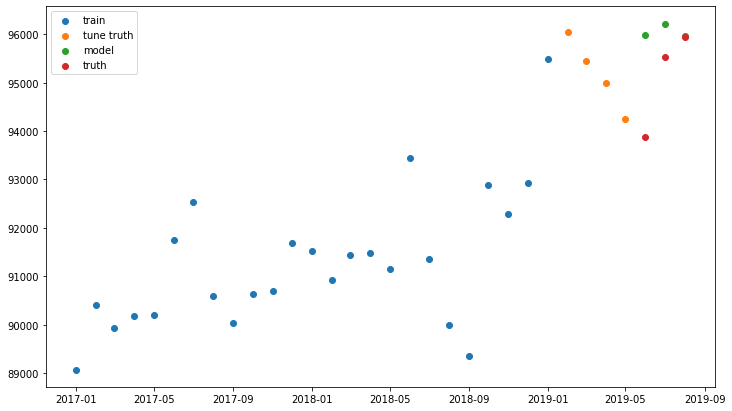

In [392]:
import random
plt.figure(figsize=(12, 7))

key = random.choice(list(data[1][0]['city_quadkey']))
train_ind = data[0][0]['city_quadkey'] == key
tune_ind = data[1][0].loc[X_tune.index]['city_quadkey'] == key
val_ind = data[1][0].loc[X_ctrl.index]['city_quadkey'] == key
test_ind = data[2]['city_quadkey'] == key

plt.scatter(data[0][0][train_ind]['month'], y_train[train_ind], label='train')
plt.scatter(data[1][0].loc[X_tune.index][tune_ind]['month'], data[1][1].loc[X_tune.index][tune_ind], label='tune truth')
plt.scatter(data[1][0].loc[X_ctrl.index][val_ind]['month'], model2.predict(X_ctrl[val_ind].values), label='model')
plt.scatter(data[1][0].loc[X_ctrl.index][val_ind]['month'], 
            data[1][1].loc[X_ctrl.index][val_ind], label='truth')
plt.legend()

In [393]:
sample.to_csv('toosmart.tsv', index=False, sep='\t')